In [1]:
#To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# IMPORTS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import plotly as py
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# DATA LOADING

In [4]:
data = pd.read_excel('/content/drive/MyDrive/Final_Project_Dataset/cust_data.xlsx')
data.head()

Cust_ID Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
0        1      M       7       0         0        0     0     0   
1        2      F       0       0         1        0     0     0   
2        3      M       7       0         1        0     0     0   
3        4      F       0       0         0        0     0     0   
4        5    NaN      10       0         0        0     0     0   

   Mondelez International  Wrangler  ...  LG  Dior  Scabal  Tommy Hilfiger  \
0                       0         0  ...   0     0       0               0   
1                       0         0  ...   0     1       0               0   
2                       0         0  ...   0     0       0               0   
3                       0         0  ...   0     0       0               0   
4                       0         0  ...   0     0       2               0   

   Hollister  Forever 21  Colavita  Microsoft  Jiffy mix  Kraft  
0          0           0         0          0          0      0  
1          0           0         0          0          0      0  
2          0           0         0          1          0      0  
3          0           0         0          0          0      0  
4          0           0         0          0          1      1  

[5 rows x 38 columns]

In [5]:
df = data.copy()

In [54]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [55]:
df.head()

Cust_ID Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
0        1      M       7       0         0        0     0     0   
1        2      F       0       0         1        0     0     0   
2        3      M       7       0         1        0     0     0   
3        4      F       0       0         0        0     0     0   
4        5    NaN      10       0         0        0     0     0   

   Mondelez International  Wrangler  Vans  Fila  Brooks  H&M  Dairy Queen  \
0                       0         0     2     0       0    0            0   
1                       0         0     0     0       0    1            0   
2                       0         0     0     0       0    0            0   
3                       0         0     0     0       0    1            0   
4                       0         0     0     0       0    0            1   

   Fendi  Hewlett Packard  Pladis  Asics  Siemens  J.M. Smucker  Pop Chips  \
0      0                0       0      0        0             0          0   
1      0                0       0      0        0             2          2   
2      0                0       0      2        0             1          0   
3      0                0       0      0        0             0          1   
4      0                0       5      1        0             3          0   

   Juniper  Huawei  Compaq  IBM  Burberry  Mi  LG  Dior  Scabal  \
0        0       0       0    0         0   0   0     0       0   
1        1       0       0    0         6   4   0     1       0   
2        0       0       0    0         0   0   0     0       0   
3        0       0       0    0         0   0   0     0       0   
4        1       0       0    0         1   0   0     0       2   

   Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  Jiffy mix  \
0               0          0           0         0          0          0   
1               0          0           0         0          0          0   
2               0          0           0         0          1          0   
3               0          0           0         0          0          0   
4               0          0           0         0          0          1   

   Kraft  
0      0  
1      0  
2      0  
3      0  
4      1

In [56]:
df.tail()

Cust_ID Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
29995    29996      M       0       0         0        0     0     0   
29996    29997      M       1       0         1        0     0     0   
29997    29998      M       0       0         1        0     0     0   
29998    29999      M       0       0         0        0     0     0   
29999    30000      F       3       2         0        0     1     0   

       Mondelez International  Wrangler  Vans  Fila  Brooks  H&M  Dairy Queen  \
29995                       0         0     0     0       1    0            0   
29996                       0         0     0     0       0    0            0   
29997                       0         0     1     0       0    0            0   
29998                       0         0     0     0       0    0            0   
29999                       0         0     0     0       0    0            0   

       Fendi  Hewlett Packard  Pladis  Asics  Siemens  J.M. Smucker  \
29995      0                0       0      0        0             0   
29996      0                0       0      0        0             0   
29997      0                0       0      0        0             0   
29998      0                0       0      0        0             0   
29999      0                0       0      0        0             2   

       Pop Chips  Juniper  Huawei  Compaq  IBM  Burberry  Mi  LG  Dior  \
29995          0        0       0       0    0         0   0   0     0   
29996          0        0       0       0    0         0   0   0     0   
29997          0        0       0       0    0         0   0   0     0   
29998          1        0       0       0    0         0   0   0     0   
29999          0        0       0       0    0         0   0   0     0   

       Scabal  Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  \
29995       0               0          0           0         0          0   
29996       0               0          0           0         0          0   
29997       0               0          0           0         0          0   
29998       0               0          0           0         0          0   
29999       0               0          0           0         0          0   

       Jiffy mix  Kraft  
29995          0      0  
29996          0      0  
29997          0      0  
29998          0      0  
29999          0      0

# EDA

In [8]:
df.shape

(30000, 38)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [10]:
df.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [11]:
df.nunique()

Cust_ID                   30000
Gender                        2
Orders                       13
Jordan                       16
Gatorade                     13
Samsung                      20
Asus                         17
Udis                         13
Mondelez International       13
Wrangler                     10
Vans                         16
Fila                         15
Brooks                       10
H&M                          16
Dairy Queen                  24
Fendi                        14
Hewlett Packard              10
Pladis                       11
Asics                        25
Siemens                      11
J.M. Smucker                 27
Pop Chips                    17
Juniper                      29
Huawei                       16
Compaq                       19
IBM                           9
Burberry                     21
Mi                            9
LG                           13
Dior                         12
Scabal                       11
Tommy Hi

In [12]:
df.describe()

Cust_ID        Orders        Jordan      Gatorade       Samsung  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000      4.169800      0.267433      0.252333      0.222933   
std     8660.398374      3.590311      0.804778      0.705368      0.917494   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%     7500.750000      1.000000      0.000000      0.000000      0.000000   
50%    15000.500000      4.000000      0.000000      0.000000      0.000000   
75%    22500.250000      7.000000      0.000000      0.000000      0.000000   
max    30000.000000     12.000000     24.000000     15.000000     27.000000   

               Asus          Udis  Mondelez International      Wrangler  \
count  30000.000000  30000.000000            30000.000000  30000.000000   
mean       0.161333      0.143533                0.139767      0.106933   
std        0.740038      0.641258                0.525840      0.515921   
min        0.000000      0.000000                0.000000      0.000000   
25%        0.000000      0.000000                0.000000      0.000000   
50%        0.000000      0.000000                0.000000      0.000000   
75%        0.000000      0.000000                0.000000      0.000000   
max       17.000000     14.000000               31.000000      9.000000   

               Vans  ...            LG          Dior        Scabal  \
count  30000.000000  ...  30000.000000  30000.000000  30000.000000   
mean       0.111433  ...      0.102533      0.271133      0.370067   
std        0.547990  ...      0.486376      0.714682      0.758465   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        0.000000  ...      0.000000      0.000000      0.000000   
50%        0.000000  ...      0.000000      0.000000      0.000000   
75%        0.000000  ...      0.000000      0.000000      1.000000   
max       16.000000  ...     19.000000     12.000000     11.000000   

       Tommy Hilfiger     Hollister    Forever 21      Colavita     Microsoft  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean         0.158967      0.077667      0.057333      0.192200      0.116367   
std          0.510527      0.383370      0.300082      0.641306      0.446578   
min          0.000000      0.000000      0.000000      0.000000      0.000000   
25%          0.000000      0.000000      0.000000      0.000000      0.000000   
50%          0.000000      0.000000      0.000000      0.000000      0.000000   
75%          0.000000      0.000000      0.000000      0.000000      0.000000   
max          8.000000      9.000000      8.000000     22.000000     14.000000   

          Jiffy mix         Kraft  
count  30000.000000  30000.000000  
mean       0.088033      0.070900  
std        0.399277      0.387915  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        8.000000     16.000000  

[8 rows x 37 columns]

In [13]:
dups = df.duplicated()
sum(dups)

0

The code snippet dups = df.duplicated() checks for duplicate rows in the DataFrame df and assigns a boolean Series to the variable dups. The sum of dups using sum(dups) gives the count of duplicate rows in the DataFrame.

# HANDLING MISSING VALUES

In [14]:
df1 = df.copy()


In [15]:
df1['Gender'].isnull().sum()

2724

In [16]:
df1['Gender'] = df1['Gender'].fillna(df1['Gender'].mode()[0])

In [17]:
df1['Gender'].isnull().sum()

0

In [18]:
df1.isnull().sum()

Cust_ID                   0
Gender                    0
Orders                    0
Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft           

In [19]:
df1.head()

Cust_ID Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
0        1      M       7       0         0        0     0     0   
1        2      F       0       0         1        0     0     0   
2        3      M       7       0         1        0     0     0   
3        4      F       0       0         0        0     0     0   
4        5      F      10       0         0        0     0     0   

   Mondelez International  Wrangler  ...  LG  Dior  Scabal  Tommy Hilfiger  \
0                       0         0  ...   0     0       0               0   
1                       0         0  ...   0     1       0               0   
2                       0         0  ...   0     0       0               0   
3                       0         0  ...   0     0       0               0   
4                       0         0  ...   0     0       2               0   

   Hollister  Forever 21  Colavita  Microsoft  Jiffy mix  Kraft  
0          0           0         0          0          0      0  
1          0           0         0          0          0      0  
2          0           0         0          1          0      0  
3          0           0         0          0          0      0  
4          0           0         0          0          1      1  

[5 rows x 38 columns]

In [20]:
df1.tail()

Cust_ID Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
29995    29996      M       0       0         0        0     0     0   
29996    29997      M       1       0         1        0     0     0   
29997    29998      M       0       0         1        0     0     0   
29998    29999      M       0       0         0        0     0     0   
29999    30000      F       3       2         0        0     1     0   

       Mondelez International  Wrangler  ...  LG  Dior  Scabal  \
29995                       0         0  ...   0     0       0   
29996                       0         0  ...   0     0       0   
29997                       0         0  ...   0     0       0   
29998                       0         0  ...   0     0       0   
29999                       0         0  ...   0     0       0   

       Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  Jiffy mix  \
29995               0          0           0         0          0          0   
29996               0          0           0         0          0          0   
29997               0          0           0         0          0          0   
29998               0          0           0         0          0          0   
29999               0          0           0         0          0          0   

       Kraft  
29995      0  
29996      0  
29997      0  
29998      0  
29999      0  

[5 rows x 38 columns]

In [21]:
df1['Gender'].value_counts()

F    24778
M     5222
Name: Gender, dtype: int64

# ENCODING CATEGORICAL VARIABLES

In [22]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df1['Gender'] = label_encoder.fit_transform(df1['Gender'])


The code snippet uses LabelEncoder from scikit-learn to encode the categorical variable 'Gender' in the DataFrame df1. It converts the 'Gender' column values to numerical labels, allowing easier handling of categorical data in machine learning algorithms.

In [23]:
df1['Gender'].unique()

array([1, 0])

In [24]:
df1['Gender'].value_counts()

0    24778
1     5222
Name: Gender, dtype: int64

In [25]:
df1.corr()

Cust_ID    Gender    Orders    Jordan  Gatorade  \
Cust_ID                 1.000000 -0.060798  0.029132  0.064277  0.021821   
Gender                 -0.060798  1.000000  0.016879  0.027470  0.127665   
Orders                  0.029132  0.016879  1.000000  0.016090  0.034310   
Jordan                  0.064277  0.027470  0.016090  1.000000  0.177254   
Gatorade                0.021821  0.127665  0.034310  0.177254  1.000000   
Samsung                 0.057206 -0.006435  0.017885  0.071258  0.063890   
Asus                    0.049191 -0.094381  0.015584  0.123731  0.046215   
Udis                    0.060677 -0.077943  0.009018  0.135673  0.058180   
Mondelez International  0.035560 -0.045117  0.008741  0.021950  0.031272   
Wrangler                0.043043 -0.087144  0.003856  0.040710  0.088166   
Vans                    0.002158  0.140070  0.006343  0.115796  0.170620   
Fila                   -0.000450  0.016825 -0.009627  0.031611  0.026350   
Brooks                  0.039574  0.058243  0.015389  0.165471  0.154345   
H&M                     0.023426 -0.143123  0.030833  0.038302  0.066794   
Dairy Queen            -0.005785 -0.019533 -0.002705  0.043857  0.055532   
Fendi                   0.044053 -0.050790  0.017077  0.030369  0.029120   
Hewlett Packard         0.048083 -0.052656  0.006867  0.008800  0.016680   
Pladis                  0.012790 -0.038306 -0.000602  0.062050  0.062749   
Asics                   0.000715  0.021538  0.022064  0.009816  0.042912   
Siemens                -0.039673  0.011677  0.007843 -0.011082  0.006296   
J.M. Smucker            0.011654 -0.014875  0.030807  0.054025  0.060775   
Pop Chips               0.046623  0.006006  0.018774  0.081462  0.087545   
Juniper                -0.015516 -0.013498 -0.002741  0.025708  0.030956   
Huawei                  0.018493 -0.028321  0.008031  0.051468  0.042281   
Compaq                 -0.009158  0.015711  0.002765  0.007495  0.008773   
IBM                    -0.026589  0.020965 -0.007647  0.001963 -0.009290   
Burberry                0.061117 -0.100819  0.015813  0.096492  0.102216   
Mi                     -0.031839 -0.072978  0.010369  0.022963  0.033103   
LG                      0.029693 -0.052857 -0.006382  0.070205  0.066443   
Dior                    0.062489 -0.074158  0.009027  0.061185  0.056571   
Scabal                  0.057356 -0.180412  0.020050  0.062582  0.045958   
Tommy Hilfiger          0.016463 -0.066491  0.003550  0.063739  0.058190   
Hollister               0.084793 -0.040492  0.001680  0.026350  0.050302   
Forever 21              0.049231 -0.047283 -0.003436  0.024710  0.031495   
Colavita                0.002061  0.000320  0.007455  0.015564  0.018279   
Microsoft              -0.005614 -0.010368  0.015307  0.015804  0.016625   
Jiffy mix              -0.019145 -0.014688  0.011268  0.021651  0.038655   
Kraft                   0.022508 -0.004587 -0.007160  0.018918  0.018553   

                         Samsung      Asus      Udis  Mondelez International  \
Cust_ID                 0.057206  0.049191  0.060677                0.035560   
Gender                 -0.006435 -0.094381 -0.077943               -0.045117   
Orders                  0.017885  0.015584  0.009018                0.008741   
Jordan                  0.071258  0.123731  0.135673                0.021950   
Gatorade                0.063890  0.046215  0.058180                0.031272   
Samsung                 1.000000  0.012274  0.028785                0.035807   
Asus                    0.012274  1.000000  0.114588                0.018120   
Udis                    0.028785  0.114588  1.000000                0.040251   
Mondelez International  0.035807  0.018120  0.040251                1.000000   
Wrangler                0.014565  0.026668  0.023128                0.021211   
Vans                    0.029155  0.046990  0.020696                0.020795   
Fila                    0.024847 -0.004766  0.021717                0.026681   
Brooks              

# DATA VISUALIZATIONS


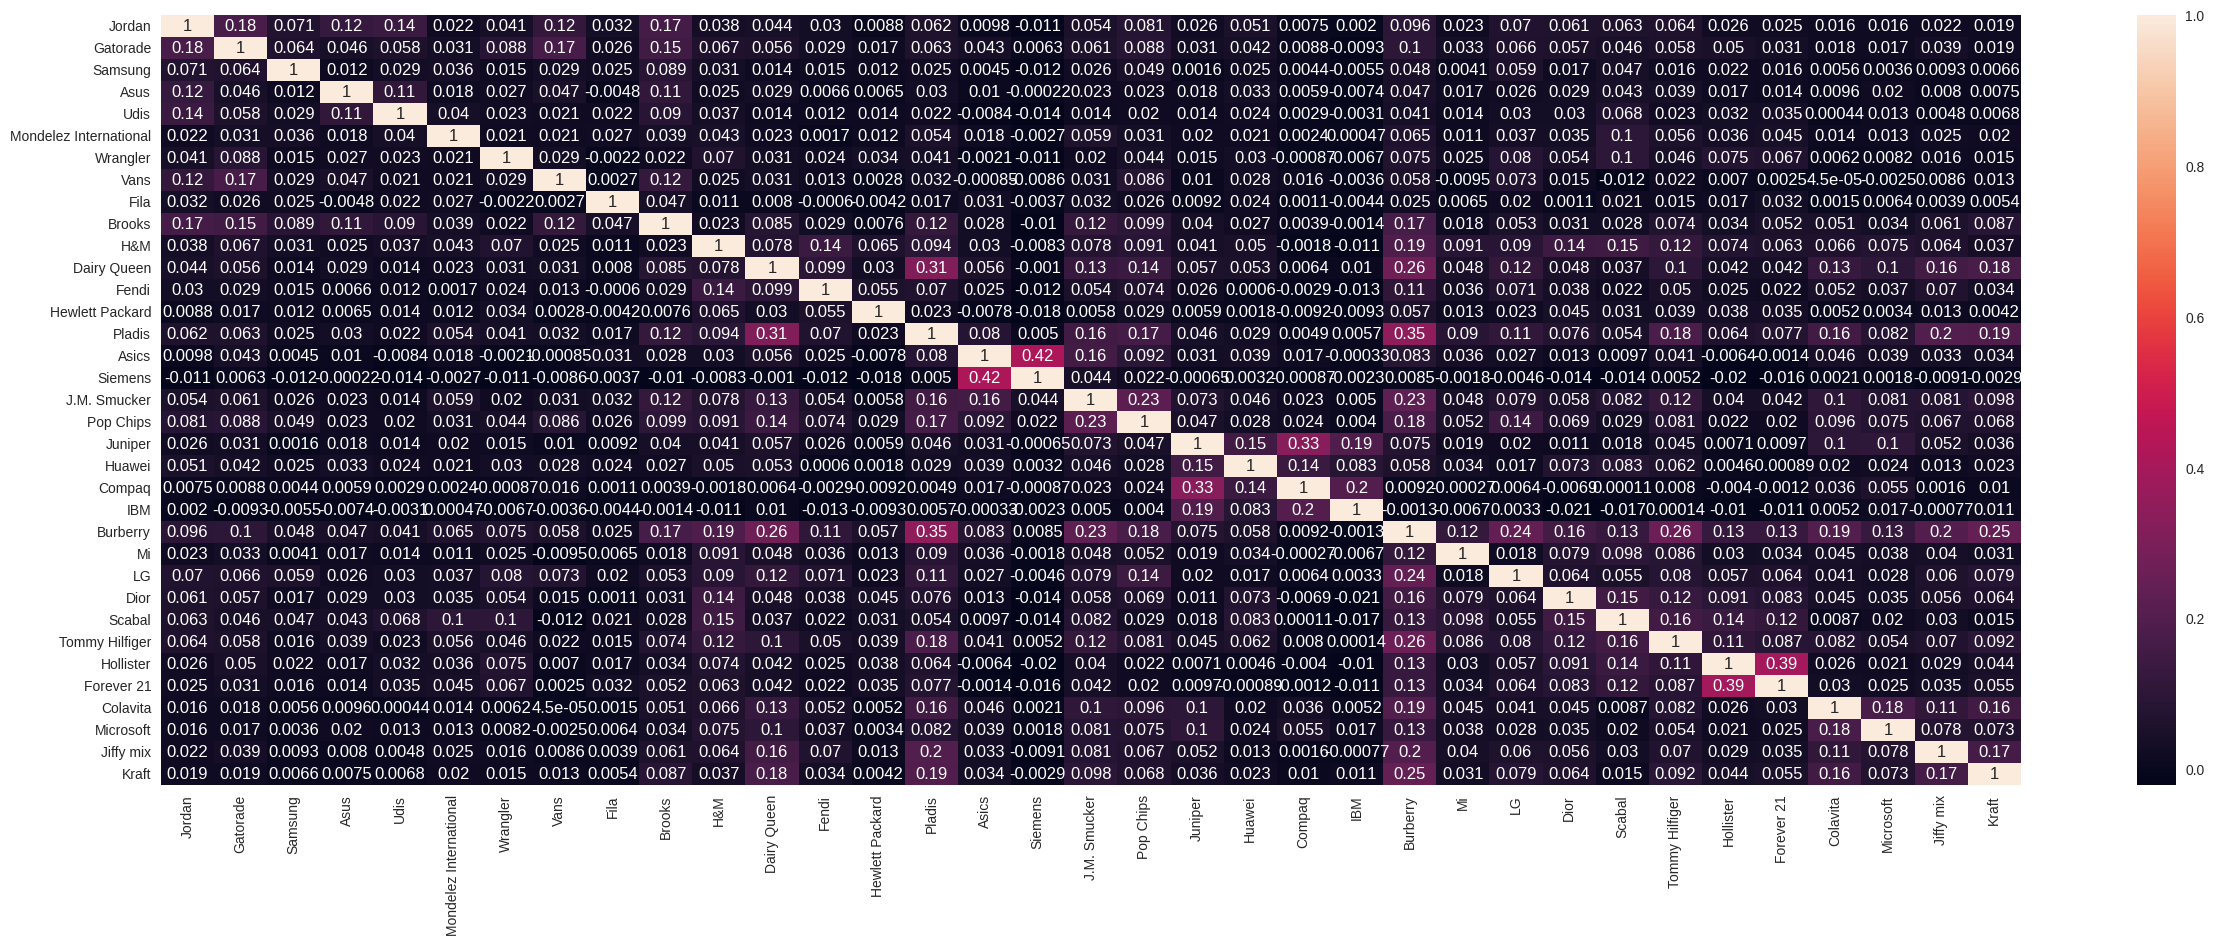

In [26]:
plt.figure(figsize=(30, 10))
sns.heatmap(df1.iloc[:,3: ].corr(), annot=True)
plt.show()

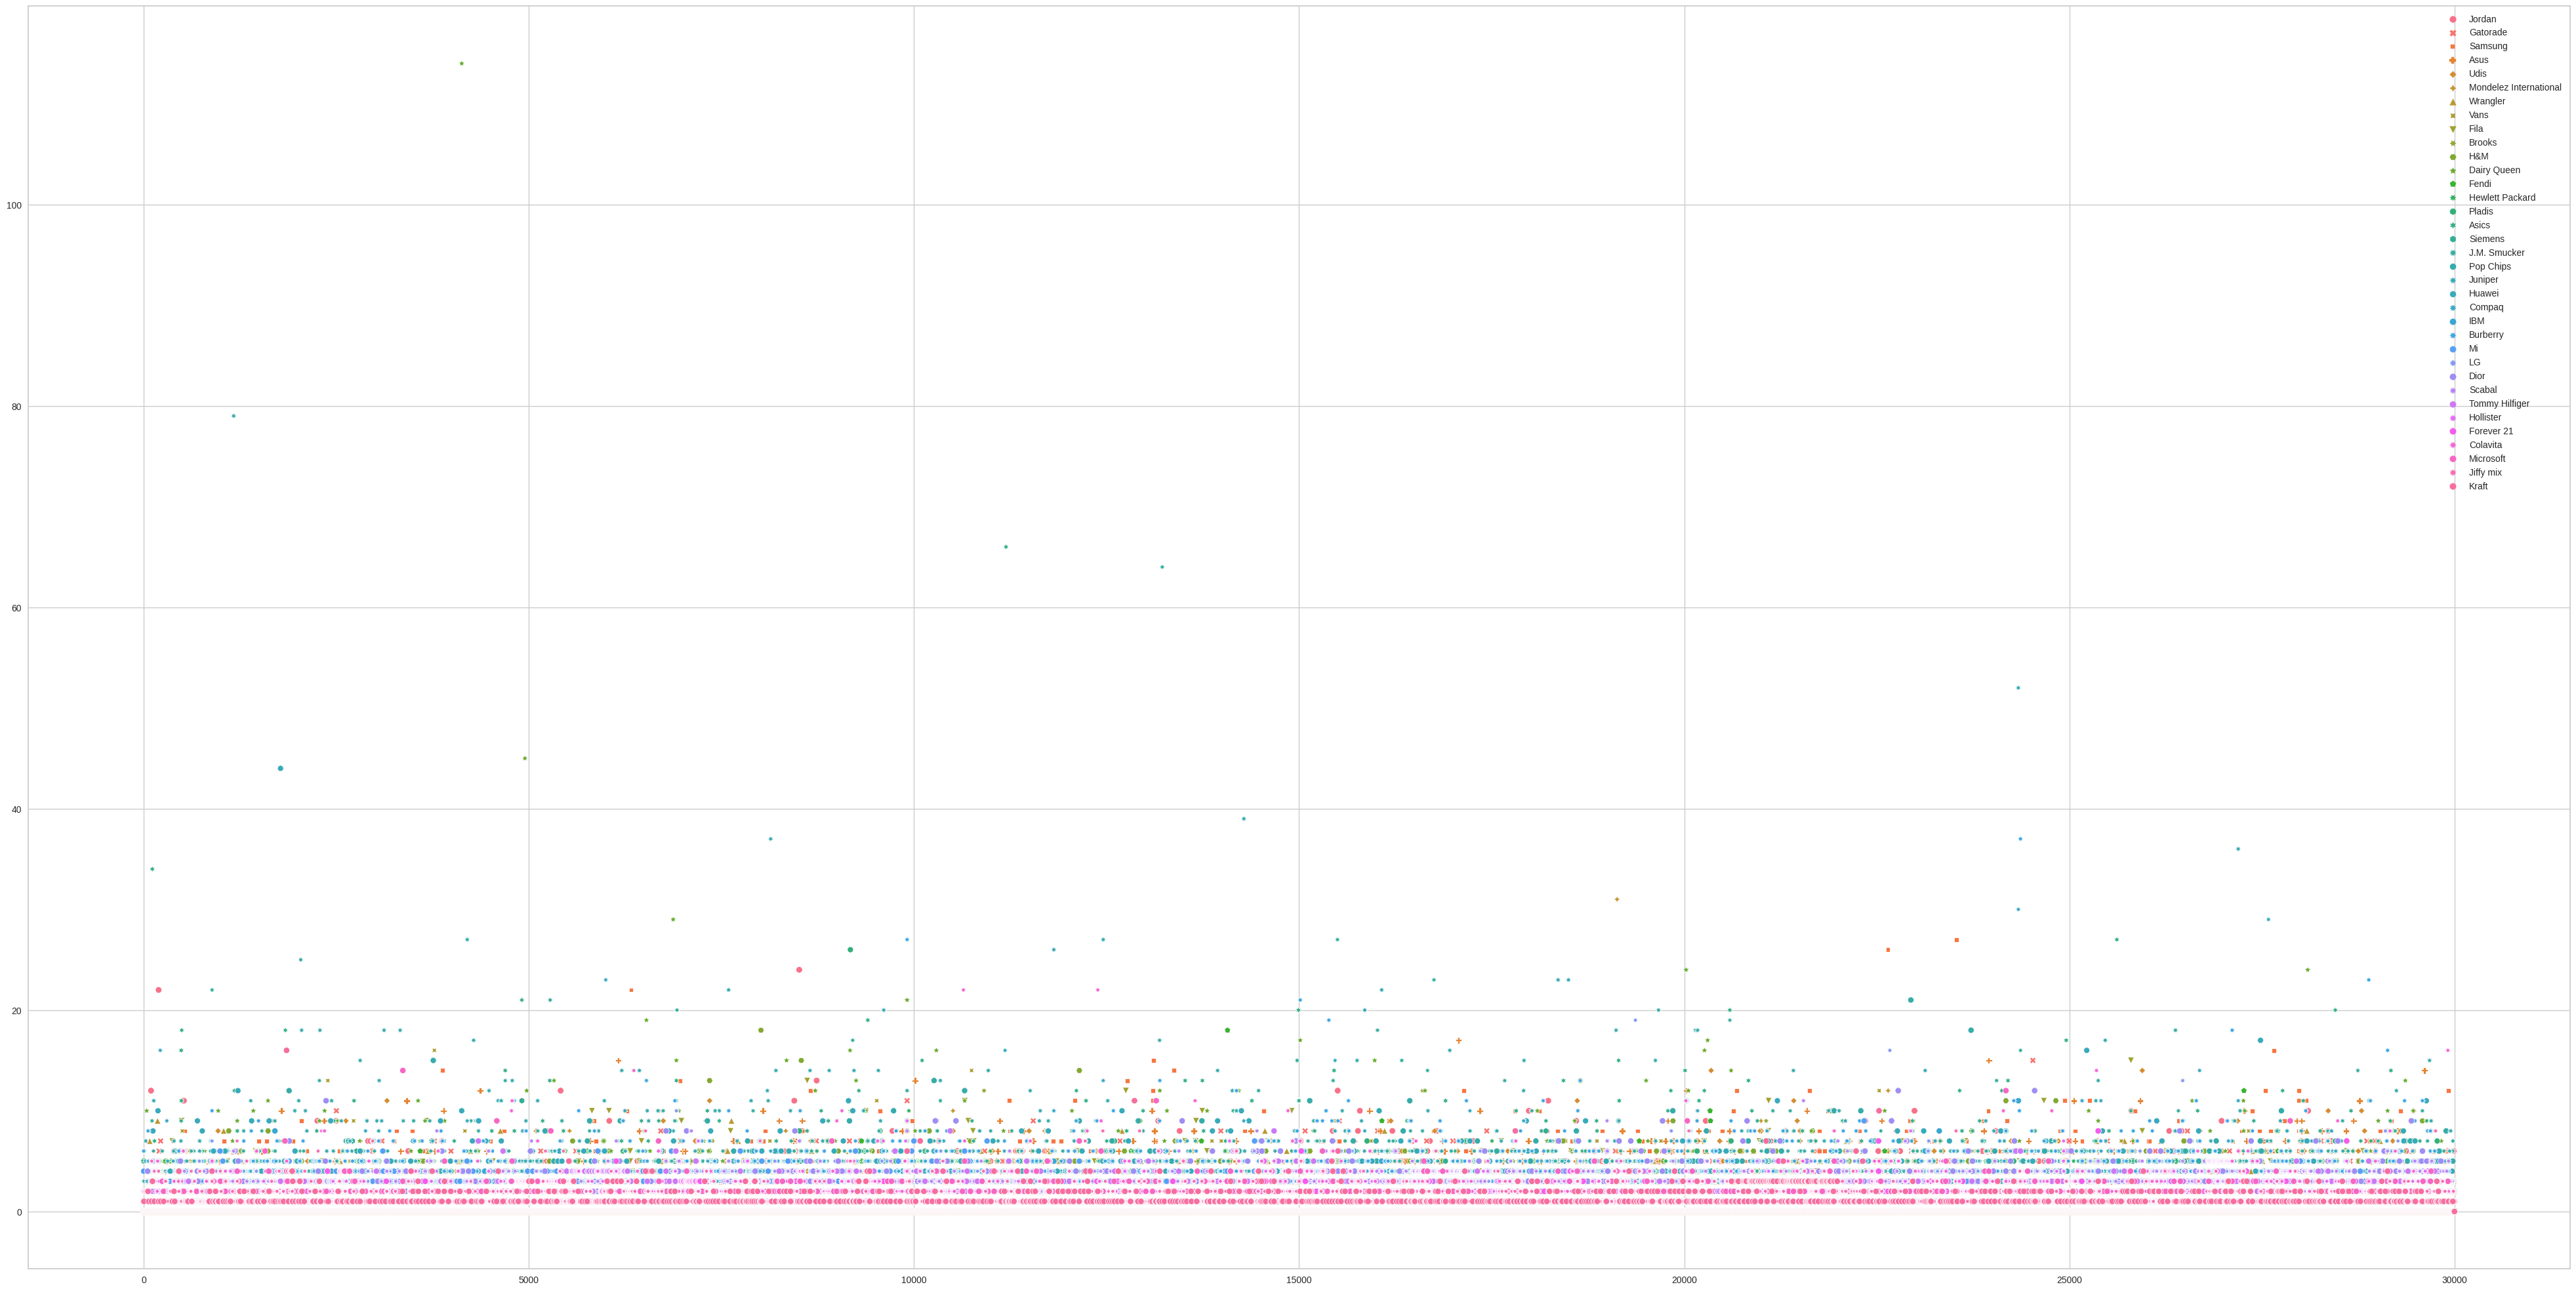

In [29]:
plt.figure(figsize=(50, 25))
sns.scatterplot(data=df1.iloc[:, 3:])
plt.show()

<Axes: xlabel='count', ylabel='Orders'>

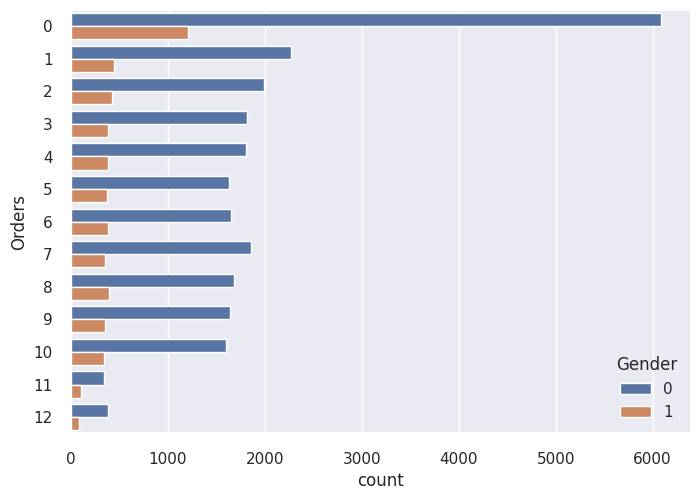

In [30]:
# Orders Genderwise Visualization
sns.set(style="darkgrid")

sns.countplot(data=df1, hue="Gender", y='Orders')


<Axes: xlabel='count', ylabel='Gender'>

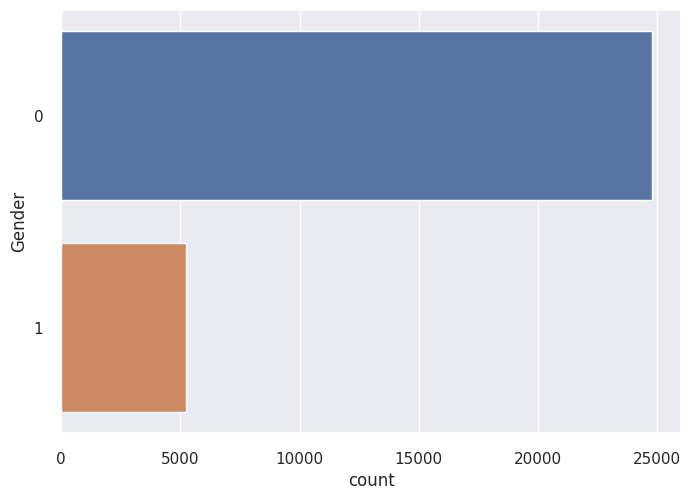

In [31]:
# Gender Count Visualization
sns.set(style="darkgrid")

sns.countplot(data=df1, y="Gender")


<Axes: xlabel='Orders', ylabel='count'>

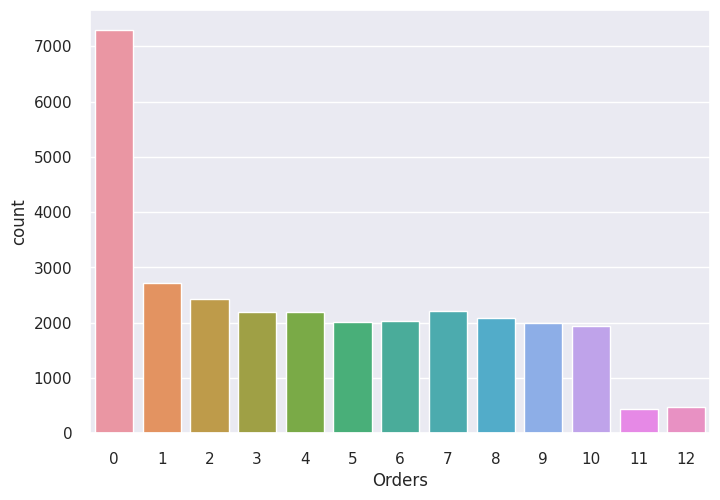

In [32]:
# Orders Count
sns.countplot(df1, x="Orders")

<Axes: xlabel='Orders', ylabel='count'>

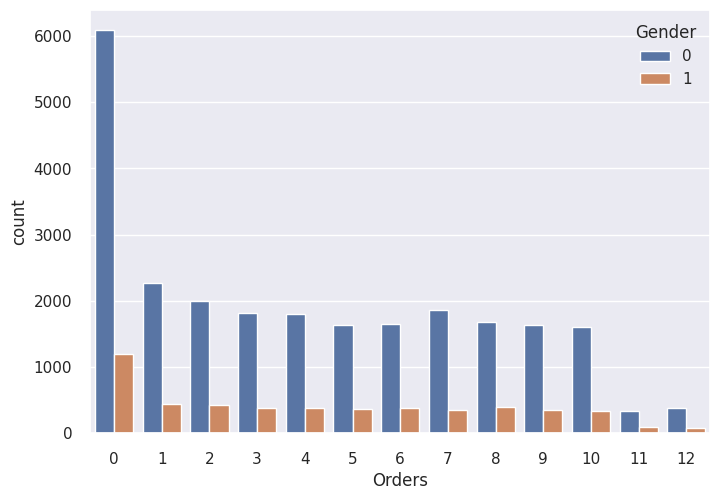

In [33]:
# Orders Genderwise
sns.countplot(df1, x="Orders", hue="Gender")

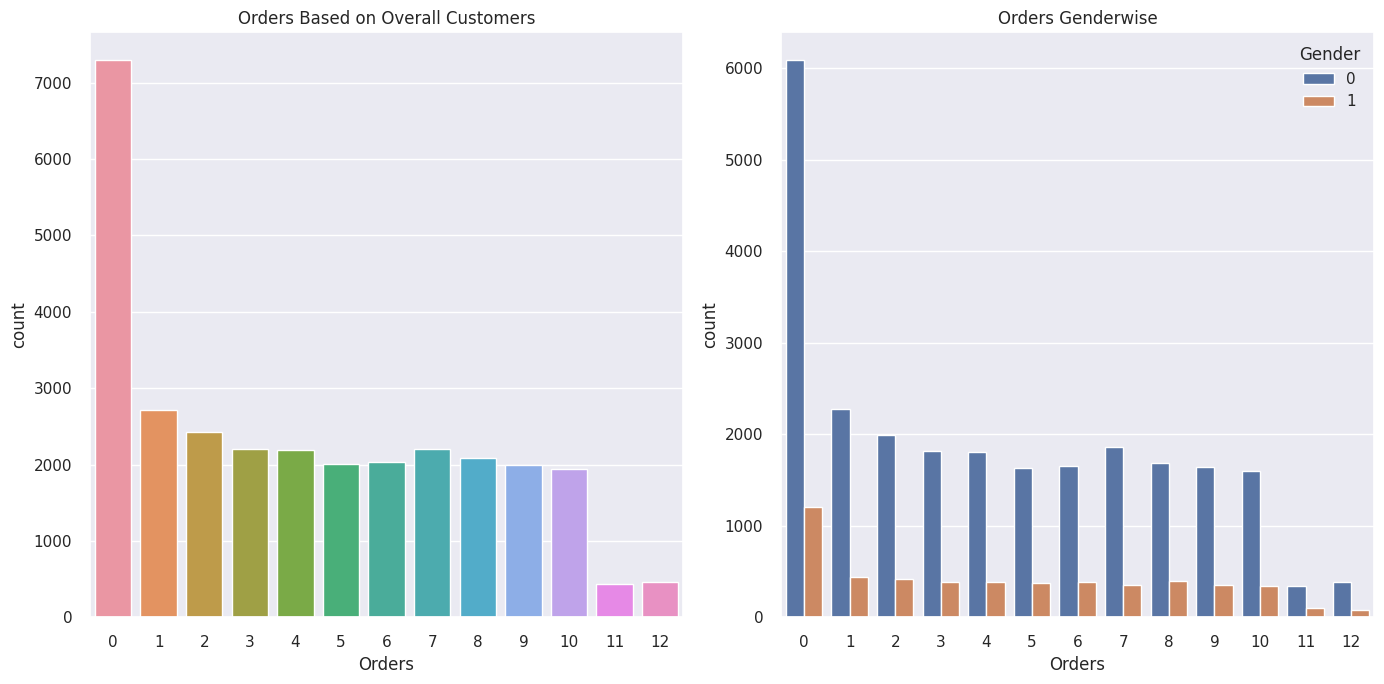

In [34]:

# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot countplot without hue
sns.countplot(data=df1, x="Orders", ax=axes[0])
axes[0].set_title("Orders Based on Overall Customers")

# Plot countplot with hue
sns.countplot(data=df1, x="Orders", hue="Gender", ax=axes[1])
axes[1].set_title("Orders Genderwise")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

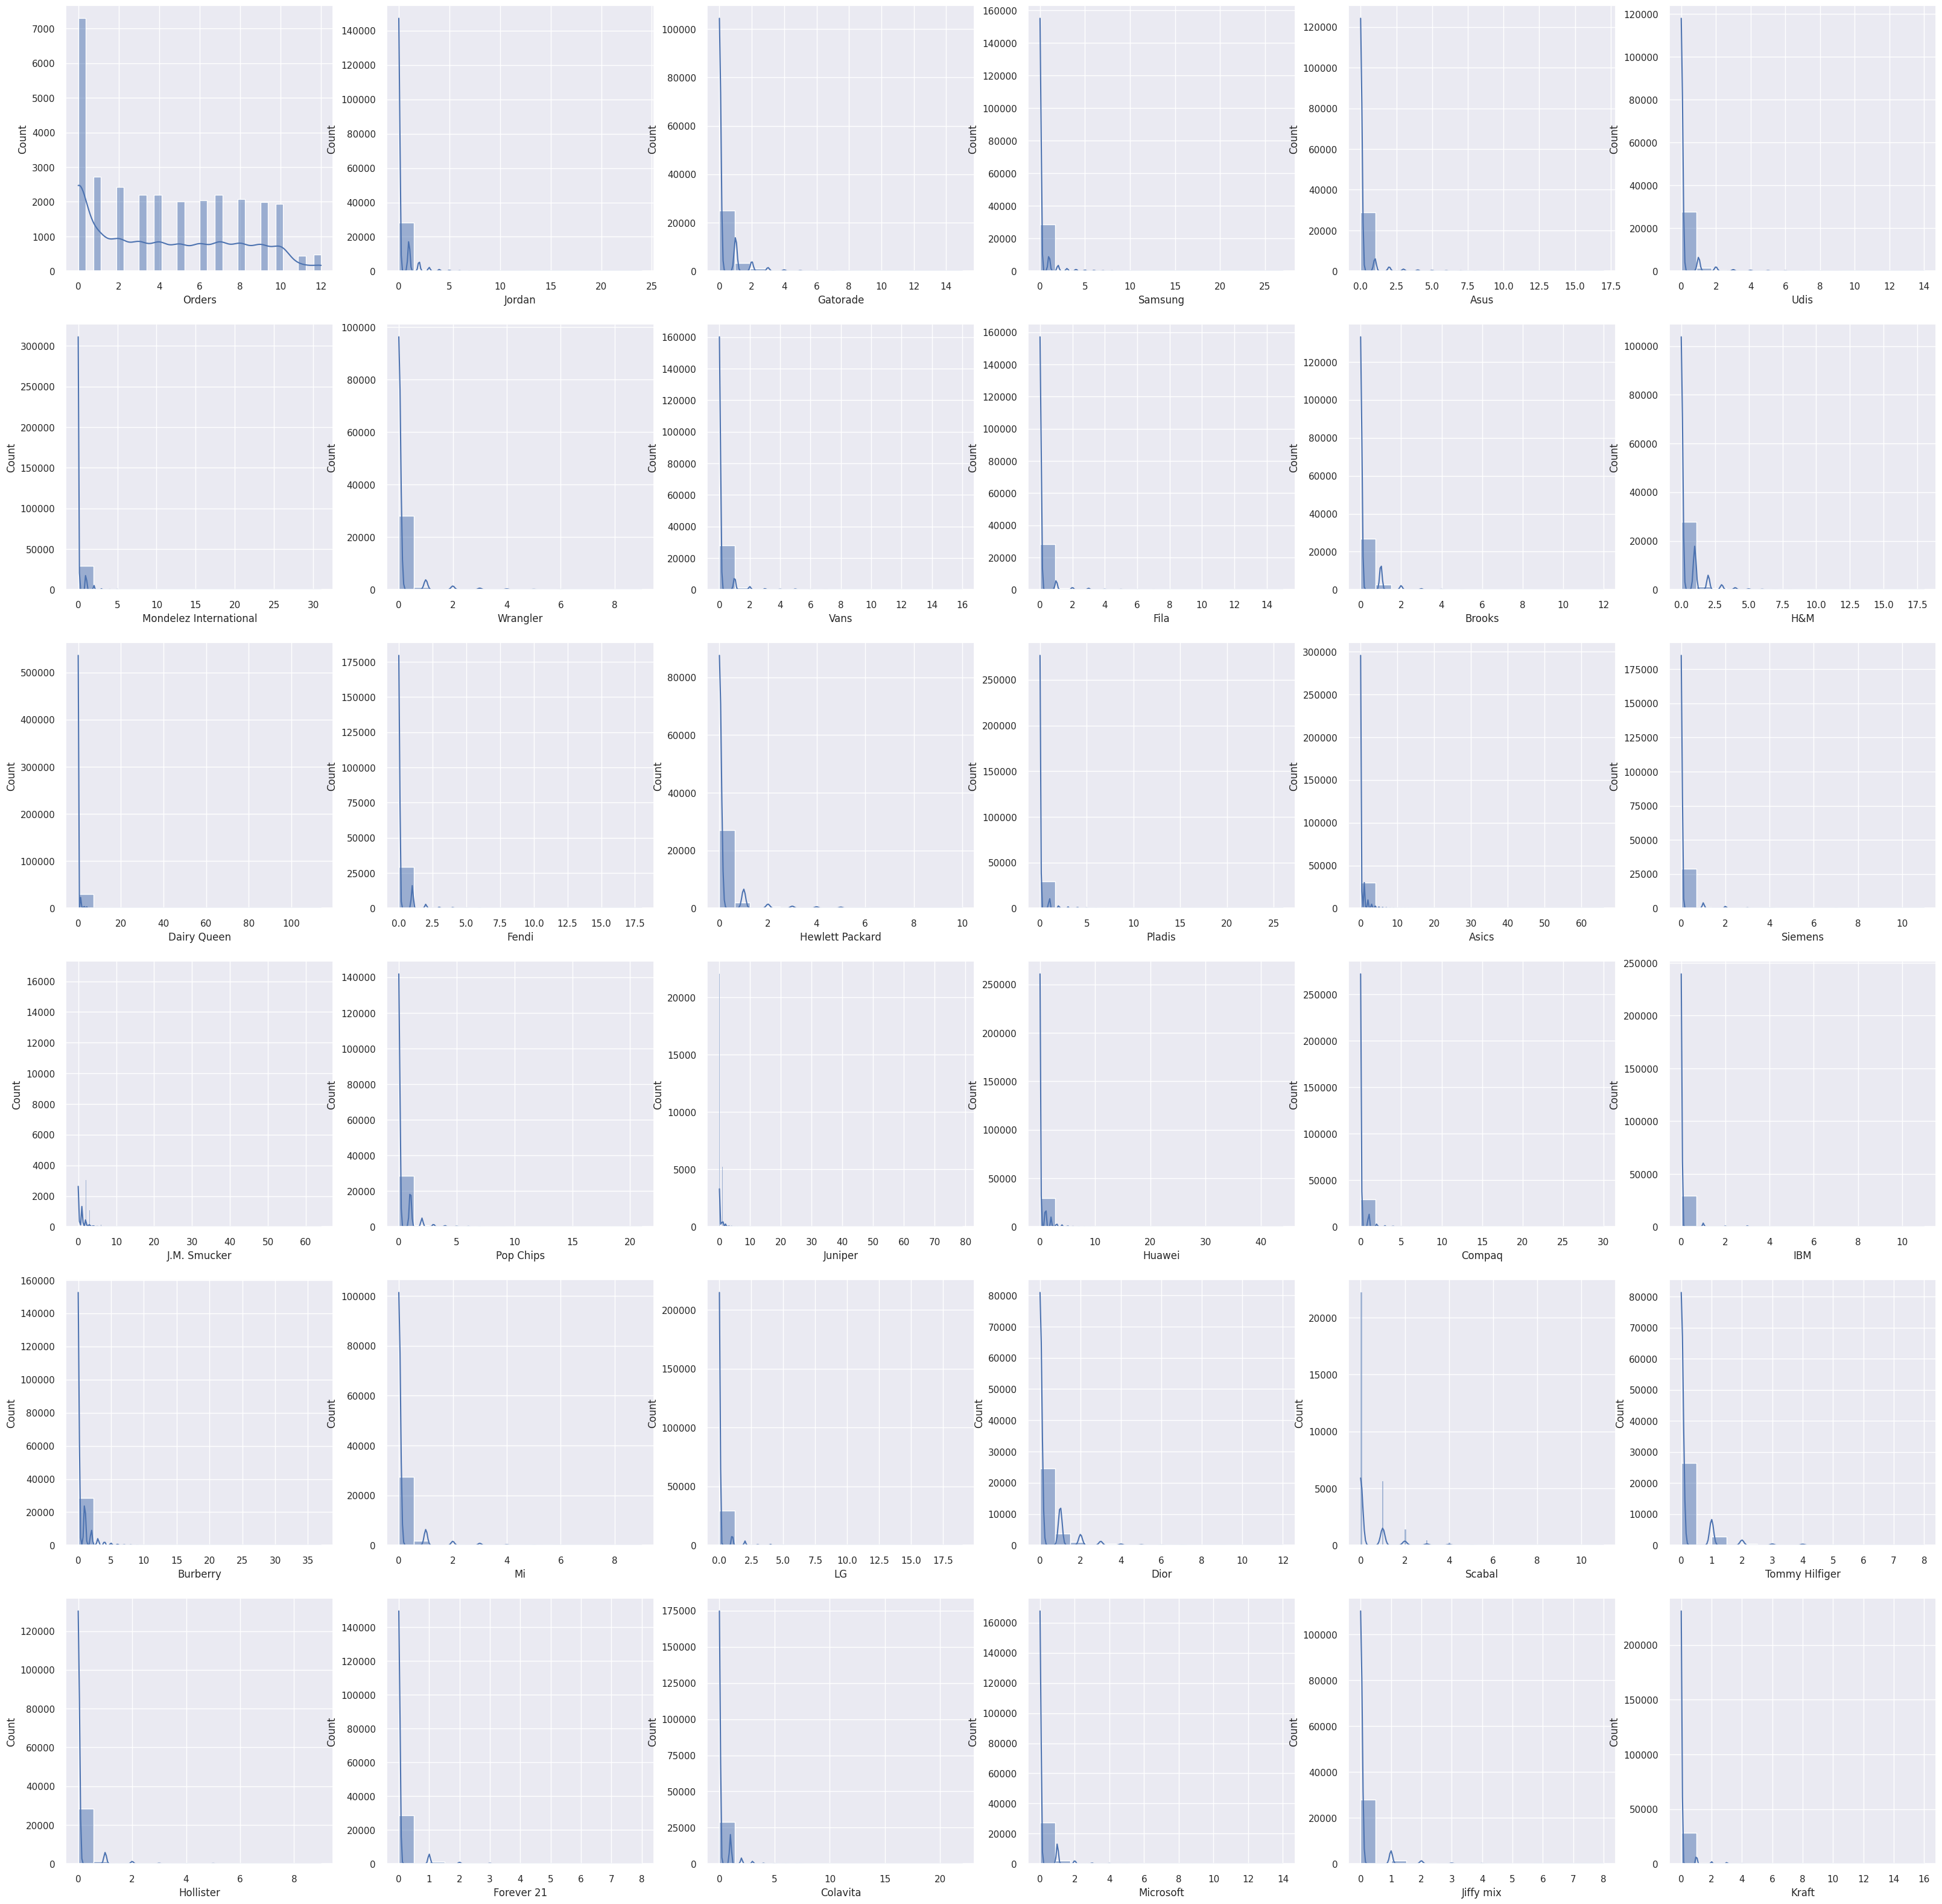

In [35]:
cols = list(df1.columns[2:])

def dist_list(lst):
    plt.figure(figsize=(40, 40))
    for i, col in enumerate(lst, 1):
        plt.subplot(6, 6, i)
        sns.histplot(data=df1, x=df1[col], kde=True)
        plt.xlabel(col)  # Set the x-axis label
        plt.ylabel('Count')  # Set the y-axis label

dist_list(cols)

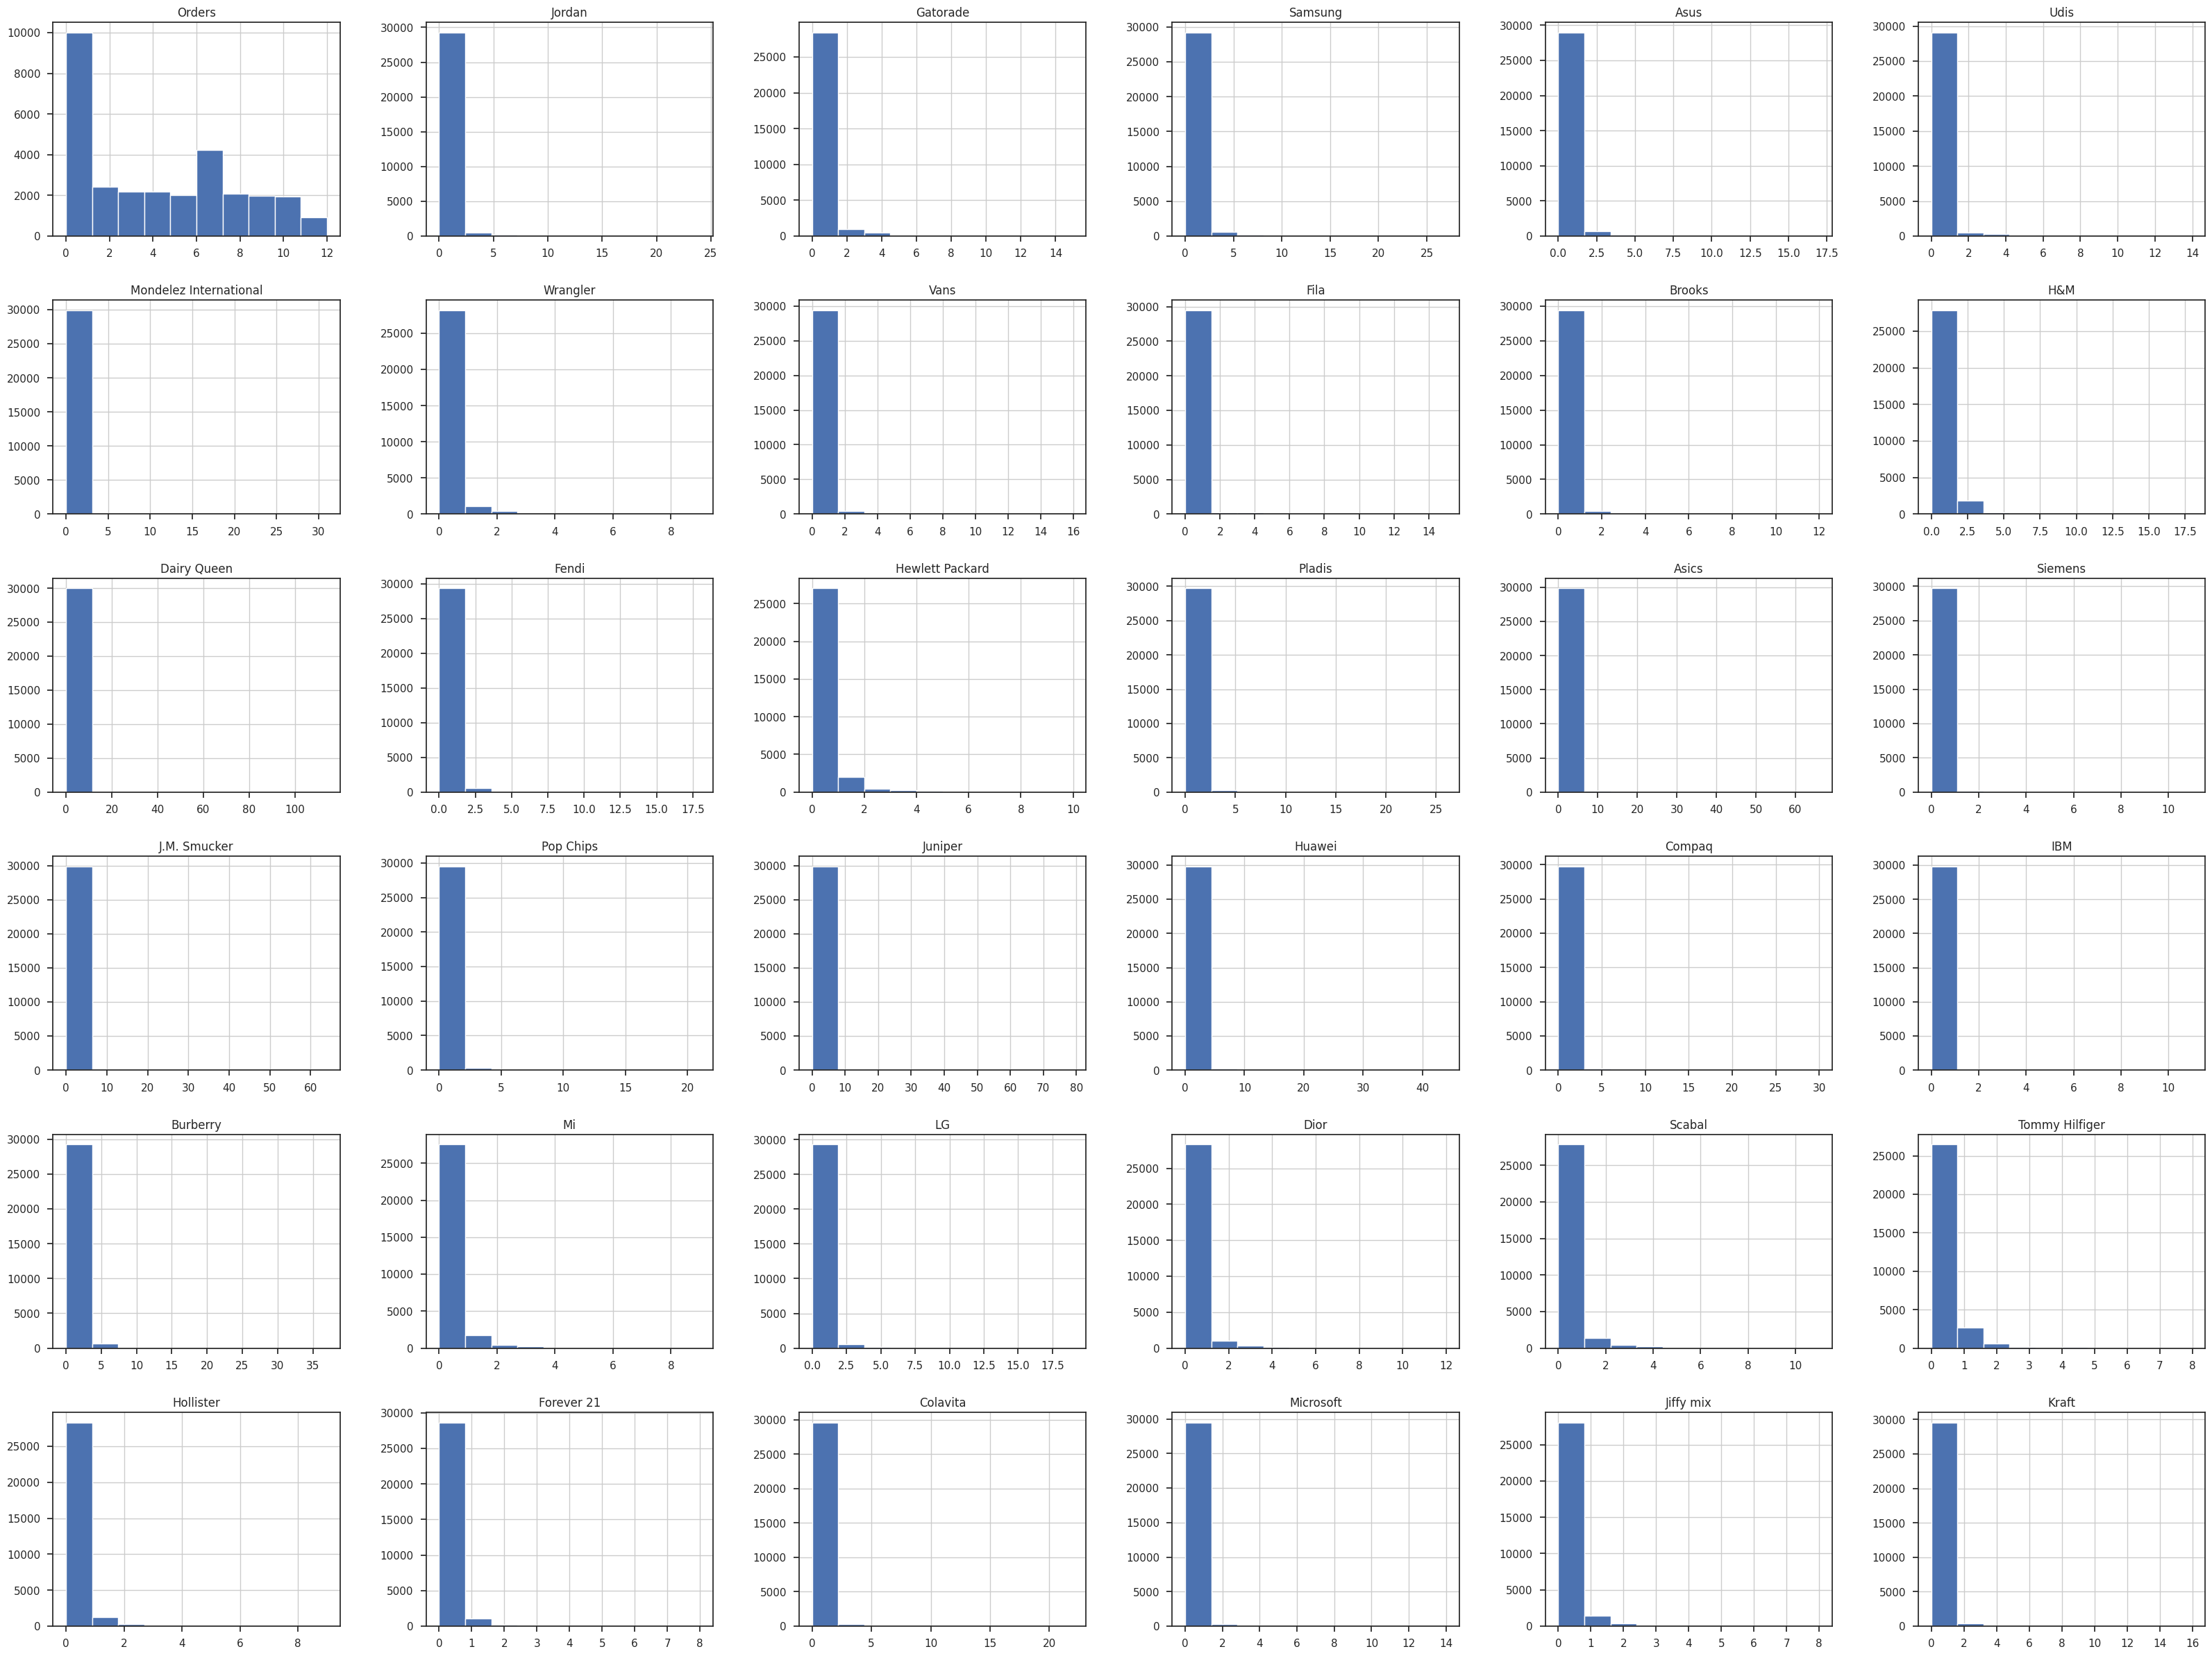

In [41]:
df1.iloc[:,2:].hist(figsize=(40,30))
plt.show()


# FEATURE HANDLING


In [43]:
df2 = df1.copy()

In [44]:
df2['Total Brands Search'] = df2.iloc[:,3:].sum(axis=1)

The code snippet df2['Total Brands Search'] = df2.iloc[:,3:].sum(axis=1) calculates the sum of values across each row in columns starting from the fourth column (iloc[:,3:]) of the DataFrame df2 and assigns the result to a new column called 'Total Brands Search'.

In summary, the code calculates the sum of values across each row for a subset of columns in df2 and stores the result in a new column 'Total Brands Search'. This can be useful for aggregating information or calculating row-wise totals based on specific columns in a DataFrame.


In [45]:
df2.head()

Cust_ID  Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
0        1       1       7       0         0        0     0     0   
1        2       0       0       0         1        0     0     0   
2        3       1       7       0         1        0     0     0   
3        4       0       0       0         0        0     0     0   
4        5       0      10       0         0        0     0     0   

   Mondelez International  Wrangler  ...  Dior  Scabal  Tommy Hilfiger  \
0                       0         0  ...     0       0               0   
1                       0         0  ...     1       0               0   
2                       0         0  ...     0       0               0   
3                       0         0  ...     0       0               0   
4                       0         0  ...     0       2               0   

   Hollister  Forever 21  Colavita  Microsoft  Jiffy mix  Kraft  \
0          0           0         0          0          0      0   
1          0           0         0          0          0      0   
2          0           0         0          1          0      0   
3          0           0         0          0          0      0   
4          0           0         0          0          1      1   

   Total Brands Search  
0                    2  
1                   18  
2                    5  
3                    2  
4                   16  

[5 rows x 39 columns]

In [46]:
df2.tail()

Cust_ID  Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
29995    29996       1       0       0         0        0     0     0   
29996    29997       1       1       0         1        0     0     0   
29997    29998       1       0       0         1        0     0     0   
29998    29999       1       0       0         0        0     0     0   
29999    30000       0       3       2         0        0     1     0   

       Mondelez International  Wrangler  ...  Dior  Scabal  Tommy Hilfiger  \
29995                       0         0  ...     0       0               0   
29996                       0         0  ...     0       0               0   
29997                       0         0  ...     0       0               0   
29998                       0         0  ...     0       0               0   
29999                       0         0  ...     0       0               0   

       Hollister  Forever 21  Colavita  Microsoft  Jiffy mix  Kraft  \
29995          0           0         0          0          0      0   
29996          0           0         0          0          0      0   
29997          0           0         0          0          0      0   
29998          0           0         0          0          0      0   
29999          0           0         0          0          0      0   

       Total Brands Search  
29995                    1  
29996                    1  
29997                    2  
29998                    1  
29999                    5  

[5 rows x 39 columns]

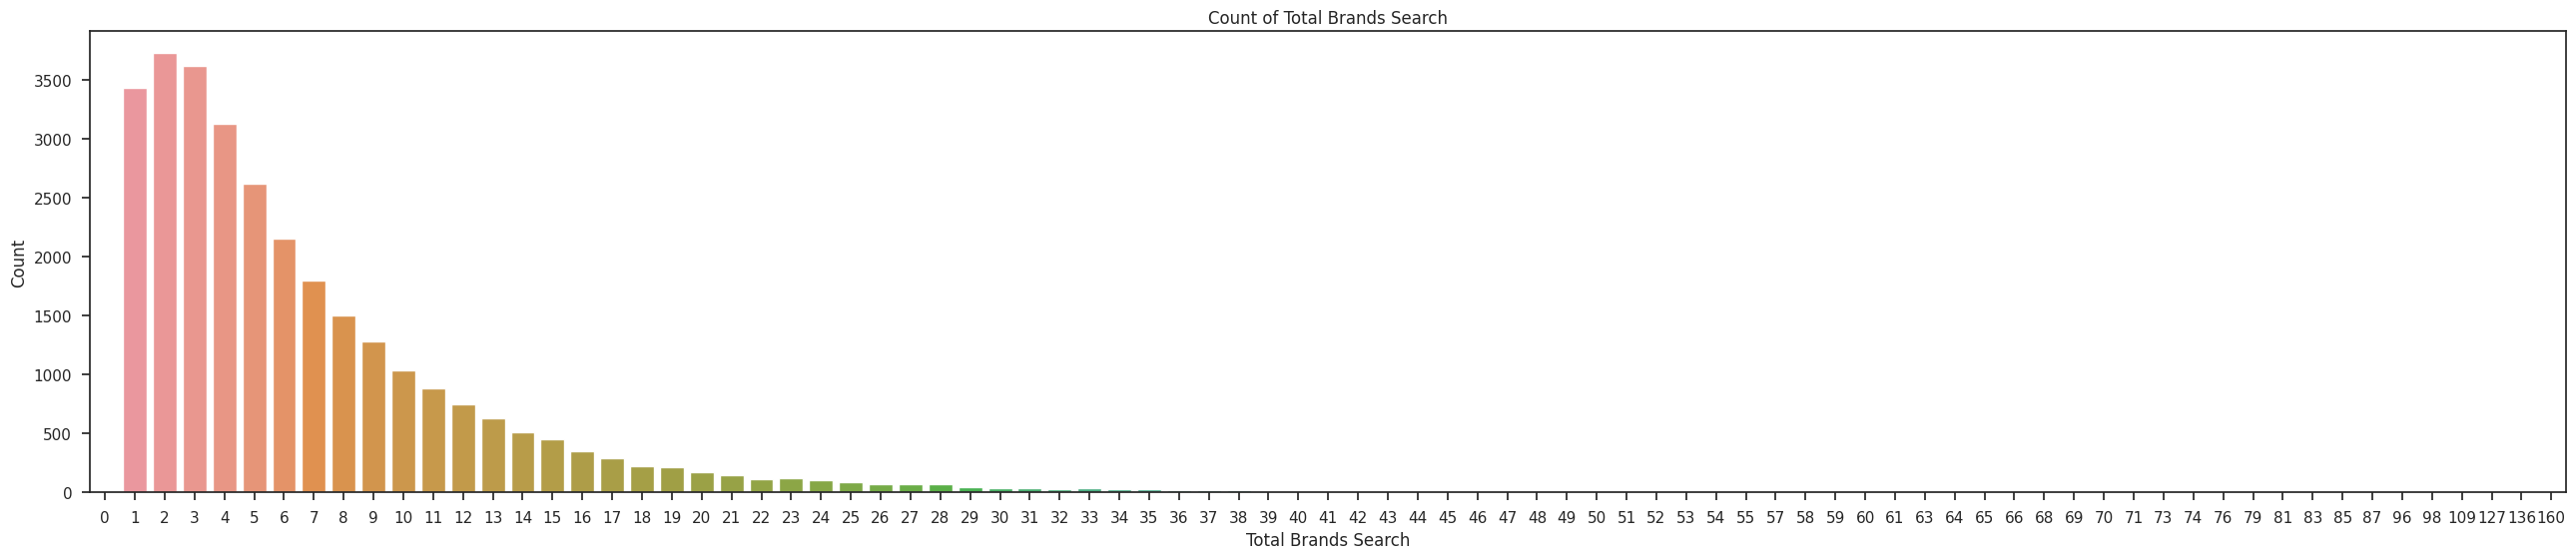

In [47]:
plt.figure(figsize=(32, 6))  # Set the figure size

sns.countplot(data=df2, x="Total Brands Search")

plt.xlabel("Total Brands Search")  # Set the x-axis label
plt.ylabel("Count")  # Set the y-axis label
plt.title("Count of Total Brands Search")  # Set the title of the plot

plt.show()

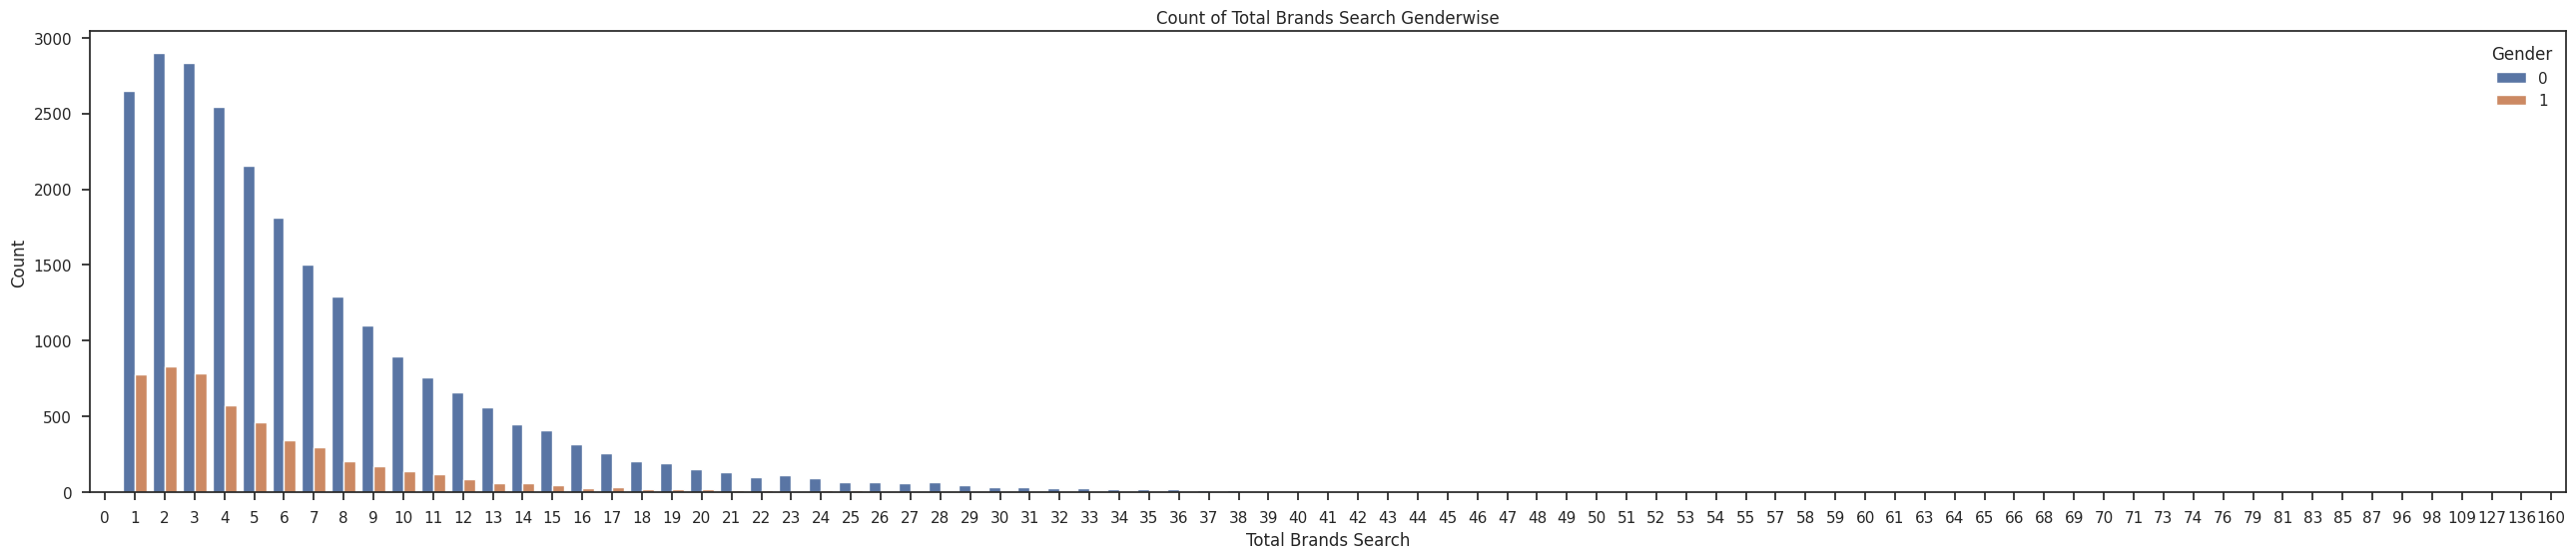

In [48]:
plt.figure(figsize=(32, 6))  # Set the figure size

sns.countplot(data=df2, x="Total Brands Search", hue="Gender")

plt.xlabel("Total Brands Search")  # Set the x-axis label
plt.ylabel("Count")  # Set the y-axis label
plt.title("Count of Total Brands Search Genderwise")  # Set the title of the plot

plt.show()

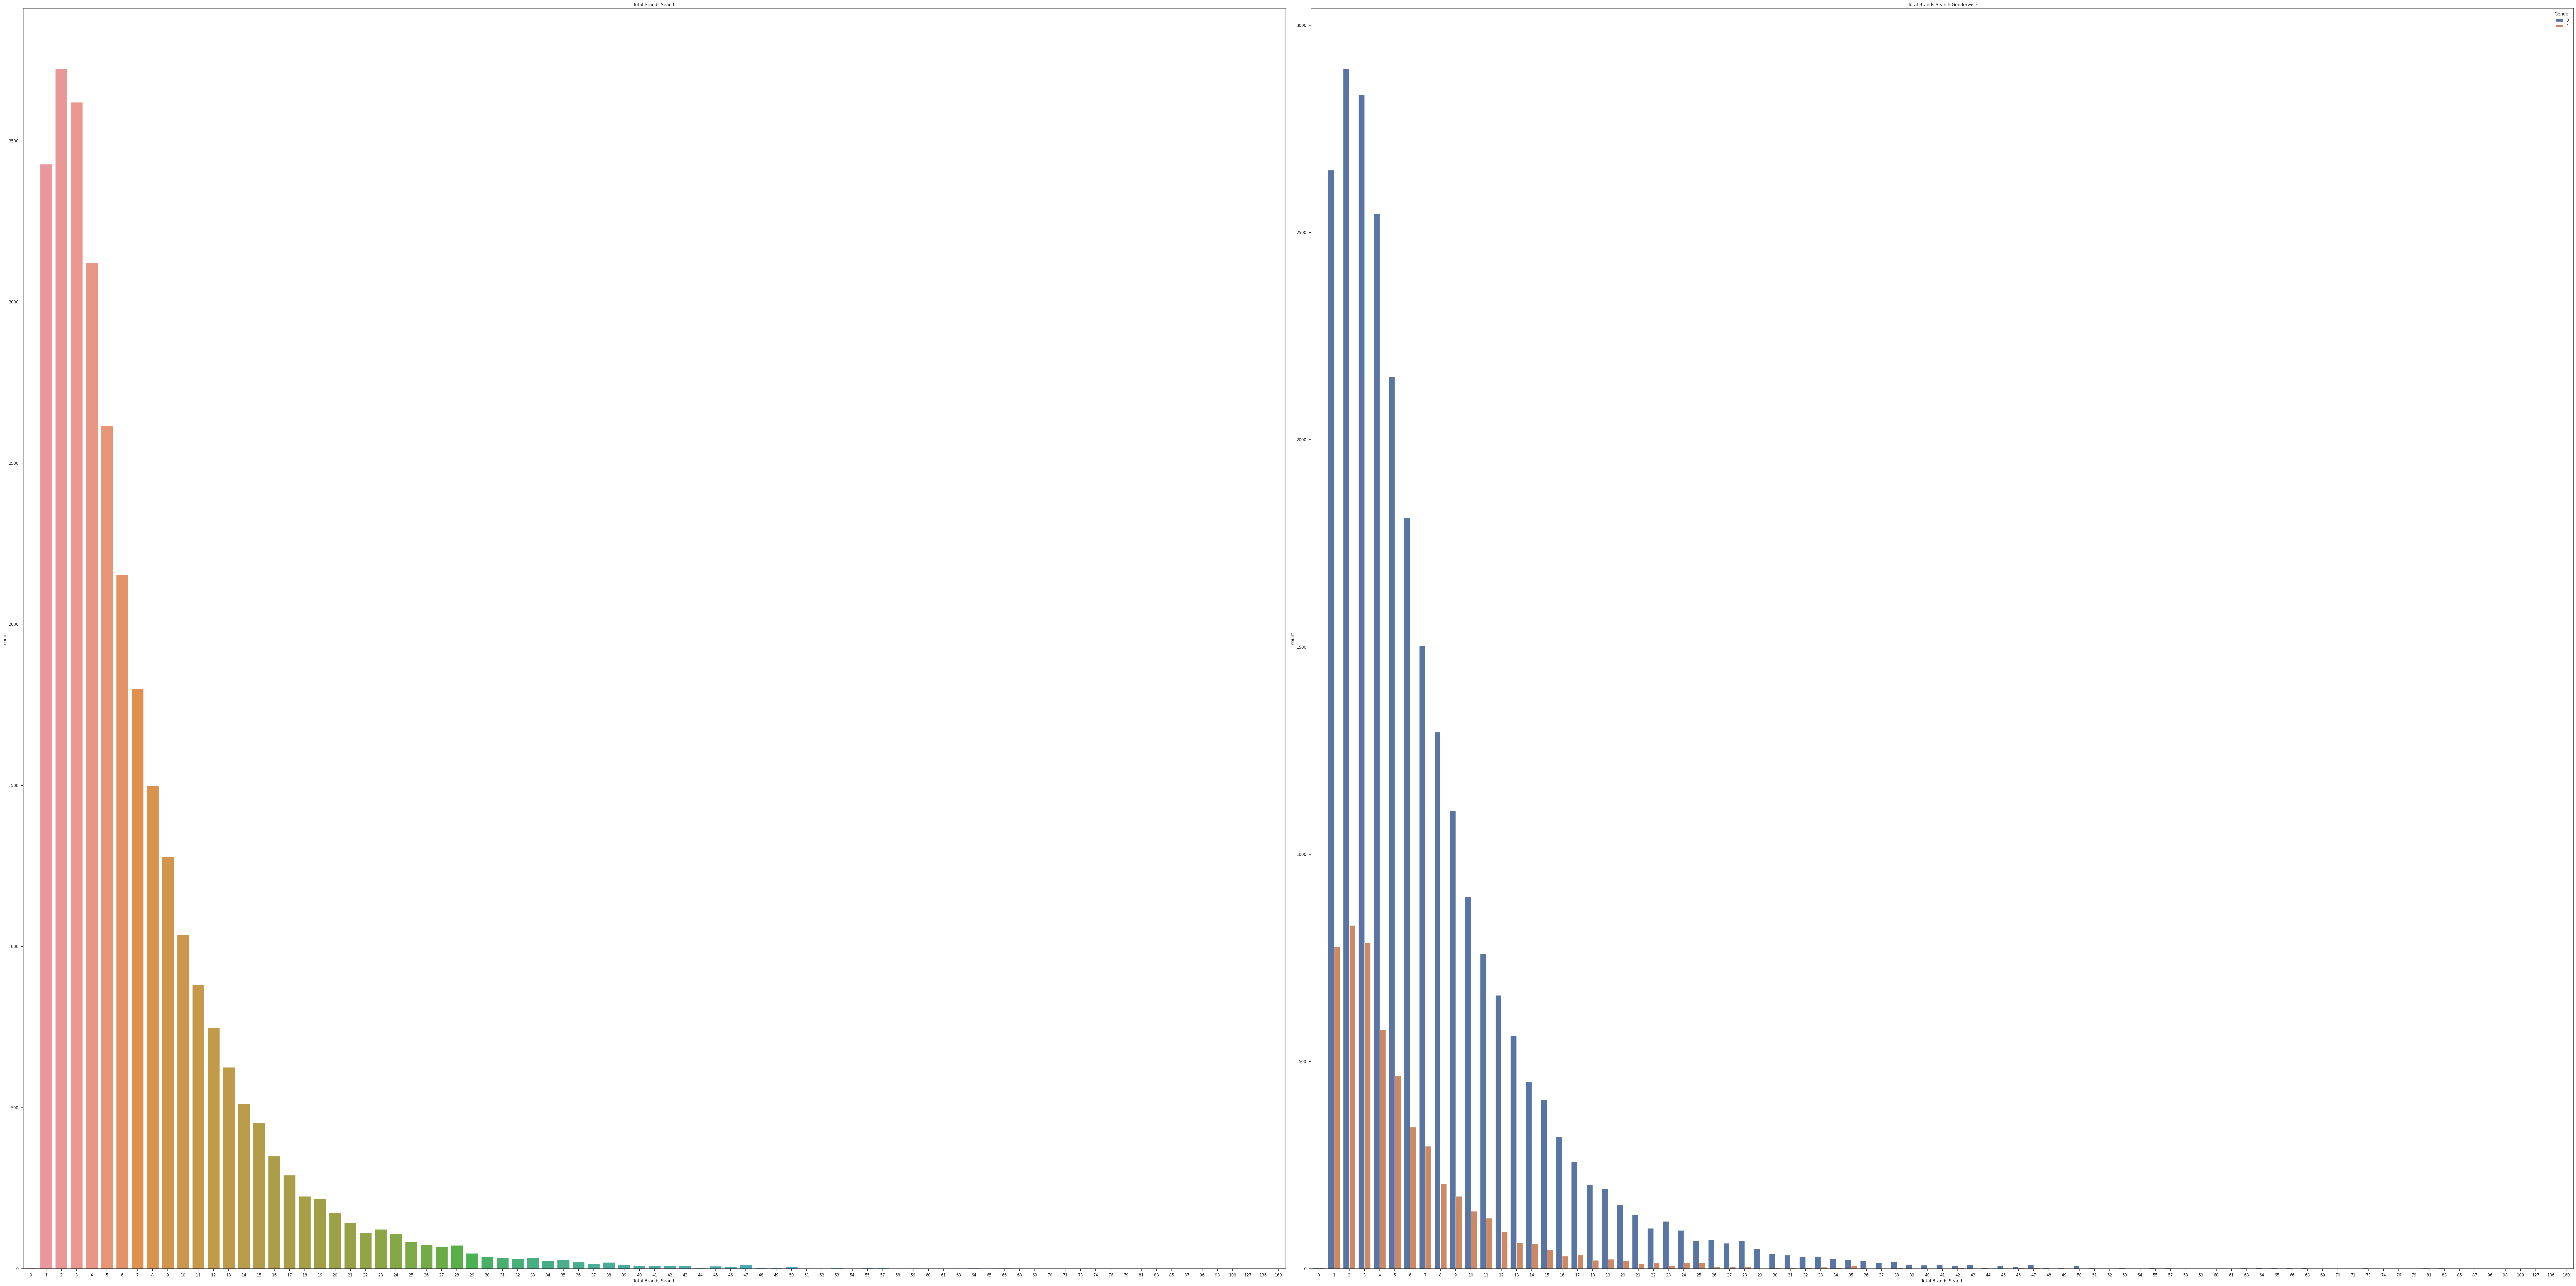

In [52]:

# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(100, 50))

# Plot countplot with hue
sns.countplot(data=df2, x="Total Brands Search", hue="Gender", ax=axes[1])
axes[1].set_title("Total Brands Search Genderwise")

# Plot countplot without hue
sns.countplot(data=df2, x="Total Brands Search", ax=axes[0])
axes[0].set_title("Total Brands Search")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [53]:
df2.head()

Cust_ID  Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
0        1       1       7       0         0        0     0     0   
1        2       0       0       0         1        0     0     0   
2        3       1       7       0         1        0     0     0   
3        4       0       0       0         0        0     0     0   
4        5       0      10       0         0        0     0     0   

   Mondelez International  Wrangler  ...  Dior  Scabal  Tommy Hilfiger  \
0                       0         0  ...     0       0               0   
1                       0         0  ...     1       0               0   
2                       0         0  ...     0       0               0   
3                       0         0  ...     0       0               0   
4                       0         0  ...     0       2               0   

   Hollister  Forever 21  Colavita  Microsoft  Jiffy mix  Kraft  \
0          0           0         0          0          0      0   
1          0           0         0          0          0      0   
2          0           0         0          1          0      0   
3          0           0         0          0          0      0   
4          0           0         0          0          1      1   

   Total Brands Search  
0                    2  
1                   18  
2                    5  
3                    2  
4                   16  

[5 rows x 39 columns]

# ANALYSIS BASED ON ORDERS

In [57]:
X = df2.iloc[:,2:3].values

The code X = df2.iloc[:,2:3].values extracts a subset of data from the DataFrame df2 and assigns it to the variable X. Here's an explanation of what each part of the code does:

df2.iloc[:,2:3]: This uses the iloc indexer to select all rows (:) and a specific range of columns (2:3) in df2. The range 2:3 selects the third column of df2, including the column with index 2 and excluding the column with index 3. The result is a DataFrame containing only the selected column(s).

.values: This converts the selected column(s) from a DataFrame to a NumPy array. The values attribute of a DataFrame returns the underlying data as a NumPy array.

X = ...: This assigns the extracted values to the variable X. The variable X now holds the extracted data as a NumPy array.

In [58]:
X

array([[7],
       [0],
       [7],
       ...,
       [0],
       [0],
       [3]])

In [59]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(X)

The code snippet above demonstrates the use of MinMaxScaler from the sklearn.preprocessing module to perform data scaling. Here's a breakdown of what each part of the code does:

from sklearn.preprocessing import MinMaxScaler: This imports the MinMaxScaler class from the sklearn.preprocessing module.

scaler = MinMaxScaler(): This creates an instance of the MinMaxScaler class and assigns it to the variable scaler.

scaled_data = scaler.fit_transform(X): This line scales the data in the variable X using the fit_transform() method of the scaler object. The fit_transform() method fits the scaler to the data and then transforms it. The result is assigned to the variable scaled_data.

In summary, the code creates a MinMaxScaler object, fits it to the data in X, and then applies the scaling transformation to produce scaled_data. The MinMaxScaler scales the data to a specific range, typically between 0 and 1, preserving the relative relationships between the data points.

In [60]:
scaled_data

array([[0.58333333],
       [0.        ],
       [0.58333333],
       ...,
       [0.        ],
       [0.        ],
       [0.25      ]])

**ELBOW METHOD**

In [64]:
inertia=[]
for n in range(1,10):
  algm=(KMeans(n_clusters=n,init='k-means++',n_init=10,max_iter=300,random_state=100))
  algm.fit(X)
  inertia.append(algm.inertia_)

The code snippet provided calculates the inertia for different numbers of clusters in the K-means clustering algorithm. Here's a breakdown of what each part of the code does:

inertia = []: This initializes an empty list called inertia to store the inertia values.

for n in range(1, 10): This loop iterates over a range of numbers from 1 to 9, representing the number of clusters to evaluate.

algm = (KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, random_state=100)): This line creates an instance of the KMeans class from scikit-learn's cluster module. The n_clusters parameter specifies the number of clusters to create, init='k-means++' indicates the initialization method, n_init=10 sets the number of times the algm will be run with different centroid seeds, max_iter=300 limits the maximum number of iterations, and random_state=100 sets the random seed for reproducibility.

algm.fit(X): This fits the K-means algm to the data X using the fit() method of the algm object. It performs the clustering based on the specified number of clusters and other parameters.

inertia.append(algm.inertia_): This line adds the inertia value of the fitted algm to the inertia list. The inertia represents the sum of squared distances between each data point and its closest centroid, serving as a measure of compactness within the clusters.

The purpose of this code is to evaluate the inertia for different numbers of clusters in K-means clustering. By looping over a range of cluster numbers and fitting the algm to the data, the inertia values are computed and stored in the inertia list. This can help determine the optimal number of clusters by analyzing the inertia values and selecting a point where further increasing the number of clusters provides diminishing returns in terms of reducing inertia.

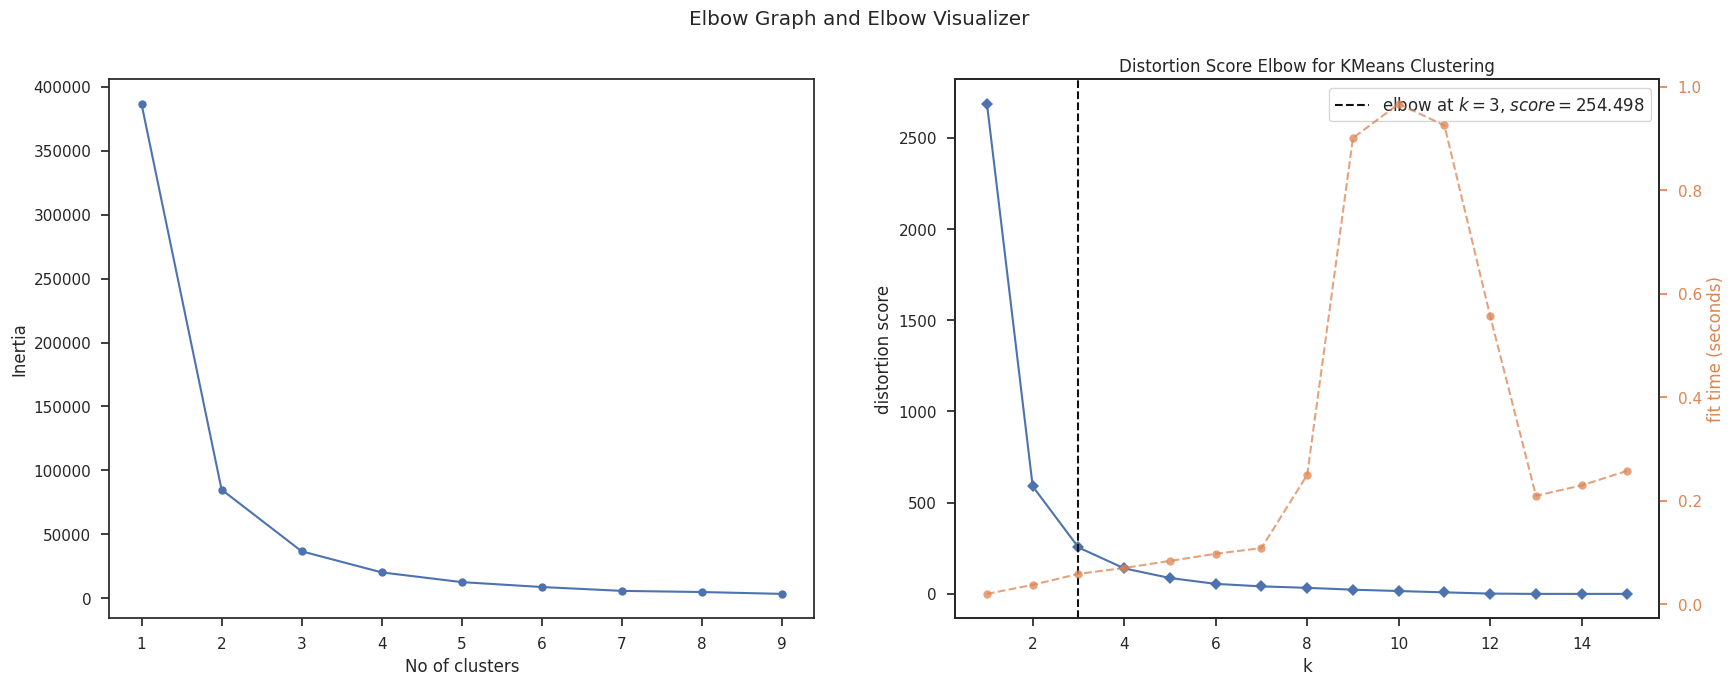

In [65]:
# elbow graph
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(range(1,10), inertia, 'bo-')
plt.xlabel('No of clusters'), plt.ylabel('Inertia')

# Kelbow visualizer
plt.subplot(1,2,2)
kmeans = KMeans()
visualize = KElbowVisualizer(kmeans,k=(1,16))
visualize.fit(scaled_data)
plt.suptitle("Elbow Graph and Elbow Visualizer")
visualize.poof()
plt.show()


The code provided generates an elbow graph and uses the KElbowVisualizer to visualize the optimal number of clusters. The elbow graph plots the inertia values against different numbers of clusters. The KElbowVisualizer is a visual tool that helps determine the elbow point by fitting a KMeans clustering model to the data. The graph and visualizer are displayed using plt.show(). The purpose is to find the optimal number of clusters based on the elbow method.

**Silhouette Analysis for optimal K value**

In [66]:
from sklearn.metrics import silhouette_score

silhouette_avg = []
for n in range(2,6):
  cluster_labels=(KMeans(n_clusters=n,init='k-means++',n_init=10,max_iter=300,random_state=100))
  cluster_labels=cluster_labels.fit_predict(X)
  silhouette_avg.append(silhouette_score(X,cluster_labels))


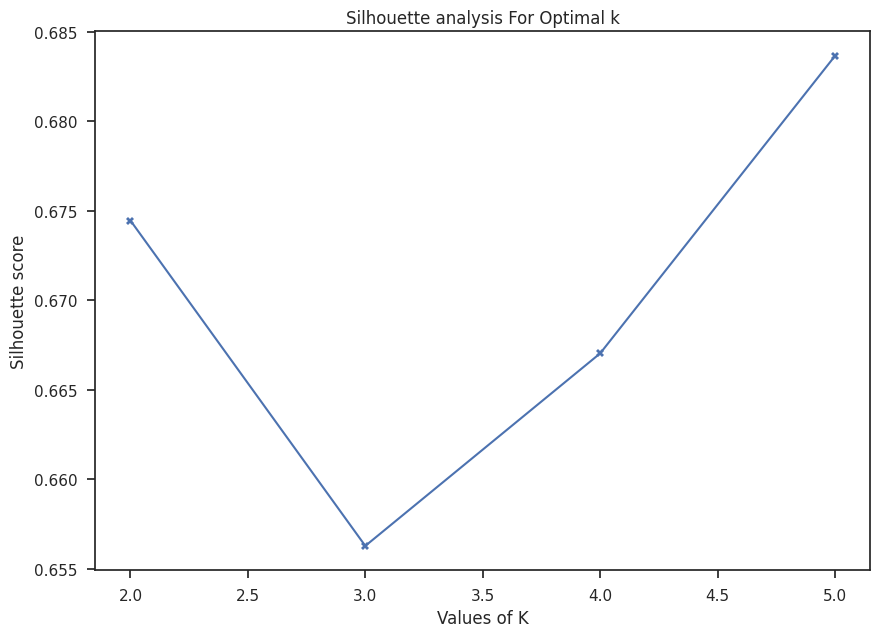

In [67]:
plt.figure(figsize=(10,7))
plt.plot(range(2,6),silhouette_avg,'bX-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [68]:
model = KMeans(n_clusters=3)
model = model.fit(scaled_data)
mp1 = model.predict(scaled_data)
centers = model.cluster_centers_ 

df2['Cluster_A'] = pd.DataFrame(mp1)



In [69]:
df2['Cluster_A'].value_counts()

0    12432
1     9128
2     8440
Name: Cluster_A, dtype: int64

Customer Counts on each Clusters

<function matplotlib.pyplot.show(close=None, block=None)>

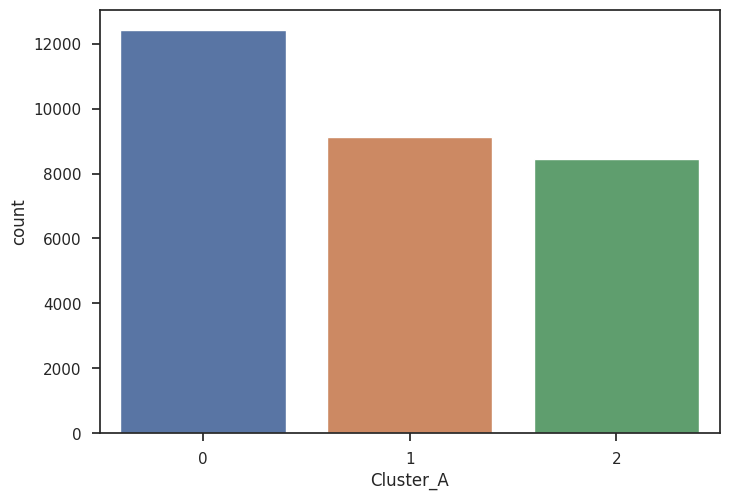

In [70]:
sns.countplot(data=df2,x='Cluster_A')
plt.show

In [71]:
df3 = df2.copy()

In [72]:
df3.columns

Index(['Cust_ID', 'Gender', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus',
       'Udis', 'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks',
       'H&M', 'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics',
       'Siemens', 'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq',
       'IBM', 'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger',
       'Hollister', 'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix',
       'Kraft', 'Total Brands Search', 'Cluster_A'],
      dtype='object')

**CLUSTER 0**

In [73]:
clust_0 = df3.groupby(['Cluster_A','Gender'],as_index=False).sum()
clust_0 = clust_0.loc[clust_0['Cluster_A'] == 0]

In [74]:
clust_0

Cluster_A  Gender    Cust_ID  Orders  Jordan  Gatorade  Samsung  Asus  \
0          0       0  154699357    6269    2470      1947     2086  1813   
1          0       1   28245384    1291     601       777      435    12   

   Udis  Mondelez International  Wrangler  Vans  Fila  Brooks   H&M  \
0  1632                    1480      1266   802   999    1265  3534   
1    75                     162        17   515   267     419   159   

   Dairy Queen  Fendi  Hewlett Packard  Pladis  Asics  Siemens  J.M. Smucker  \
0         2372   1463             1744    1190   2682      454          7497   
1          368    169              216     130    610       95          1319   

   Pop Chips  Juniper  Huawei  Compaq  IBM  Burberry    Mi    LG  Dior  \
0       2421     4902    2584    1184  323      4690  1349  1239  3041   
1        506      902     437     269   89       382    88   126   283   

   Scabal  Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  \
0    4194            1807        847         654      1960       1153   
1     175             172         83          55       386        186   

   Jiffy mix  Kraft  Total Brands Search  
0        870    776                70690  
1        160    142                10787

Text(0.5, 1.0, 'Customers count')

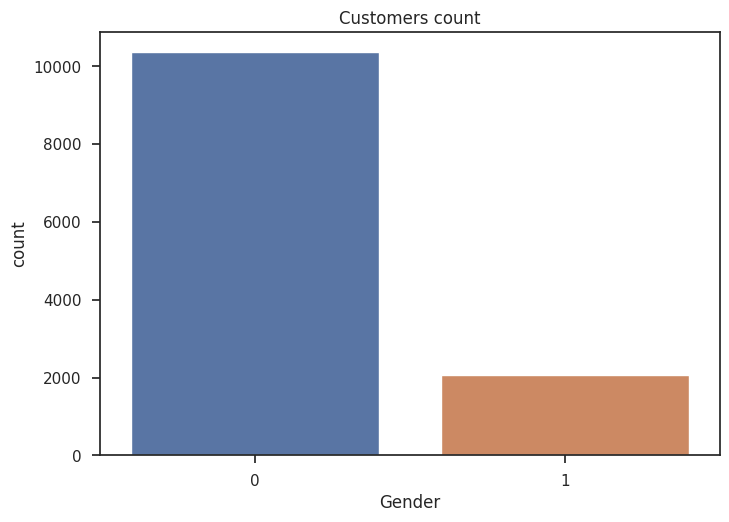

In [75]:
sns.countplot(data=df3.query('Cluster_A == 0') , x='Gender')
plt.title('Customers count')


In [76]:
import plotly.graph_objects as go

# Create bar plot using Plotly
fig = go.Figure(data=go.Bar(x=df3.query('Cluster_A == 0')['Gender'].value_counts().index,
                           y=df3.query('Cluster_A == 0')['Gender'].value_counts().values))

# Update layout
fig.update_layout(title='Customers count',
                  xaxis_title='Gender',
                  yaxis_title='Count')

# Show the figure
fig.show()


Text(0.5, 1.0, 'Genderwise Orders Placed')

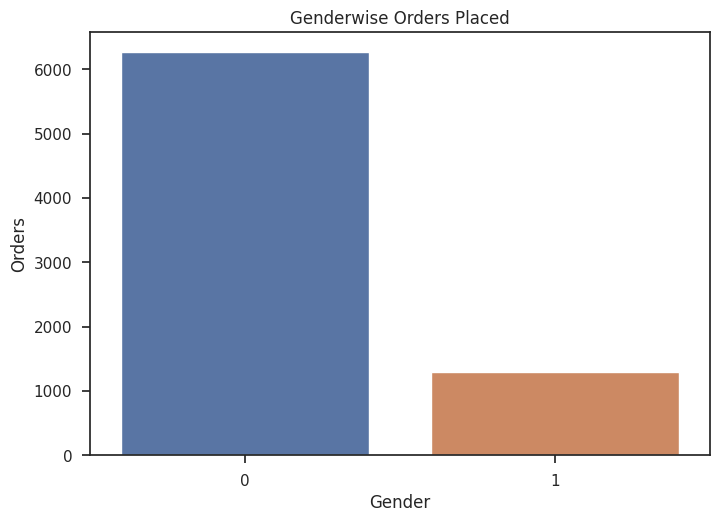

In [77]:
sns.barplot(data=clust_0.query('Cluster_A == 0') , x='Gender', y='Orders')
plt.title('Genderwise Orders Placed')


Text(0.5, 1.0, 'Genderwise Brands Searched')

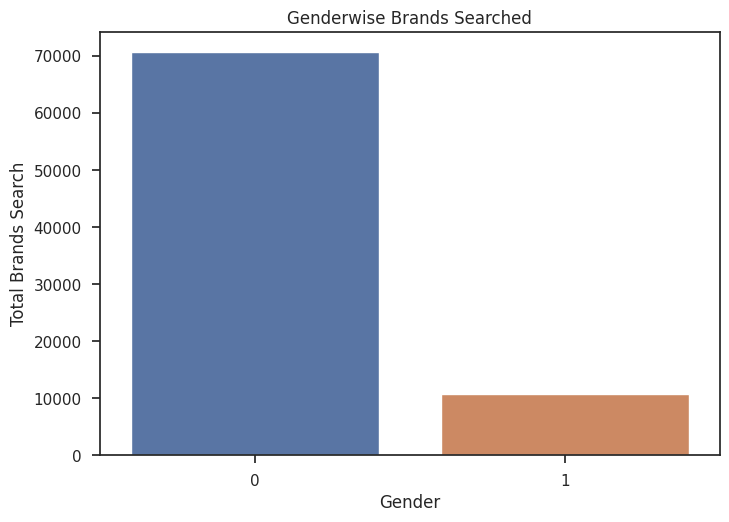

In [78]:
sns.barplot(data=clust_0.query('Cluster_A == 0') , x='Gender', y='Total Brands Search')
plt.title('Genderwise Brands Searched')


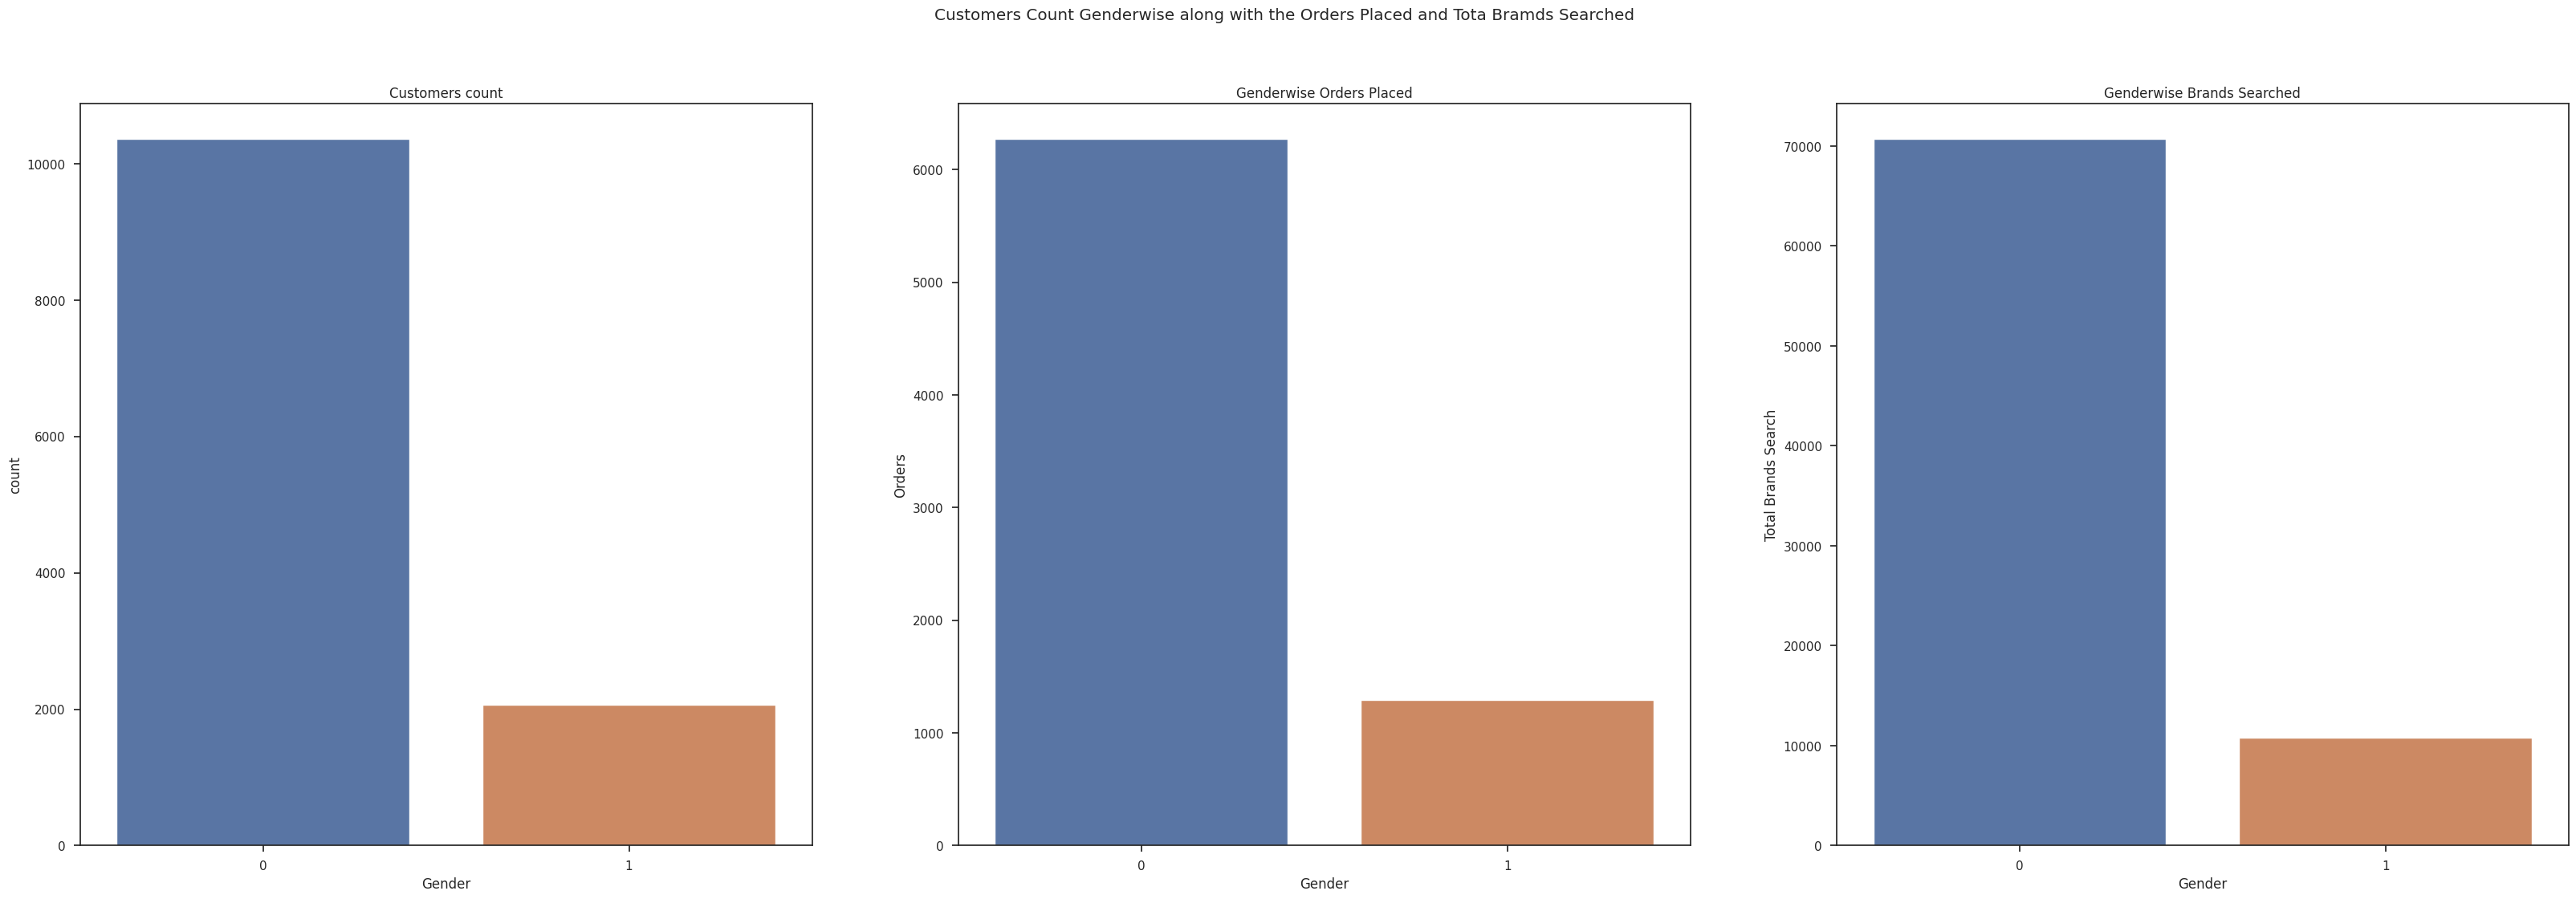

In [79]:
plt.figure(figsize=(40,12))
plt.subplot(1,3,1)
sns.countplot(data=df3.query('Cluster_A == 0') , x='Gender')
plt.title('Customers count')

plt.subplot(1,3,2)
sns.barplot(data=clust_0.query('Cluster_A == 0') , x='Gender', y='Orders')
plt.title('Genderwise Orders Placed')

plt.subplot(1,3,3)
sns.barplot(data=clust_0.query('Cluster_A == 0') , x='Gender', y='Total Brands Search')
plt.title('Genderwise Brands Searched')
plt.suptitle('Customers Count Genderwise along with the Orders Placed and Tota Bramds Searched')
plt.show()

In [80]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# First Graph - Countplot
fig1 = go.Figure(data=go.Bar(x=df3.query('Cluster_A == 0')['Gender'].value_counts().index,
                            y=df3.query('Cluster_A == 0')['Gender'].value_counts().values))
fig1.update_layout(title='Customers Count', xaxis_title='Gender')

# Second Graph - Barplot for Orders Placed
fig2 = go.Figure(data=go.Bar(x=clust_0.query('Cluster_A == 0')['Gender'],
                            y=clust_0.query('Cluster_A == 0')['Orders']))
fig2.update_layout(title='Genderwise Orders Placed', xaxis_title='Gender', yaxis_title='Orders')

# Third Graph - Barplot for Brands Searched
fig3 = go.Figure(data=go.Bar(x=clust_0.query('Cluster_A == 0')['Gender'],
                            y=clust_0.query('Cluster_A == 0')['Total Brands Search']))
fig3.update_layout(title='Genderwise Brands Searched', xaxis_title='Gender', yaxis_title='Total Brands Search')

# Create Subplots
fig = make_subplots(rows=1, cols=3, subplot_titles=['Customers Count', 'Genderwise Orders Placed', 'Genderwise Brands Searched'])

fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=1, col=2)
fig.add_trace(fig3.data[0], row=1, col=3)

fig.update_layout(height=500, width=1200, title='Customers Count Genderwise along with the Orders Placed and Total Brands Searched')
fig.show()


**CLUSTER 1**


In [81]:
clust_1 = df3.groupby(['Cluster_A','Gender'],as_index=False).sum()
clust_1 = clust_1.loc[clust_1['Cluster_A'] == 0]

In [82]:
clust_1

Cluster_A  Gender    Cust_ID  Orders  Jordan  Gatorade  Samsung  Asus  \
0          0       0  154699357    6269    2470      1947     2086  1813   
1          0       1   28245384    1291     601       777      435    12   

   Udis  Mondelez International  Wrangler  Vans  Fila  Brooks   H&M  \
0  1632                    1480      1266   802   999    1265  3534   
1    75                     162        17   515   267     419   159   

   Dairy Queen  Fendi  Hewlett Packard  Pladis  Asics  Siemens  J.M. Smucker  \
0         2372   1463             1744    1190   2682      454          7497   
1          368    169              216     130    610       95          1319   

   Pop Chips  Juniper  Huawei  Compaq  IBM  Burberry    Mi    LG  Dior  \
0       2421     4902    2584    1184  323      4690  1349  1239  3041   
1        506      902     437     269   89       382    88   126   283   

   Scabal  Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  \
0    4194            1807        847         654      1960       1153   
1     175             172         83          55       386        186   

   Jiffy mix  Kraft  Total Brands Search  
0        870    776                70690  
1        160    142                10787

Text(0.5, 1.0, 'Customers count')

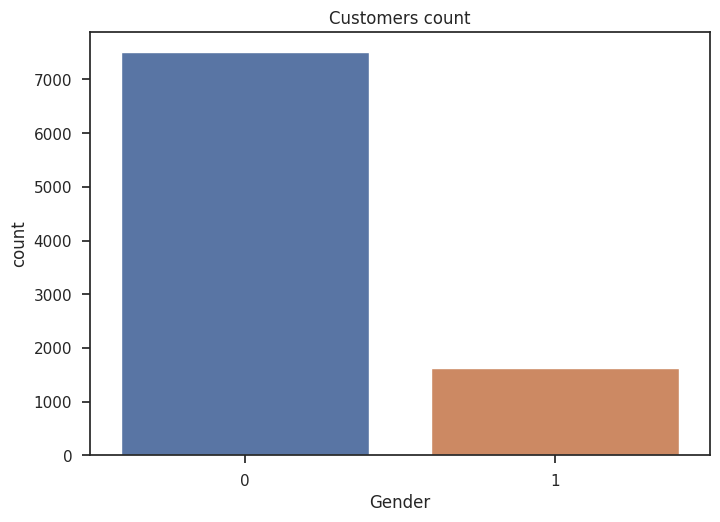

In [83]:
sns.countplot(data=df3.query('Cluster_A == 1') , x='Gender')
plt.title('Customers count')


Text(0.5, 1.0, 'Genderwise Orders Placed')

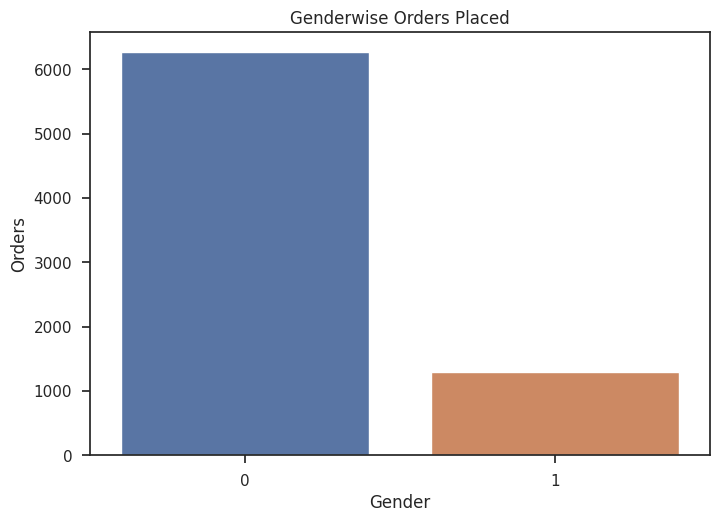

In [84]:
sns.barplot(data= clust_1 , x='Gender', y='Orders')
plt.title('Genderwise Orders Placed')


In [85]:
import plotly.graph_objects as go

# Create bar plot using Plotly
fig = go.Figure(data=go.Bar(x=clust_1['Gender'],
                           y=clust_1['Orders']))

# Update layout
fig.update_layout(title='Genderwise Orders Placed',
                  xaxis_title='Gender',
                  yaxis_title='Orders')

# Show the figure
fig.show()


Text(0.5, 1.0, 'Genderwise Total Brands Searched')

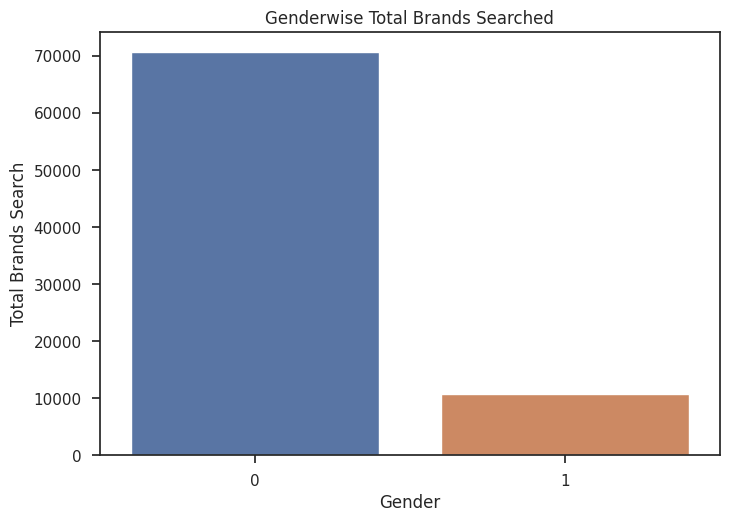

In [86]:
sns.barplot(data=clust_1 , x='Gender', y='Total Brands Search')
plt.title('Genderwise Total Brands Searched')


In [87]:
import plotly.graph_objects as go

# Create bar plot using Plotly
fig = go.Figure(data=go.Bar(x=clust_1['Gender'],
                           y=clust_1['Total Brands Search']))

# Update layout
fig.update_layout(title='Genderwise Total Brands Searched',
                  xaxis_title='Gender',
                  yaxis_title='Total Brands Search')

# Show the figure
fig.show()


In [88]:
import plotly.subplots as sp
import plotly.graph_objects as go

# Create subplots
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=['Genderwise Total Brands Searched', 'Genderwise Orders Placed'])

# Add bar plot for Total Brands Searched
fig.add_trace(go.Bar(x=clust_1['Gender'],
                     y=clust_1['Total Brands Search']),
              row=1, col=1)

# Add bar plot for Orders Placed
fig.add_trace(go.Bar(x=clust_1['Gender'],
                     y=clust_1['Orders']),
              row=1, col=2)

# Update layout
fig.update_layout(height=500, width=900, title='Genderwise Total Brands Searched and Orders Placed')
fig.update_xaxes(title_text='Gender', row=1, col=1)
fig.update_xaxes(title_text='Gender', row=1, col=2)
fig.update_yaxes(title_text='Total Brands Search', row=1, col=1)
fig.update_yaxes(title_text='Orders', row=1, col=2)

# Show the figure
fig.show()


**CLUSTER 2**

In [89]:
clust_2 = df3.groupby(['Cluster_A','Gender'],as_index=False).sum()
clust_2 = clust_2.loc[clust_2['Cluster_A'] == 2]

In [90]:
clust_2

Cluster_A  Gender    Cust_ID  Orders  Jordan  Gatorade  Samsung  Asus  \
4          2       0  106470376   30755    1923      1603     1725  1414   
5          2       1   21374453    6894     521       748      321    22   

   Udis  Mondelez International  Wrangler  Vans  Fila  Brooks   H&M  \
4  1185                    1108       937   517   581     876  2782   
5    55                     147        10   444   173     276   114   

   Dairy Queen  Fendi  Hewlett Packard  Pladis  Asics  Siemens  J.M. Smucker  \
4         1492   1102             1221     829   2231      317          5476   
5          218    142              123      98    594       89          1106   

   Pop Chips  Juniper  Huawei  Compaq  IBM  Burberry   Mi   LG  Dior  Scabal  \
4       1718     3482    2003     804  225      3492  982  730  2039    3092   
5        386      670     344     179   64       304   67   57   246     104   

   Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  Jiffy mix  \
4            1196        649         463      1335        865        665   
5             117         56          41       294        193        110   

   Kraft  Total Brands Search  
4    491                51550  
5    110                 8543

Text(0.5, 1.0, 'Customers count')

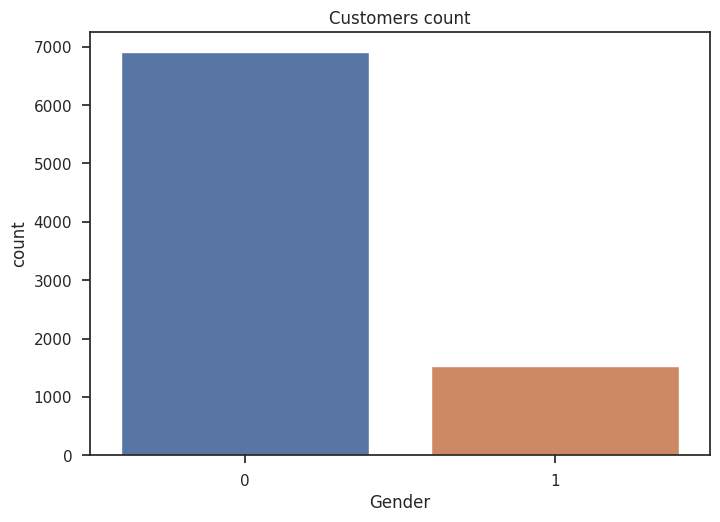

In [91]:
sns.countplot(data=df3.query('Cluster_A == 2') , x='Gender')
plt.title('Customers count')


Text(0.5, 1.0, 'Genderwise Orders Placed')

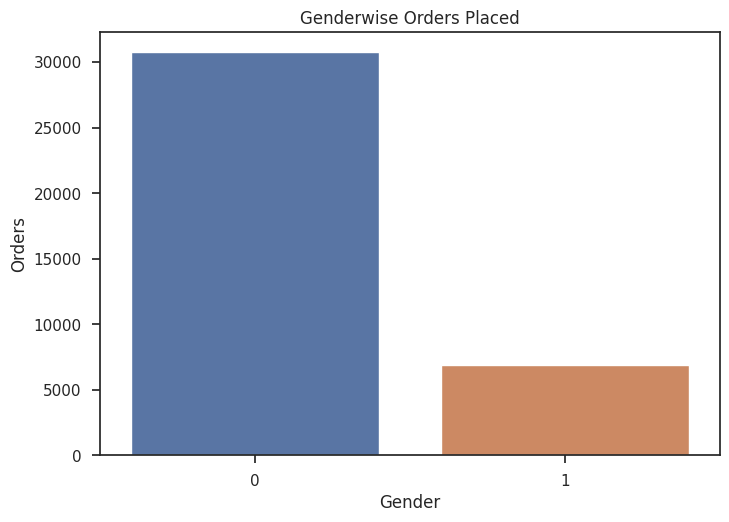

In [92]:
sns.barplot(data= clust_2 , x='Gender', y='Orders')
plt.title('Genderwise Orders Placed')


In [93]:
import plotly.graph_objects as go

# Create bar plot using Plotly
fig = go.Figure(data=go.Bar(x=clust_2['Gender'],
                           y=clust_2['Orders']))

# Update layout
fig.update_layout(title='Genderwise Orders Placed',
                  xaxis_title='Gender',
                  yaxis_title='Orders')

# Show the figure
fig.show()


Text(0.5, 1.0, 'Genderwise Total Brands Searched')

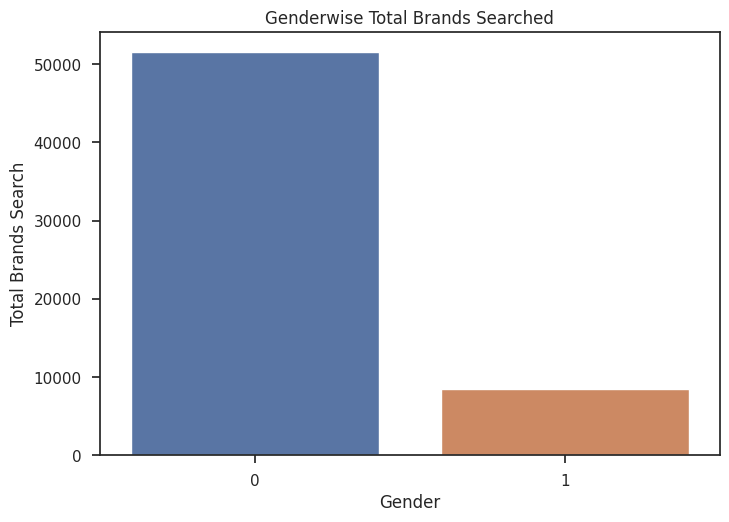

In [94]:
sns.barplot(data=clust_2 , x='Gender', y='Total Brands Search')
plt.title('Genderwise Total Brands Searched')


In [95]:
import plotly.graph_objects as go

# Create bar plot using Plotly
fig = go.Figure(data=go.Bar(x=clust_2['Gender'],
                           y=clust_2['Total Brands Search']))

# Update layout
fig.update_layout(title='Genderwise Total Brands Searched',
                  xaxis_title='Gender',
                  yaxis_title='Total Brands Search')

# Show the figure
fig.show()


In [96]:
import plotly.subplots as sp
import plotly.graph_objects as go

# Create subplots
fig = sp.make_subplots(rows=1, cols=3, subplot_titles=['Customers Count', 'Genderwise Orders Placed', 'Genderwise Total Brands Searched'])

# First subplot - Customers Count
fig.add_trace(go.Bar(x=df3.query('Cluster_A == 2')['Gender'].value_counts().index,
                     y=df3.query('Cluster_A == 2')['Gender'].value_counts().values),
              row=1, col=1)
fig.update_xaxes(title_text='Gender', row=1, col=1)
fig.update_yaxes(title_text='Count', row=1, col=1)

# Second subplot - Genderwise Orders Placed
fig.add_trace(go.Bar(x=clust_2['Gender'],
                     y=clust_2['Orders']),
              row=1, col=2)
fig.update_xaxes(title_text='Gender', row=1, col=2)
fig.update_yaxes(title_text='Orders', row=1, col=2)

# Third subplot - Genderwise Total Brands Searched
fig.add_trace(go.Bar(x=clust_2['Gender'],
                     y=clust_2['Total Brands Search']),
              row=1, col=3)
fig.update_xaxes(title_text='Gender', row=1, col=3)
fig.update_yaxes(title_text='Total Brands Search', row=1, col=3)

# Update layout
fig.update_layout(height=400, width=900, title='Customers Count, Genderwise Orders Placed, and Genderwise Total Brands Searched')

# Show the figure
fig.show()


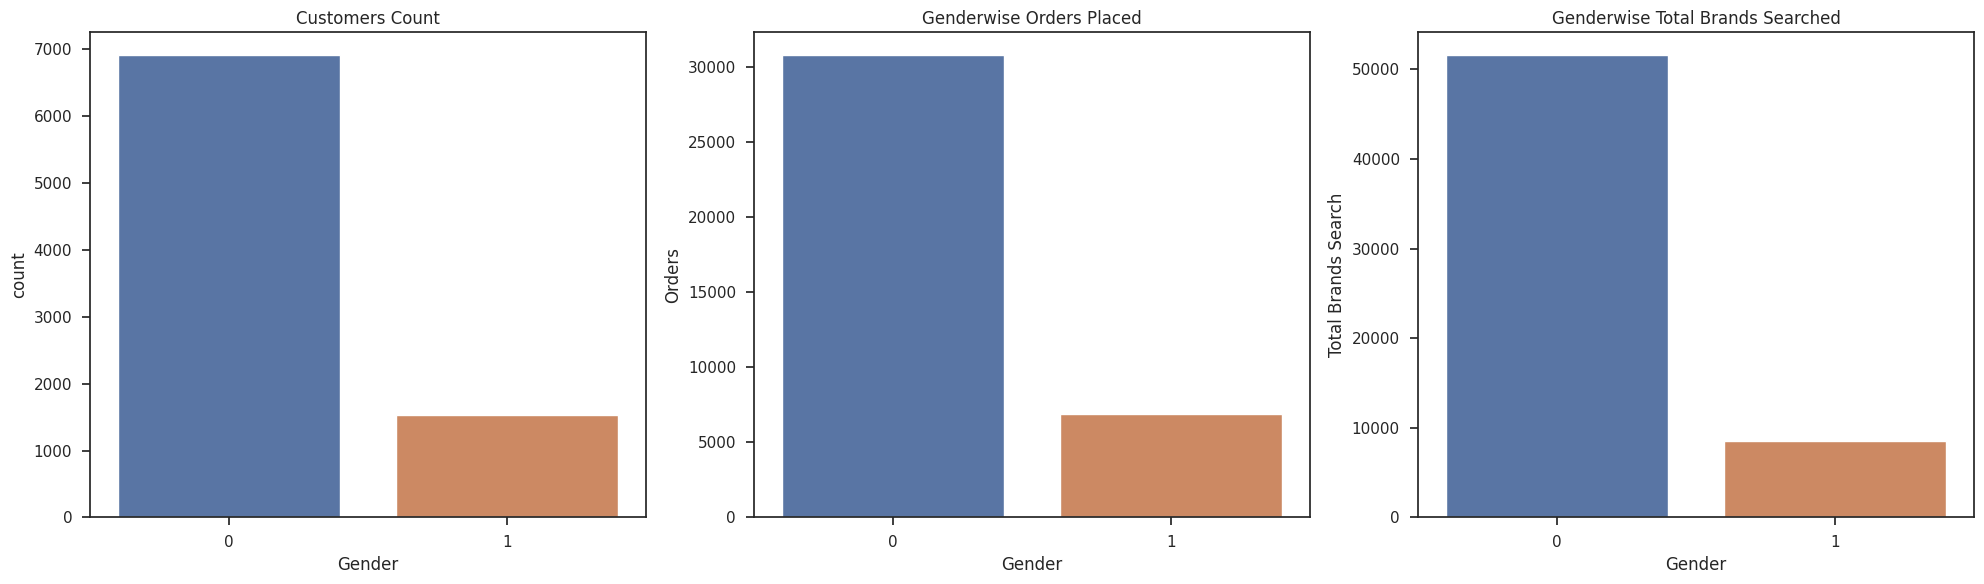

In [97]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# First subplot - Countplot
sns.countplot(data=df3.query('Cluster_A == 2'), x='Gender', ax=axes[0])
axes[0].set_title('Customers Count')

# Second subplot - Barplot for Orders Placed
sns.barplot(data=clust_2, x='Gender', y='Orders', ax=axes[1])
axes[1].set_title('Genderwise Orders Placed')

# Third subplot - Barplot for Total Brands Searched
sns.barplot(data=clust_2, x='Gender', y='Total Brands Search', ax=axes[2])
axes[2].set_title('Genderwise Total Brands Searched')

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()


Group 0: Customers with Least Orders and Highest Total Brands Search

These customers have placed the least number of orders but have shown a high level of interest in exploring different brands.
They are likely to be highly engaged in product research and comparison.
Strategies for this group could include targeted marketing of trendy and popular products to encourage conversions and purchases.
Offering personalized recommendations based on their brand search history can also be effective in driving their engagement and purchase behavior.

***CLUSTERED ANALYSIS BASED ON ORDERS***

In [202]:
clust_a = df3.groupby(['Cluster_A','Gender'],as_index=False).sum()
clust_a

Cluster_A  Gender    Cust_ID  Orders  Jordan  Gatorade  Samsung  Asus  \
0          0       0  154699357    6269    2470      1947     2086  1813   
1          0       1   28245384    1291     601       777      435    12   
2          1       0  116501910   65606    1982      1678     1780  1565   
3          1       1   22723520   14279     526       817      341    14   
4          2       0  106470376   30755    1923      1603     1725  1414   
5          2       1   21374453    6894     521       748      321    22   

   Udis  Mondelez International  Wrangler  Vans  Fila  Brooks   H&M  \
0  1632                    1480      1266   802   999    1265  3534   
1    75                     162        17   515   267     419   159   
2  1308                    1145       958   569   654    1019  3131   
3    51                     151        20   496   154     349   126   
4  1185                    1108       937   517   581     876  2782   
5    55                     147        10   444   173     276   114   

   Dairy Queen  Fendi  Hewlett Packard  Pladis  Asics  Siemens  J.M. Smucker  \
0         2372   1463             1744    1190   2682      454          7497   
1          368    169              216     130    610       95          1319   
2         1571   1246             1389     835   2252      375          5943   
3          259    122              140     101    638      112          1303   
4         1492   1102             1221     829   2231      317          5476   
5          218    142              123      98    594       89          1106   

   Pop Chips  Juniper  Huawei  Compaq  IBM  Burberry    Mi    LG  Dior  \
0       2421     4902    2584    1184  323      4690  1349  1239  3041   
1        506      902     437     269   89       382    88   126   283   
2       1954     3489    2079     848  181      3684  1073   864  2241   
3        452      680     293     279   77       289    81    60   284   
4       1718     3482    2003     804  225      3492   982   730  2039   
5        386      670     344     179   64       304    67    57   246   

   Scabal  Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  \
0    4194            1807        847         654      1960       1153   
1     175             172         83          55       386        186   
2    3440            1322        605         465      1465        918   
3      97             155         90          42       326        176   
4    3092            1196        649         463      1335        865   
5     104             117         56          41       294        193   

   Jiffy mix  Kraft  Total Brands Search  
0        870    776                70690  
1        160    142                10787  
2        713    510                55251  
3        123     98                 9322  
4        665    491                51550  
5        110    110                 8543

In [203]:
clust_a1 = df3.groupby(['Cluster_A'],as_index=False).sum()
clust_a1

Cluster_A    Cust_ID  Gender  Orders  Jordan  Gatorade  Samsung  Asus  \
0          0  182944741    2070    7560    3071      2724     2521  1825   
1          1  139225430    1620   79885    2508      2495     2121  1579   
2          2  127844829    1532   37649    2444      2351     2046  1436   

   Udis  Mondelez International  Wrangler  Vans  Fila  Brooks   H&M  \
0  1707                    1642      1283  1317  1266    1684  3693   
1  1359                    1296       978  1065   808    1368  3257   
2  1240                    1255       947   961   754    1152  2896   

   Dairy Queen  Fendi  Hewlett Packard  Pladis  Asics  Siemens  J.M. Smucker  \
0         2740   1632             1960    1320   3292      549          8816   
1         1830   1368             1529     936   2890      487          7246   
2         1710   1244             1344     927   2825      406          6582   

   Pop Chips  Juniper  Huawei  Compaq  IBM  Burberry    Mi    LG  Dior  \
0       2927     5804    3021    1453  412      5072  1437  1365  3324   
1       2406     4169    2372    1127  258      3973  1154   924  2525   
2       2104     4152    2347     983  289      3796  1049   787  2285   

   Scabal  Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  \
0    4369            1979        930         709      2346       1339   
1    3537            1477        695         507      1791       1094   
2    3196            1313        705         504      1629       1058   

   Jiffy mix  Kraft  Total Brands Search  
0       1030    918                81477  
1        836    608                64573  
2        775    601                60093

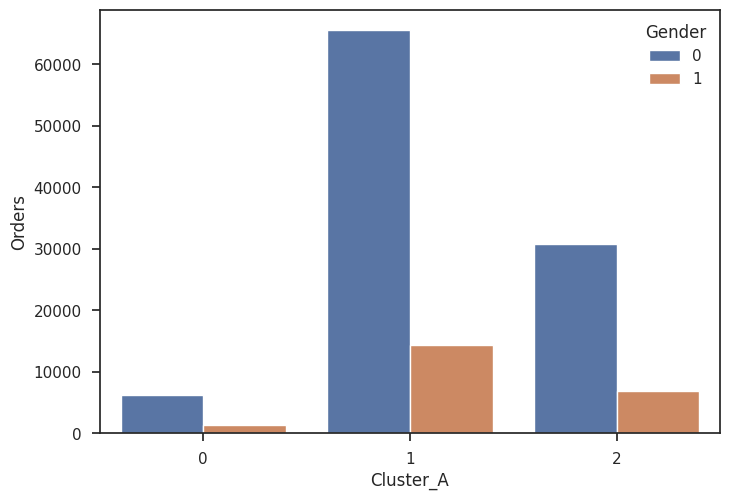

In [204]:
sns.barplot(data=clust_a , x='Cluster_A', y='Orders', hue = 'Gender')
plt.show()

In [212]:
import plotly.express as px

fig = px.bar(clust_a, x='Cluster_A', y='Orders', color='Gender')
fig.show()


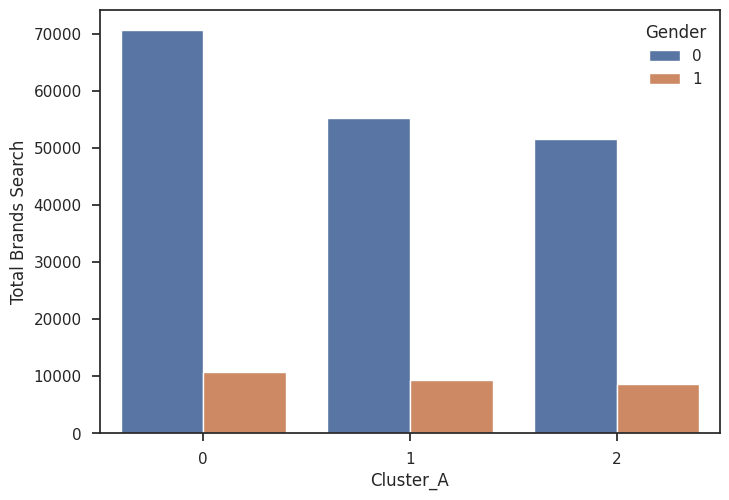

In [205]:
sns.barplot(data=clust_a , x='Cluster_A', y='Total Brands Search', hue = 'Gender')
plt.show()

In [213]:
import plotly.express as px

fig = px.bar(clust_a, x='Cluster_A', y='Total Brands Search', color='Gender')
fig.show()


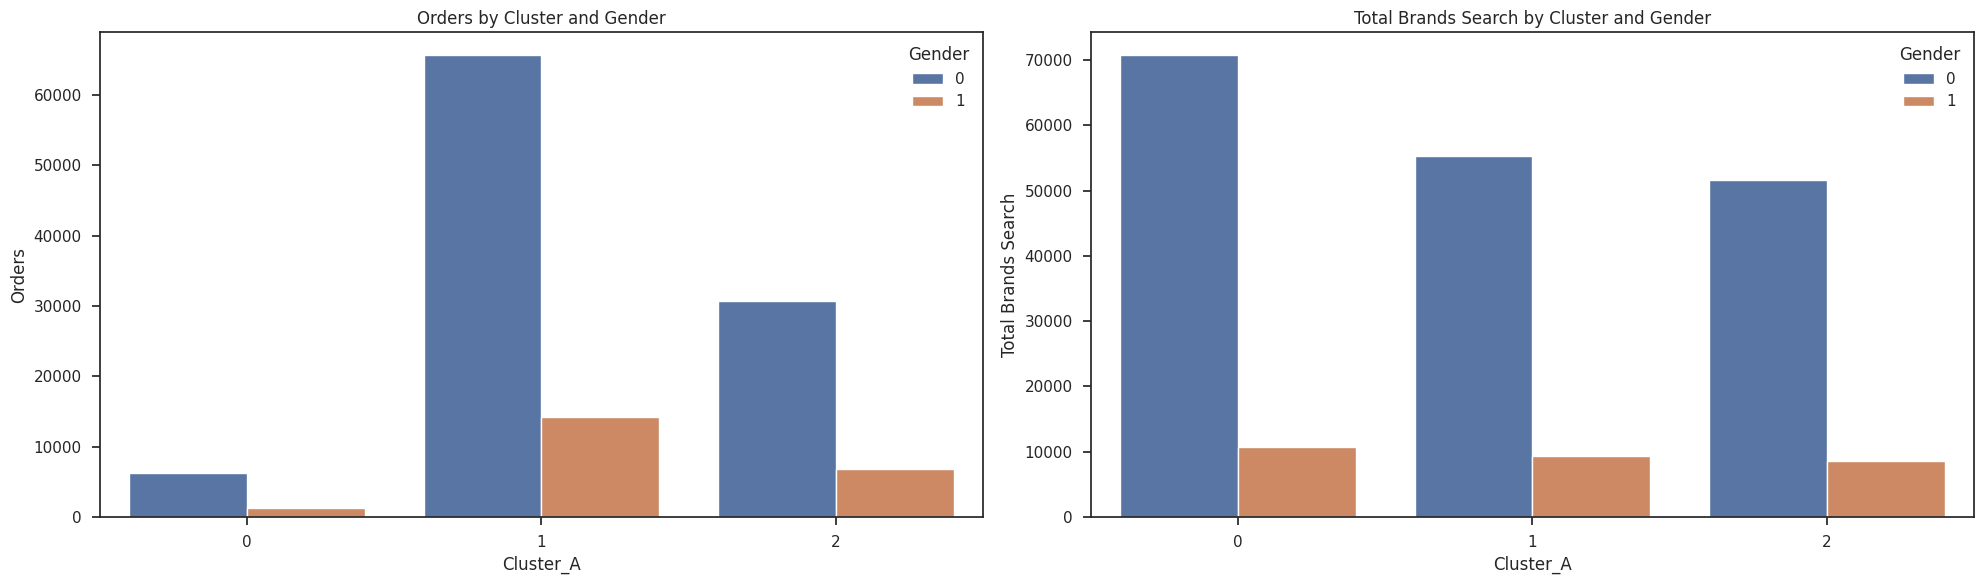

In [206]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.barplot(data=clust_a, x='Cluster_A', y='Orders', hue='Gender', ax=axes[0])
axes[0].set_title('Orders by Cluster and Gender')

sns.barplot(data=clust_a, x='Cluster_A', y='Total Brands Search', hue='Gender', ax=axes[1])
axes[1].set_title('Total Brands Search by Cluster and Gender')

plt.tight_layout()
plt.show()


In [214]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, subplot_titles=('Orders by Cluster and Gender', 'Total Brands Search by Cluster and Gender'))

# Add the first subplot (Orders by Cluster and Gender)
fig.add_trace(go.Bar(x=clust_a['Cluster_A'], y=clust_a['Orders'], marker_color=clust_a['Gender'], legendgroup='Gender', name='Orders'),
              row=1, col=1)

# Add the second subplot (Total Brands Search by Cluster and Gender)
fig.add_trace(go.Bar(x=clust_a['Cluster_A'], y=clust_a['Total Brands Search'], marker_color=clust_a['Gender'], legendgroup='Gender', name='Total Brands Search'),
              row=1, col=2)

# Update the layout
fig.update_layout(showlegend=False, height=500, width=900)

# Show the plot
fig.show()


In [215]:
clust_a1

Cluster_A    Cust_ID  Gender  Orders  Jordan  Gatorade  Samsung  Asus  \
0          0  182944741    2070    7560    3071      2724     2521  1825   
1          1  139225430    1620   79885    2508      2495     2121  1579   
2          2  127844829    1532   37649    2444      2351     2046  1436   

   Udis  Mondelez International  Wrangler  Vans  Fila  Brooks   H&M  \
0  1707                    1642      1283  1317  1266    1684  3693   
1  1359                    1296       978  1065   808    1368  3257   
2  1240                    1255       947   961   754    1152  2896   

   Dairy Queen  Fendi  Hewlett Packard  Pladis  Asics  Siemens  J.M. Smucker  \
0         2740   1632             1960    1320   3292      549          8816   
1         1830   1368             1529     936   2890      487          7246   
2         1710   1244             1344     927   2825      406          6582   

   Pop Chips  Juniper  Huawei  Compaq  IBM  Burberry    Mi    LG  Dior  \
0       2927     5804    3021    1453  412      5072  1437  1365  3324   
1       2406     4169    2372    1127  258      3973  1154   924  2525   
2       2104     4152    2347     983  289      3796  1049   787  2285   

   Scabal  Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  \
0    4369            1979        930         709      2346       1339   
1    3537            1477        695         507      1791       1094   
2    3196            1313        705         504      1629       1058   

   Jiffy mix  Kraft  Total Brands Search  
0       1030    918                81477  
1        836    608                64573  
2        775    601                60093

# CONCLUSION
## ANALYSIS BASED ON ORDERS

Group 0: 
      Customers with Least Orders and Highest Total Brands Search

* Orders : 7560
* Total Brands Search : 81477
*  These customers have placed the least number of orders but have shown a high level of interest in exploring different brands.
*  They are likely to be highly engaged in product research and comparison.
*  Strategies for this group could include targeted marketing of trendy and popular products to encourage conversions and purchases.
*  Offering personalized recommendations based on their brand search history can also be effective in driving their engagement and purchase behavior.

Group 1: Customers with Highest Orders and Less Total Brands Search compared to Group 0

* Orders : 79885
* Total Brands Search : 64573
* This group consists of customers who have placed the highest number of orders but have relatively fewer brand searches.
* They may have established preferences and loyalty towards certain brands, leading to fewer brand exploration activities.
* Strategies for this group can focus on enhancing customer loyalty, such as providing exclusive offers and rewards for repeat purchases.
* Upselling and cross-selling techniques can be employed to introduce them to new brands and products that align with their preferences.

Group 2: Customers with Orders Higher than Group 0 and Less than Group 1, and Least Total Brands Search

* Orders : 37649
* Total Brands Search : 60093
* These customers fall in between Group 0 and Group 1 in terms of order frequency and brand search activity.
* They have placed more orders compared to Group 0 but still fewer than Group 1, and they show less interest in exploring a wide range of brands.
* Targeting this group might involve a balanced approach, emphasizing both product recommendations based on their existing preferences and introducing them to new brands and products.
* Providing incentives, such as limited-time discounts and promotions, can encourage them to try out new brands and increase their brand exploration activities.




# ANALYSIS BASED ON ORDERS AND TOTAL BRANDS SEARCH


In [104]:
df2.head()

Cust_ID  Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
0        1       1       7       0         0        0     0     0   
1        2       0       0       0         1        0     0     0   
2        3       1       7       0         1        0     0     0   
3        4       0       0       0         0        0     0     0   
4        5       0      10       0         0        0     0     0   

   Mondelez International  Wrangler  Vans  Fila  Brooks  H&M  Dairy Queen  \
0                       0         0     2     0       0    0            0   
1                       0         0     0     0       0    1            0   
2                       0         0     0     0       0    0            0   
3                       0         0     0     0       0    1            0   
4                       0         0     0     0       0    0            1   

   Fendi  Hewlett Packard  Pladis  Asics  Siemens  J.M. Smucker  Pop Chips  \
0      0                0       0      0        0             0          0   
1      0                0       0      0        0             2          2   
2      0                0       0      2        0             1          0   
3      0                0       0      0        0             0          1   
4      0                0       5      1        0             3          0   

   Juniper  Huawei  Compaq  IBM  Burberry  Mi  LG  Dior  Scabal  \
0        0       0       0    0         0   0   0     0       0   
1        1       0       0    0         6   4   0     1       0   
2        0       0       0    0         0   0   0     0       0   
3        0       0       0    0         0   0   0     0       0   
4        1       0       0    0         1   0   0     0       2   

   Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  Jiffy mix  \
0               0          0           0         0          0          0   
1               0          0           0         0          0          0   
2               0          0           0         0          1          0   
3               0          0           0         0          0          0   
4               0          0           0         0          0          1   

   Kraft  Total Brands Search  Cluster_A  
0      0                    2          1  
1      0                   18          0  
2      0                    5          1  
3      0                    2          0  
4      1                   16          1

In [105]:
df_ord_tb = df2.copy()

In [106]:
df_ord_tb.head()

Cust_ID  Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
0        1       1       7       0         0        0     0     0   
1        2       0       0       0         1        0     0     0   
2        3       1       7       0         1        0     0     0   
3        4       0       0       0         0        0     0     0   
4        5       0      10       0         0        0     0     0   

   Mondelez International  Wrangler  Vans  Fila  Brooks  H&M  Dairy Queen  \
0                       0         0     2     0       0    0            0   
1                       0         0     0     0       0    1            0   
2                       0         0     0     0       0    0            0   
3                       0         0     0     0       0    1            0   
4                       0         0     0     0       0    0            1   

   Fendi  Hewlett Packard  Pladis  Asics  Siemens  J.M. Smucker  Pop Chips  \
0      0                0       0      0        0             0          0   
1      0                0       0      0        0             2          2   
2      0                0       0      2        0             1          0   
3      0                0       0      0        0             0          1   
4      0                0       5      1        0             3          0   

   Juniper  Huawei  Compaq  IBM  Burberry  Mi  LG  Dior  Scabal  \
0        0       0       0    0         0   0   0     0       0   
1        1       0       0    0         6   4   0     1       0   
2        0       0       0    0         0   0   0     0       0   
3        0       0       0    0         0   0   0     0       0   
4        1       0       0    0         1   0   0     0       2   

   Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  Jiffy mix  \
0               0          0           0         0          0          0   
1               0          0           0         0          0          0   
2               0          0           0         0          1          0   
3               0          0           0         0          0          0   
4               0          0           0         0          0          1   

   Kraft  Total Brands Search  Cluster_A  
0      0                    2          1  
1      0                   18          0  
2      0                    5          1  
3      0                    2          0  
4      1                   16          1

In [107]:
df_ord_tb = df_ord_tb.iloc[:, [2, 38]]
# The meaning of this code is to create a new DataFrame (df_ord_tb) that contains only the columns at index 2 and 38 from the original DataFrame df_ord_tb. 

In [109]:
df_ord_tb.head()

Orders  Total Brands Search
0       7                    2
1       0                   18
2       7                    5
3       0                    2
4      10                   16

In [110]:
Y = df_ord_tb.values

In [111]:
Y

array([[ 7,  2],
       [ 0, 18],
       [ 7,  5],
       ...,
       [ 0,  2],
       [ 0,  1],
       [ 3,  5]])

**ELBOW METHOD**

In [112]:
inertia_1=[]
for n in range(1,16):
  algorithm_1=(KMeans(n_clusters=n,init='k-means++',n_init=10,max_iter=300,random_state=100))
  algorithm_1.fit(Y)
  inertia_1.append(algorithm_1.inertia_)

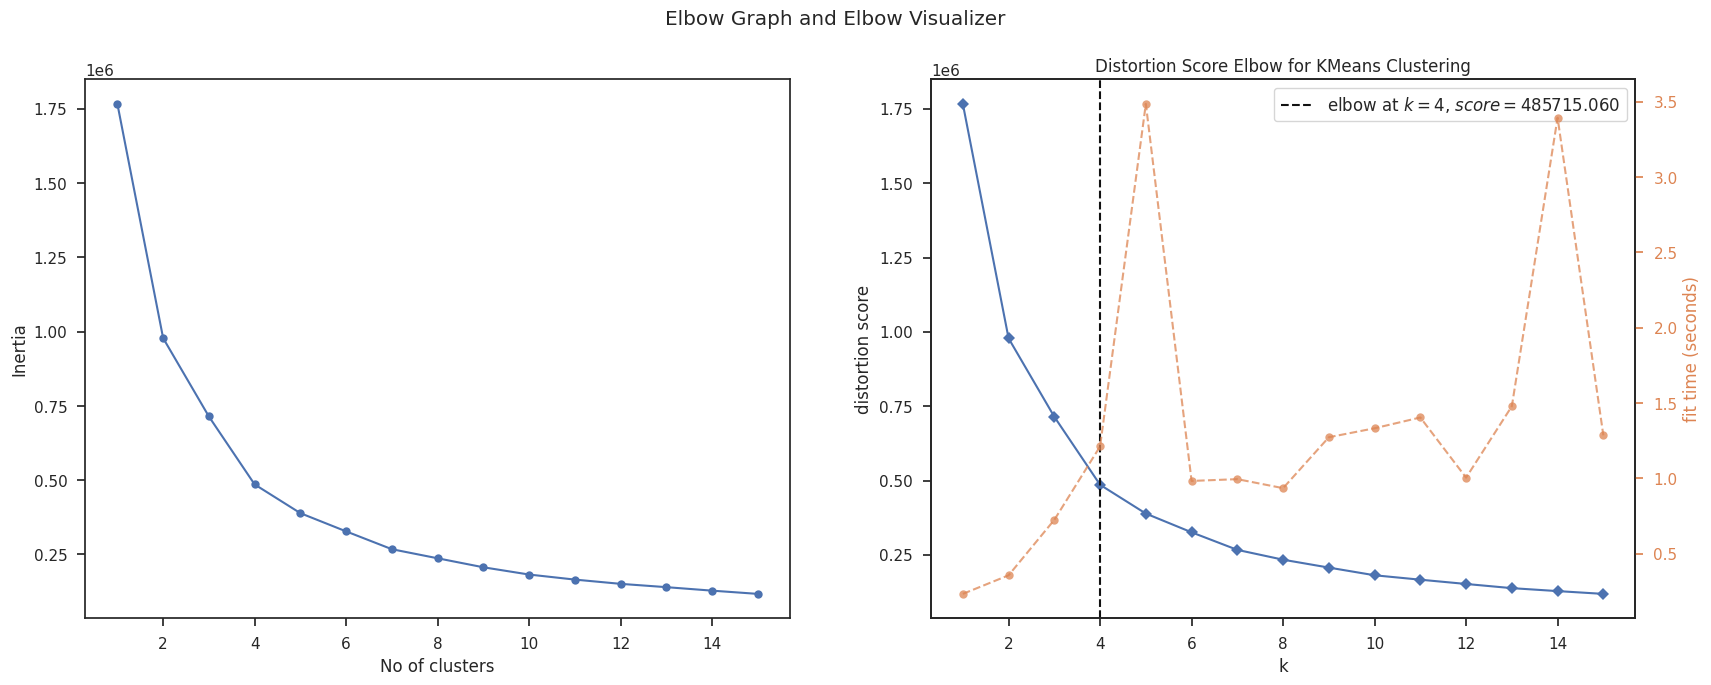

In [113]:
# elbow graph
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(range(1,16), inertia_1, 'bo-')
plt.xlabel('No of clusters'), plt.ylabel('Inertia')

# Kelbow visualizer
plt.subplot(1,2,2)
kmeans = KMeans()
visualize = KElbowVisualizer(kmeans,k=(1,16))
visualize.fit(Y)
plt.suptitle("Elbow Graph and Elbow Visualizer")
visualize.poof()
plt.show()
     

SILHOUTTE ANALYSIS FOR OPTIMAL K VALUE


In [114]:
from sklearn.metrics import silhouette_score

silhouette_avg_1 = []
for n in range(2,6):
  cluster_labels_1=(KMeans(n_clusters=n,init='k-means++',n_init=10,max_iter=300,random_state=100))
  cluster_labels_1=cluster_labels_1.fit_predict(Y)
  silhouette_avg_1.append(silhouette_score(Y,cluster_labels_1))


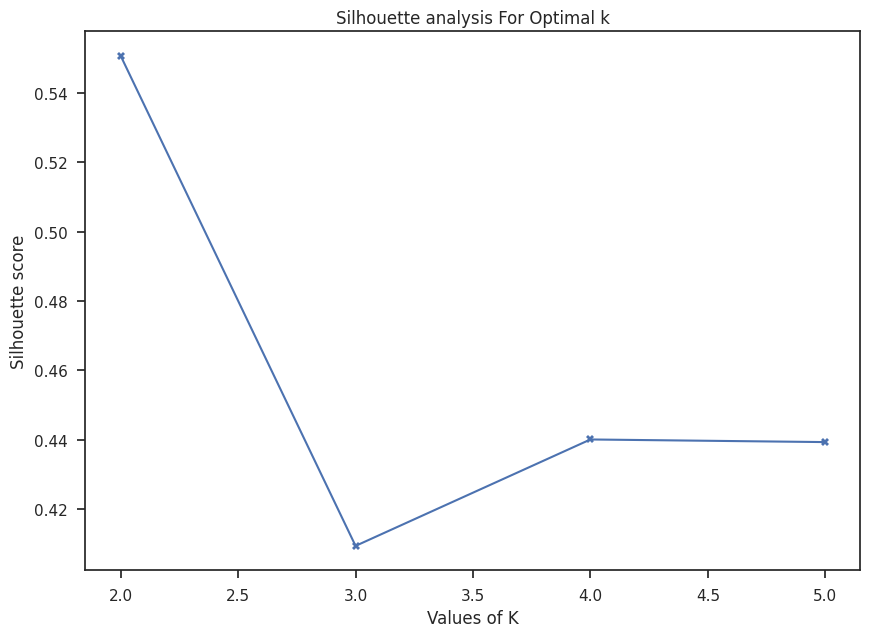

In [115]:
plt.figure(figsize=(10,7))
plt.plot(range(2,6),silhouette_avg_1,'bX-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [116]:
model_1 = KMeans(n_clusters=4)
model_1 = model_1.fit(Y)
mp2 = model_1.predict(Y)
centers = model_1.cluster_centers_ 

df2['Cluster_B'] = pd.DataFrame(mp2)



In [117]:
df2['Cluster_B'].value_counts()

1    12925
2    10048
0     6051
3      976
Name: Cluster_B, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

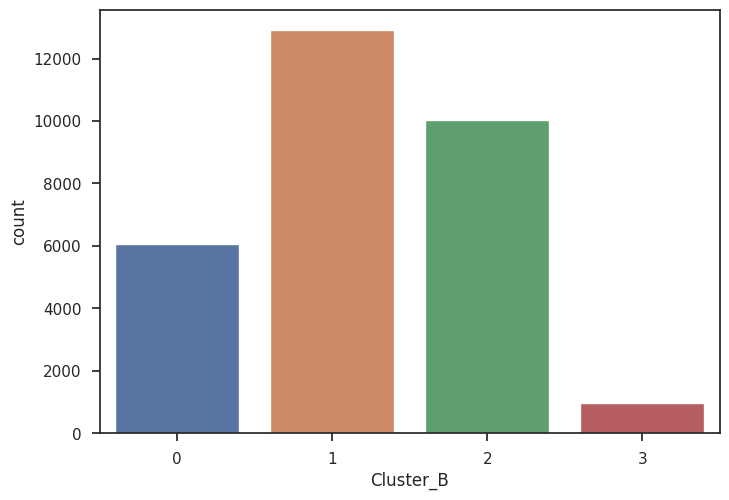

In [118]:
sns.countplot(data=df2,x='Cluster_B')
plt.show

In [122]:
clust_b = df2.groupby(['Cluster_B','Gender'],as_index=False).sum()

In [123]:
clust_b

Cluster_B  Gender    Cust_ID  Orders  Jordan  Gatorade  Samsung  Asus  \
0          0       0   87699885   22475    2762      2310     2621  2356   
1          0       1   10334984    2983     547       710      268    20   
2          1       0  153405982   13285    1407      1120     1089   973   
3          1       1   32734644    3269     516       769      404     9   
4          2       0  121343430   63101    1192      1027     1121   910   
5          2       1   27960668   15788     489       762      305    15   
6          3       0   15222346    3769    1014       771      760   553   
7          3       1    1313061     424      96       101      120     4   

   Udis  Mondelez International  Wrangler  Vans  Fila  Brooks   H&M  \
0  1935                    1471      1378   763   886    1266  3781   
1    60                     122        12   574   246     321    96   
2   901                    1036       731   444   638     714  2297   
3    72                     169        16   392   190     342   137   
4   776                     815       645   304   457     604  2175   
5    44                     150         9   401   134     323   124   
6   513                     411       407   377   253     576  1194   
7     5                      19        10    88    24      58    42   

   Dairy Queen  Fendi  Hewlett Packard  Pladis  Asics  Siemens  J.M. Smucker  \
0         1974   1418             1526    1183   3303      487          6447   
1          329    132               93     151    655       99           998   
2          800   1007             1334     403   1402      303          5387   
3          204    137              226      53    447       74          1231   
4          665    886             1060     305   1240      217          4581   
5          149    128              144      52    488       80          1245   
6         1996    500              434     963   1220      139          2501   
7          163     36               16      73    252       43           254   

   Pop Chips  Juniper  Huawei  Compaq  IBM  Burberry    Mi    LG  Dior  \
0       2151     4872    3102    1155  247      5058  1407  1032  3043   
1        433      773     462     243   65       405    63    55   229   
2       1453     2952    1474     725  249      2113   876   644  1887   
3        426      545     294     166   72       213    86    87   246   
4       1214     2366    1228     567  150      1929   728   416  1529   
5        348      502     235     150   46       200    71    49   270   
6       1275     1683     862     389   83      2766   393   741   862   
7        137      432      83     168   47       157    16    52    68   

   Scabal  Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  \
0    4061            1794        880         640      1777       1092   
1      71             140         55          38       398        201   
2    3095            1008        522         395      1215        755   
3     169             146         71          51       291        155   
4    2620             773        366         275       954        666   
5     115             112         95          41       246        138   
6     950             750        333         272       814        423   
7      21              46          8           8        71         61   

   Jiffy mix  Kraft  Total Brands Search  Cluster_A  
0        917    709                71804       5229  
1        146    147                 9357        695  
2        443    393                42185       5030  
3        122     82                 8610       1244  
4        467    236                35464      10286  
5         89     68                 7817       2654  
6        421    439                28038        779  
7         36     53                 2868         91

In [124]:
clust_b1 = df2.groupby(['Cluster_B'],as_index=False).sum()
clust_b1

Cluster_B    Cust_ID  Gender  Orders  Jordan  Gatorade  Samsung  Asus  \
0          0   98034869     716   25458    3309      3020     2889  2376   
1          1  186140626    2392   16554    1923      1889     1493   982   
2          2  149304098    2022   78889    1681      1789     1426   925   
3          3   16535407      92    4193    1110       872      880   557   

   Udis  Mondelez International  Wrangler  Vans  Fila  Brooks   H&M  \
0  1995                    1593      1390  1337  1132    1587  3877   
1   973                    1205       747   836   828    1056  2434   
2   820                     965       654   705   591     927  2299   
3   518                     430       417   465   277     634  1236   

   Dairy Queen  Fendi  Hewlett Packard  Pladis  Asics  Siemens  J.M. Smucker  \
0         2303   1550             1619    1334   3958      586          7445   
1         1004   1144             1560     456   1849      377          6618   
2          814   1014             1204     357   1728      297          5826   
3         2159    536              450    1036   1472      182          2755   

   Pop Chips  Juniper  Huawei  Compaq  IBM  Burberry    Mi    LG  Dior  \
0       2584     5645    3564    1398  312      5463  1470  1087  3272   
1       1879     3497    1768     891  321      2326   962   731  2133   
2       1562     2868    1463     717  196      2129   799   465  1799   
3       1412     2115     945     557  130      2923   409   793   930   

   Scabal  Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  \
0    4132            1934        935         678      2175       1293   
1    3264            1154        593         446      1506        910   
2    2735             885        461         316      1200        804   
3     971             796        341         280       885        484   

   Jiffy mix  Kraft  Total Brands Search  Cluster_A  
0       1063    856                81161       5924  
1        565    475                50795       6274  
2        556    304                43281      12940  
3        457    492                30906        870

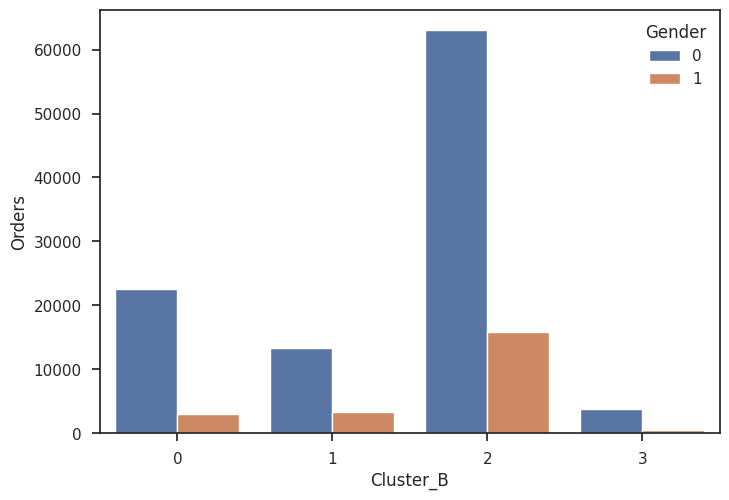

In [125]:
sns.barplot(data=clust_b , x='Cluster_B', y='Orders', hue = 'Gender')
plt.show()

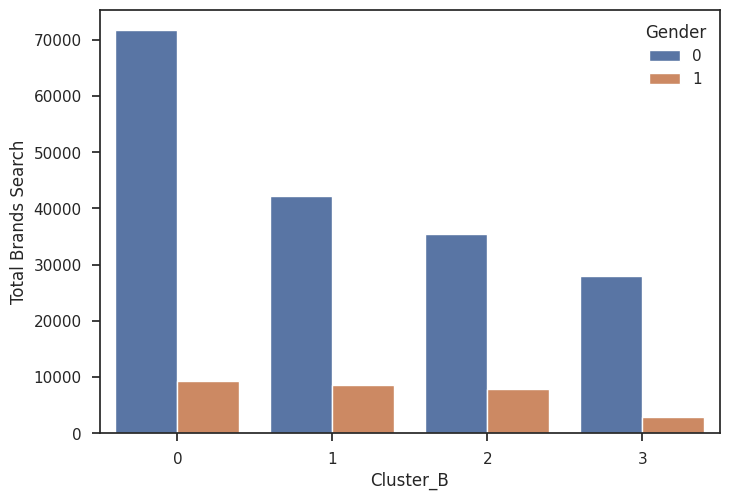

In [126]:
sns.barplot(data=clust_b , x='Cluster_B', y='Total Brands Search', hue = 'Gender')
plt.show()

<Axes: xlabel='Orders', ylabel='count'>

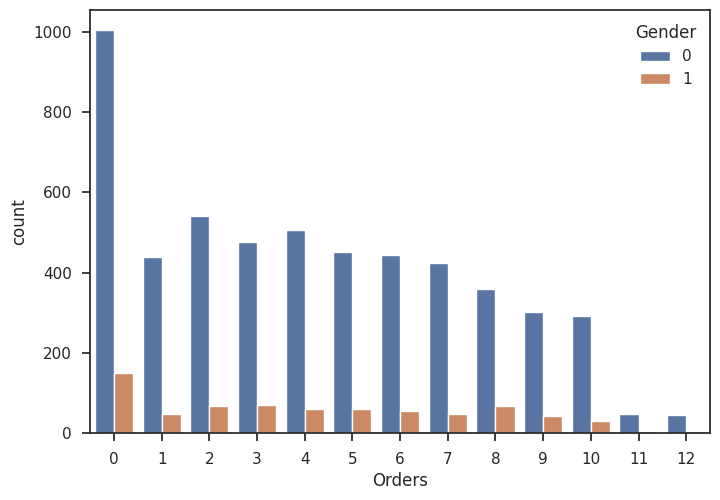

In [136]:
sns.countplot(data=df2.query('Cluster_B == 0') , x='Orders', hue = 'Gender')

<Axes: xlabel='Orders', ylabel='count'>

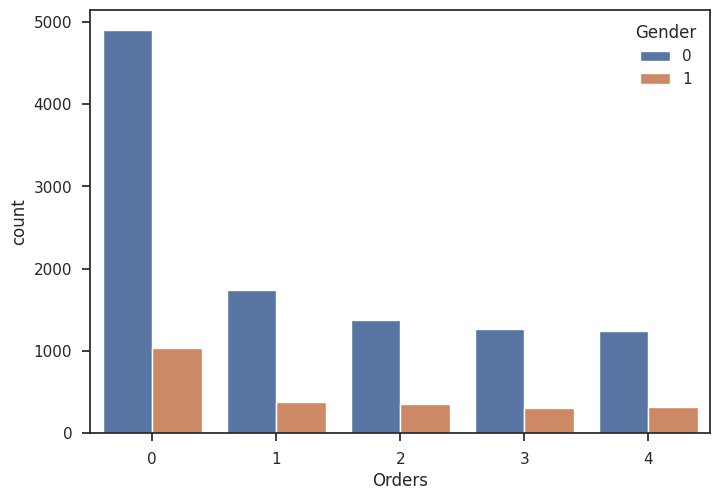

In [137]:
sns.countplot(data=df2.query('Cluster_B == 1') , x='Orders', hue = 'Gender')

<Axes: xlabel='Orders', ylabel='count'>

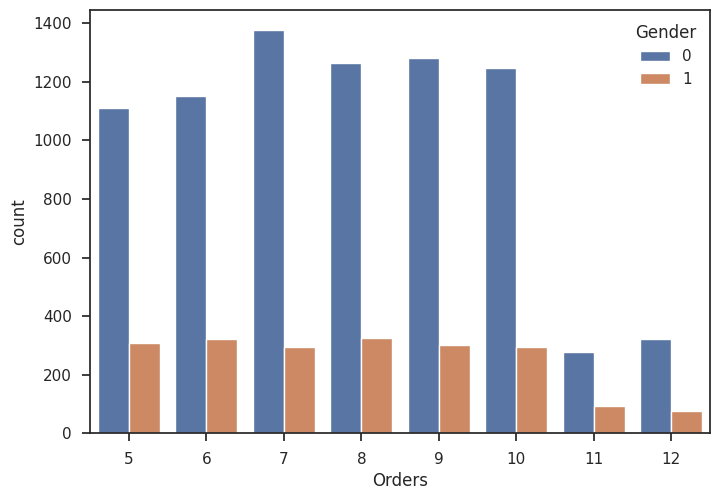

In [138]:
sns.countplot(data=df2.query('Cluster_B == 2') , x='Orders', hue = 'Gender')

<Axes: xlabel='Orders', ylabel='count'>

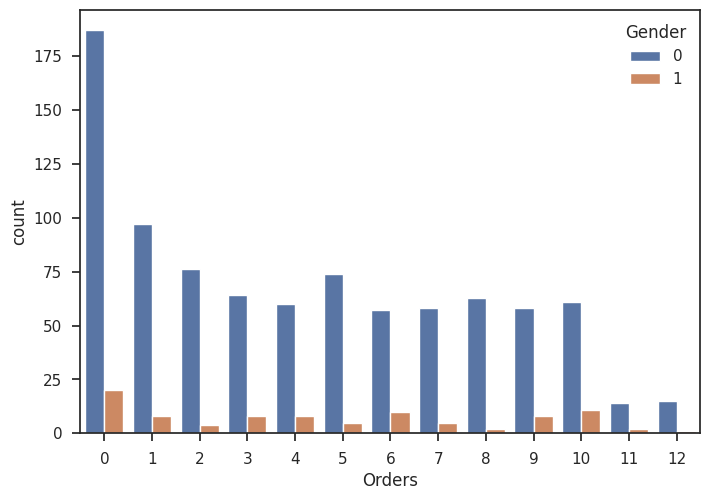

In [139]:
sns.countplot(data=df2.query('Cluster_B == 3') , x='Orders', hue = 'Gender')

<Axes: xlabel='Total Brands Search', ylabel='count'>

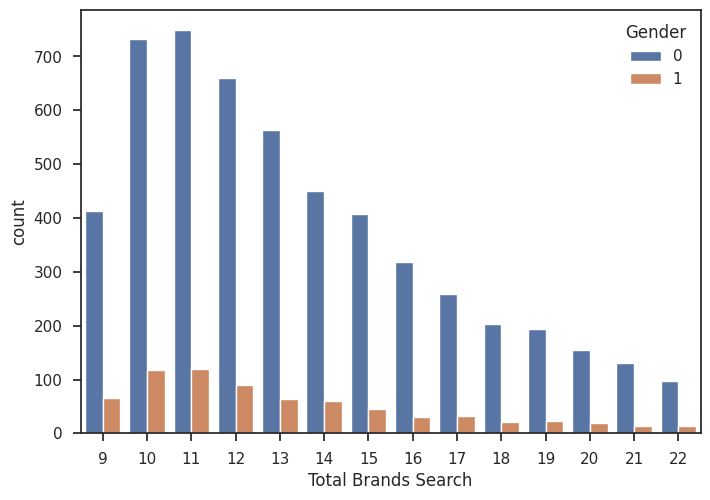

In [140]:
sns.countplot(data=df2.query('Cluster_B == 0') , x='Total Brands Search', hue = 'Gender')

<Axes: xlabel='Total Brands Search', ylabel='count'>

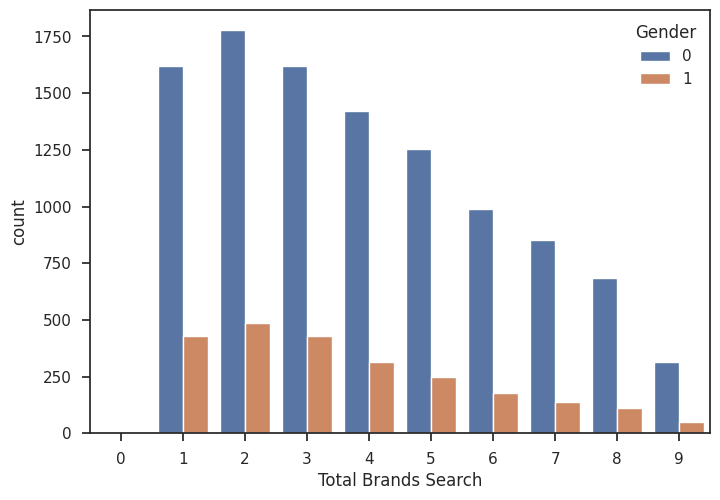

In [141]:
sns.countplot(data=df2.query('Cluster_B == 1') , x='Total Brands Search', hue = 'Gender')

<Axes: xlabel='Total Brands Search', ylabel='count'>

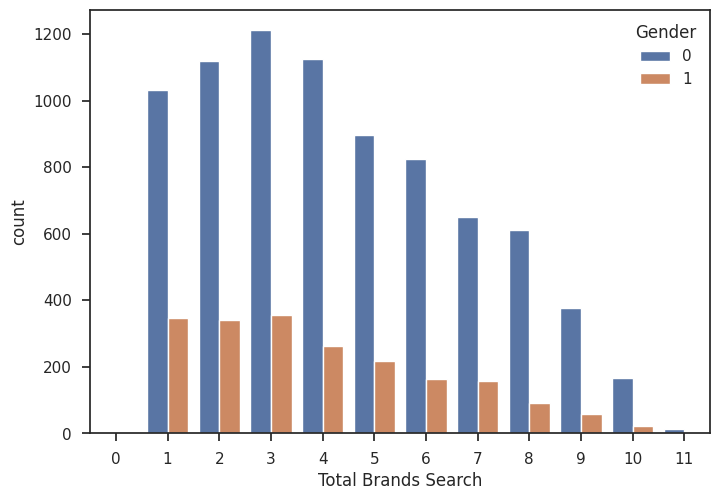

In [142]:
sns.countplot(data=df2.query('Cluster_B == 2') , x='Total Brands Search', hue = 'Gender')

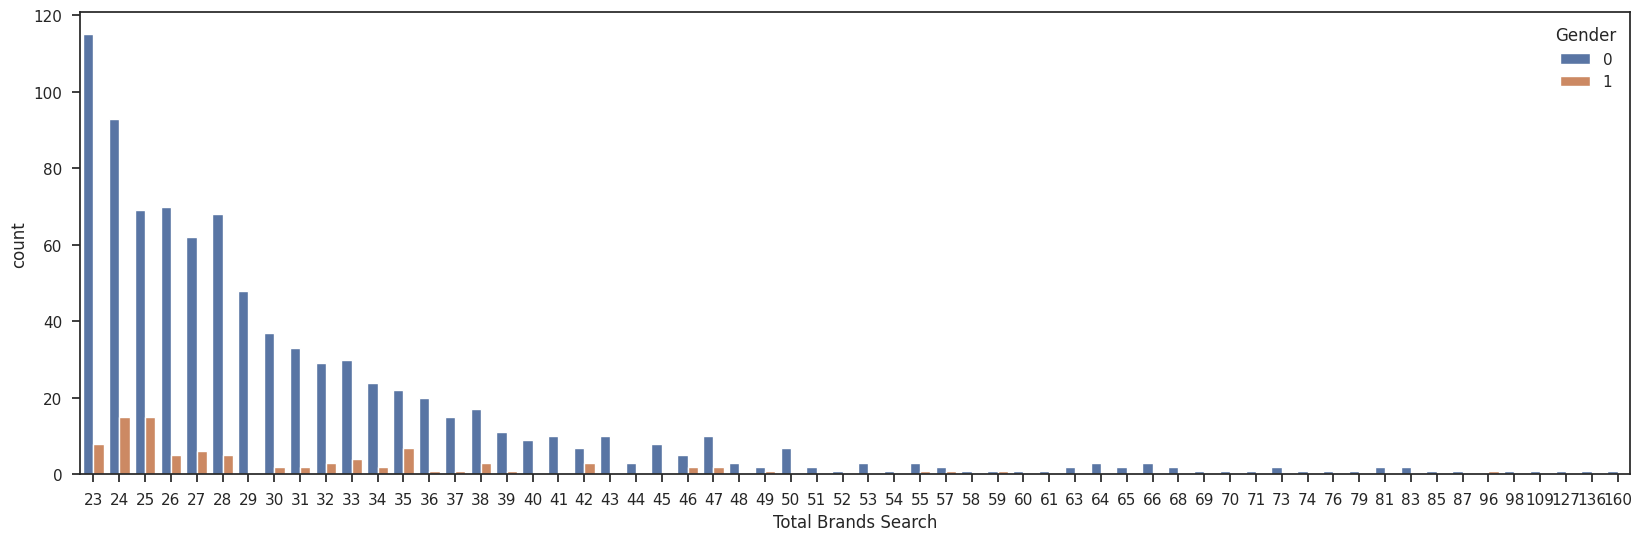

In [145]:
plt.figure(figsize=(20, 6))
sns.countplot(data=df2.query('Cluster_B == 3') , x='Total Brands Search', hue = 'Gender')

plt.show()

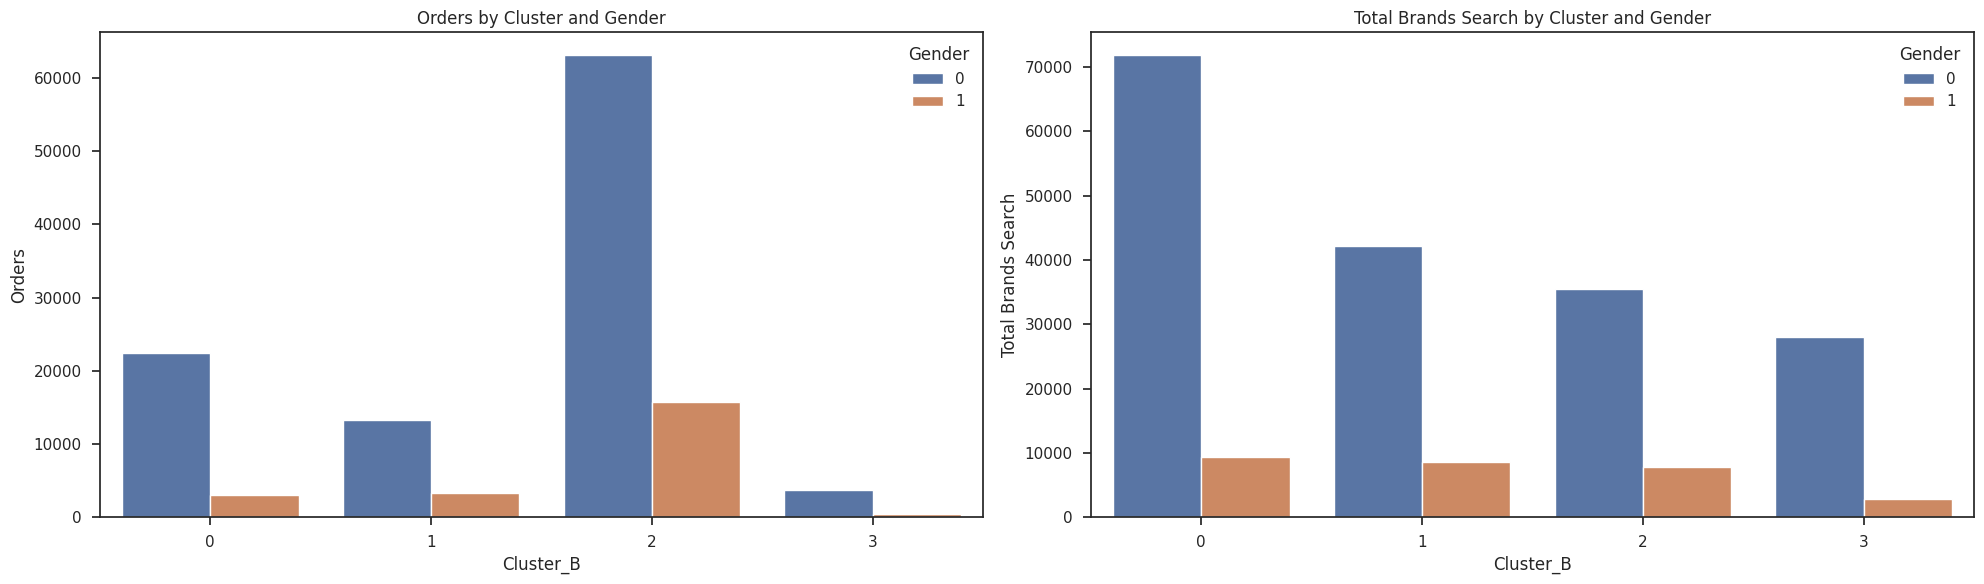

In [135]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.barplot(data=clust_b, x='Cluster_B', y='Orders', hue='Gender', ax=axes[0])
axes[0].set_title('Orders by Cluster and Gender')

sns.barplot(data=clust_b, x='Cluster_B', y='Total Brands Search', hue='Gender', ax=axes[1])
axes[1].set_title('Total Brands Search by Cluster and Gender')

plt.tight_layout()
plt.show()


In [216]:
clust_b1

Cluster_B    Cust_ID  Gender  Orders  Jordan  Gatorade  Samsung  Asus  \
0          0   98034869     716   25458    3309      3020     2889  2376   
1          1  186140626    2392   16554    1923      1889     1493   982   
2          2  149304098    2022   78889    1681      1789     1426   925   
3          3   16535407      92    4193    1110       872      880   557   

   Udis  Mondelez International  Wrangler  Vans  Fila  Brooks   H&M  \
0  1995                    1593      1390  1337  1132    1587  3877   
1   973                    1205       747   836   828    1056  2434   
2   820                     965       654   705   591     927  2299   
3   518                     430       417   465   277     634  1236   

   Dairy Queen  Fendi  Hewlett Packard  Pladis  Asics  Siemens  J.M. Smucker  \
0         2303   1550             1619    1334   3958      586          7445   
1         1004   1144             1560     456   1849      377          6618   
2          814   1014             1204     357   1728      297          5826   
3         2159    536              450    1036   1472      182          2755   

   Pop Chips  Juniper  Huawei  Compaq  IBM  Burberry    Mi    LG  Dior  \
0       2584     5645    3564    1398  312      5463  1470  1087  3272   
1       1879     3497    1768     891  321      2326   962   731  2133   
2       1562     2868    1463     717  196      2129   799   465  1799   
3       1412     2115     945     557  130      2923   409   793   930   

   Scabal  Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  \
0    4132            1934        935         678      2175       1293   
1    3264            1154        593         446      1506        910   
2    2735             885        461         316      1200        804   
3     971             796        341         280       885        484   

   Jiffy mix  Kraft  Total Brands Search  Cluster_A  
0       1063    856                81161       5924  
1        565    475                50795       6274  
2        556    304                43281      12940  
3        457    492                30906        870

# CONCLUSION

##  ANALYSIS BASED ON ORDERS AND TOTAL BRANDS SEARCHES

Cluster 0:
* Orders: 25458
* Total Brands Searched: 81161 [ Highest ] 

Cluster 1:
* Orders:16554
* Total Brands Searched: 50795

Cluster 2:
* Orders: 78889 [ Highest ]
* Total Brands Searched: 43281

Cluster 3:
* Orders: 4193 [ Least ]
* Total Brands Searched: 30906 [ Least ]

# ANALYSIS BASED ON BRANDS

In [146]:
df4 = df2.copy()

In [147]:
df4.head()

Cust_ID  Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
0        1       1       7       0         0        0     0     0   
1        2       0       0       0         1        0     0     0   
2        3       1       7       0         1        0     0     0   
3        4       0       0       0         0        0     0     0   
4        5       0      10       0         0        0     0     0   

   Mondelez International  Wrangler  Vans  Fila  Brooks  H&M  Dairy Queen  \
0                       0         0     2     0       0    0            0   
1                       0         0     0     0       0    1            0   
2                       0         0     0     0       0    0            0   
3                       0         0     0     0       0    1            0   
4                       0         0     0     0       0    0            1   

   Fendi  Hewlett Packard  Pladis  Asics  Siemens  J.M. Smucker  Pop Chips  \
0      0                0       0      0        0             0          0   
1      0                0       0      0        0             2          2   
2      0                0       0      2        0             1          0   
3      0                0       0      0        0             0          1   
4      0                0       5      1        0             3          0   

   Juniper  Huawei  Compaq  IBM  Burberry  Mi  LG  Dior  Scabal  \
0        0       0       0    0         0   0   0     0       0   
1        1       0       0    0         6   4   0     1       0   
2        0       0       0    0         0   0   0     0       0   
3        0       0       0    0         0   0   0     0       0   
4        1       0       0    0         1   0   0     0       2   

   Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  Jiffy mix  \
0               0          0           0         0          0          0   
1               0          0           0         0          0          0   
2               0          0           0         0          1          0   
3               0          0           0         0          0          0   
4               0          0           0         0          0          1   

   Kraft  Total Brands Search  Cluster_A  Cluster_B  
0      0                    2          1          2  
1      0                   18          0          0  
2      0                    5          1          2  
3      0                    2          0          1  
4      1                   16          1          0

In [148]:
df4.tail()

Cust_ID  Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
29995    29996       1       0       0         0        0     0     0   
29996    29997       1       1       0         1        0     0     0   
29997    29998       1       0       0         1        0     0     0   
29998    29999       1       0       0         0        0     0     0   
29999    30000       0       3       2         0        0     1     0   

       Mondelez International  Wrangler  Vans  Fila  Brooks  H&M  Dairy Queen  \
29995                       0         0     0     0       1    0            0   
29996                       0         0     0     0       0    0            0   
29997                       0         0     1     0       0    0            0   
29998                       0         0     0     0       0    0            0   
29999                       0         0     0     0       0    0            0   

       Fendi  Hewlett Packard  Pladis  Asics  Siemens  J.M. Smucker  \
29995      0                0       0      0        0             0   
29996      0                0       0      0        0             0   
29997      0                0       0      0        0             0   
29998      0                0       0      0        0             0   
29999      0                0       0      0        0             2   

       Pop Chips  Juniper  Huawei  Compaq  IBM  Burberry  Mi  LG  Dior  \
29995          0        0       0       0    0         0   0   0     0   
29996          0        0       0       0    0         0   0   0     0   
29997          0        0       0       0    0         0   0   0     0   
29998          1        0       0       0    0         0   0   0     0   
29999          0        0       0       0    0         0   0   0     0   

       Scabal  Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  \
29995       0               0          0           0         0          0   
29996       0               0          0           0         0          0   
29997       0               0          0           0         0          0   
29998       0               0          0           0         0          0   
29999       0               0          0           0         0          0   

       Jiffy mix  Kraft  Total Brands Search  Cluster_A  Cluster_B  
29995          0      0                    1          0          1  
29996          0      0                    1          0          1  
29997          0      0                    2          0          1  
29998          0      0                    1          0          1  
29999          0      0                    5          2          1

In [149]:
Z = df4.iloc[:,3:-3].values

In [150]:
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0]])

ELBOW METHOD

In [153]:
inertia3=[]
for n in range(1,10):
  algorithm3=(KMeans(n_clusters=n,init='k-means++',n_init=10,max_iter=300,random_state=100))
  algorithm3.fit(Z)
  inertia3.append(algorithm3.inertia_)

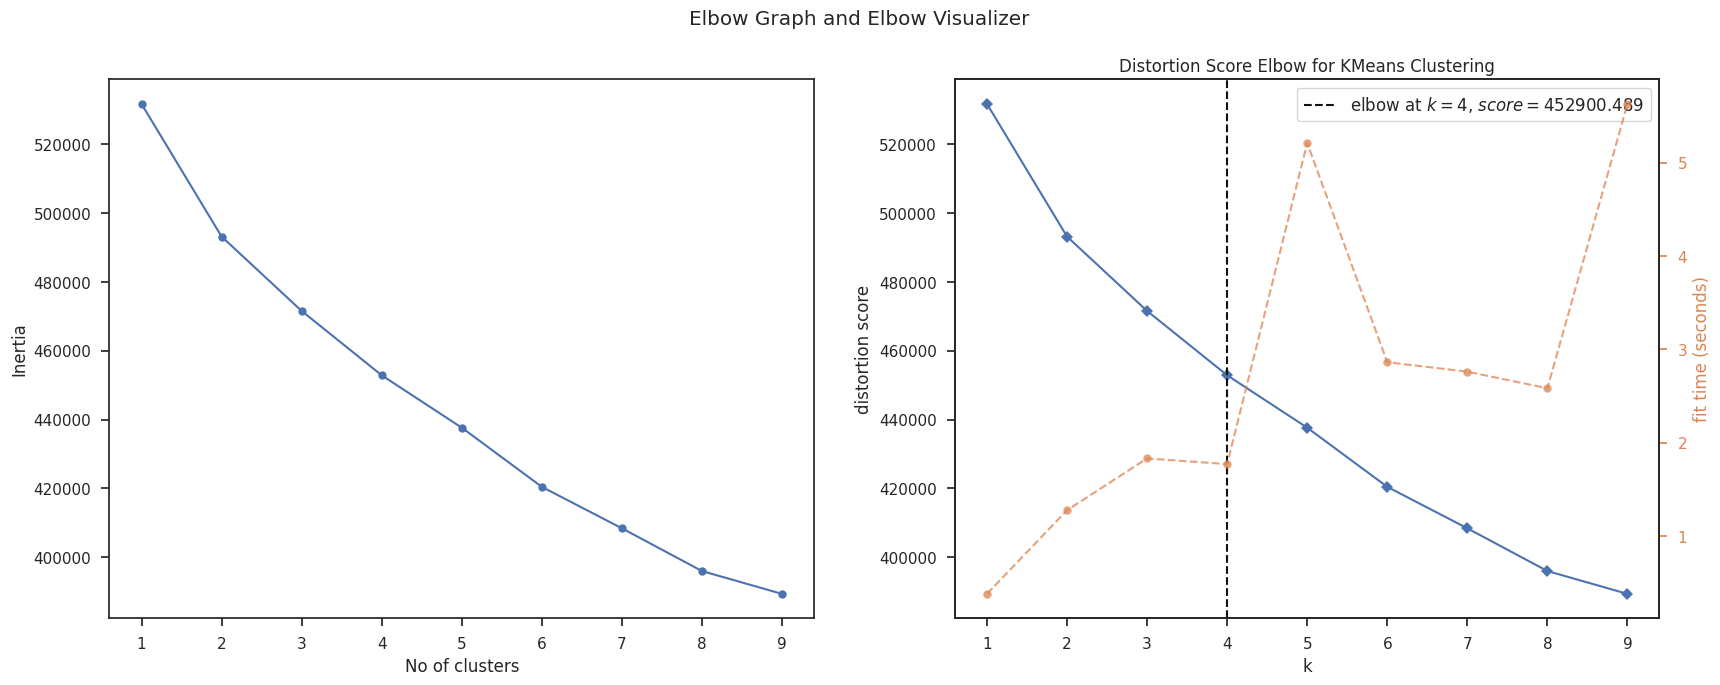

In [154]:
#elbow graph
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(range(1,10), inertia3, 'bo-')
plt.xlabel('No of clusters'), plt.ylabel('Inertia')

#elbow visualizer
plt.subplot(1,2,2)
visualize = KElbowVisualizer(algorithm3,k=(1,10))
visualize.fit(Z)
plt.suptitle("Elbow Graph and Elbow Visualizer")
visualize.poof()
plt.show()

SILHOUTTE ANALYSIS 

In [151]:
silhouette_avg_2 = []
for n in range(2,10):
  cluster_labels_2=(KMeans(n_clusters=n,init='k-means++',n_init=10,max_iter=300,random_state=100))
  cluster_labels_2=cluster_labels_2.fit_predict(Z)
  silhouette_avg_2.append(silhouette_score(Z,cluster_labels_2))
     

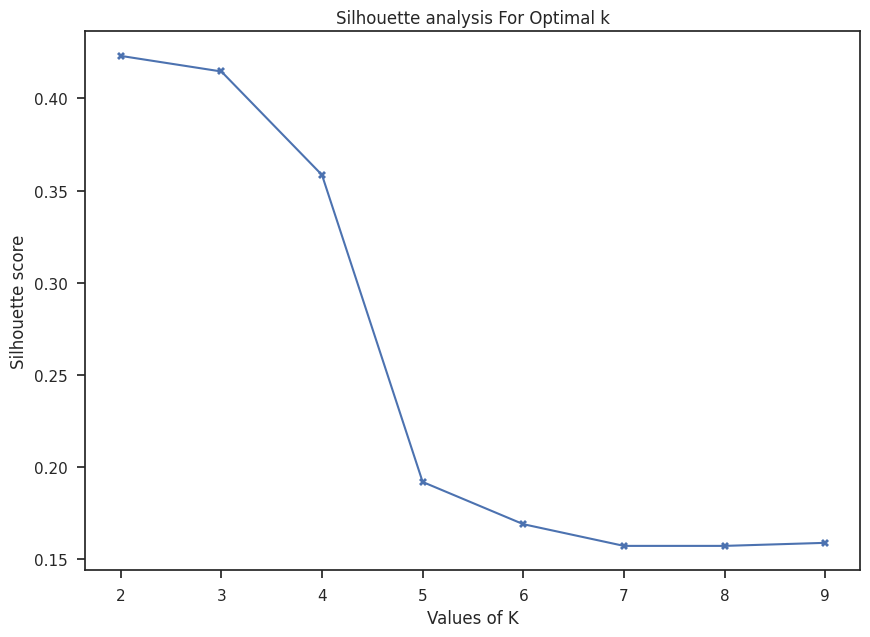

In [152]:
plt.figure(figsize=(10,7))
plt.plot(range(2,10),silhouette_avg_2,'bX-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()
     

In [155]:
model_2 = KMeans(n_clusters=4)
model_2 = model_2.fit(Z)
mp3 = model_2.predict(Z)
centers = model_2.cluster_centers_ 

df2['Cluster_C'] = pd.DataFrame(mp3)



In [217]:
clust_c = df2.groupby(['Cluster_C','Gender'],as_index=False).sum()
clust_c

Cluster_C  Gender    Cust_ID  Orders  Jordan  Gatorade  Samsung  Asus  \
0          0       0  323997443   87947    4776      3788     4337  3840   
1          0       1   65036128   20154    1428      2078      968    38   
2          1       0   30102607    7721    1159       994      867   556   
3          1       1    2246212     690     122       109       84     7   
4          2       0   12894813    3772     263       238      219   203   
5          2       1    2269550     671      49        75       21     2   
6          3       0   10676780    3190     177       208      168   193   
7          3       1    2791467     949      49        80       24     1   

   Udis  Mondelez International  Wrangler  Vans  Fila  Brooks   H&M  \
0  3306                    2914      2527  1304  1751    2167  6876   
1   163                     400        31  1279   515     895   303   
2   546                     546       447   473   298     762  1892   
3     9                      20        13    80    21      79    55   
4   177                     158       129    71    93     145   390   
5     5                      19         2    64    13      44    15   
6    96                     115        58    40    92      86   289   
7     4                      21         1    32    45      26    26   

   Dairy Queen  Fendi  Hewlett Packard  Pladis  Asics  Siemens  J.M. Smucker  \
0         2065   2825             3477    1197   2511      523         12805   
1          460    353              433     166    706      127          2792   
2         3091    727              632    1494    941       61          4389   
3          302     50               20     138     97        8           430   
4          158    152              155      91    249       26           807   
5           50     13               13      12     48        2           153   
6          121    107               90      72   3464      536           915   
7           33     17               13      13    991      159           353   

   Pop Chips  Juniper  Huawei  Compaq  IBM  Burberry    Mi    LG  Dior  \
0       3818     5934    4503    1842  510      5462  2514  1614  5449   
1       1003     1022     791     426  150       502   189   162   660   
2       1781     1278     761     238   62      5697   583  1048  1433   
3        190      131      62      30    4       388    31    70    97   
4        263     4342    1137     664  133       409   159   109   257   
5         58     1008     163     231   73        50     9     9    33   
6        231      319     265      92   24       298   148    62   182   
7         93       91      58      40    3        35     7     2    23   

   Scabal  Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  \
0    8640            2855       1599        1172      3031       2057   
1     325             339        209         120       734        382   
2    1365            1142        418         345      1235        568   
3      27              64         10          11       122         45   
4     423             197         55          46       338        207   
5      11              27          6           3       106         85   
6     298             131         29          19       156        104   
7      13              14          4           4        44         43   

   Jiffy mix  Kraft  Total Brands Search  Cluster_A  Cluster_B  
0       1431    937               116357      18194      25864  
1        282    225                20656       4194       6211  
2        679    745                39253       1631       2118  
3         63     92                 3081        134        150  
4         92     53                12608        822        721  
5         33     28                 2533        151        150  
6         46     42                 9273        677        534  
7         15      5                 2382        205        201

In [218]:
clust_c1 = clust_c.groupby(['Cluster_C'],as_index=False).sum()
clust_c1

Cluster_C  Gender    Cust_ID  Orders  Jordan  Gatorade  Samsung  Asus  \
0          0       1  389033571  108101    6204      5866     5305  3878   
1          1       1   32348819    8411    1281      1103      951   563   
2          2       1   15164363    4443     312       313      240   205   
3          3       1   13468247    4139     226       288      192   194   

   Udis  Mondelez International  Wrangler  Vans  Fila  Brooks   H&M  \
0  3469                    3314      2558  2583  2266    3062  7179   
1   555                     566       460   553   319     841  1947   
2   182                     177       131   135   106     189   405   
3   100                     136        59    72   137     112   315   

   Dairy Queen  Fendi  Hewlett Packard  Pladis  Asics  Siemens  J.M. Smucker  \
0         2525   3178             3910    1363   3217      650         15597   
1         3393    777              652    1632   1038       69          4819   
2          208    165              168     103    297       28           960   
3          154    124              103      85   4455      695          1268   

   Pop Chips  Juniper  Huawei  Compaq  IBM  Burberry    Mi    LG  Dior  \
0       4821     6956    5294    2268  660      5964  2703  1776  6109   
1       1971     1409     823     268   66      6085   614  1118  1530   
2        321     5350    1300     895  206       459   168   118   290   
3        324      410     323     132   27       333   155    64   205   

   Scabal  Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  \
0    8965            3194       1808        1292      3765       2439   
1    1392            1206        428         356      1357        613   
2     434             224         61          49       444        292   
3     311             145         33          23       200        147   

   Jiffy mix  Kraft  Total Brands Search  Cluster_A  Cluster_B  
0       1713   1162               137013      22388      32075  
1        742    837                42334       1765       2268  
2        125     81                15141        973        871  
3         61     47                11655        882        735

In [166]:
df_br = df2.copy()
df_br = df_br.iloc[:, list(range(3, 38)) + [-1]]


The code df_br = df_br.iloc[:, list(range(3, 38)) + [-1]] selects a subset of columns from the DataFrame df_br and assigns the result to the variable df_br. Here's an explanation of what each part of the code means:

df_br: This is the DataFrame object that we are working with.

.iloc[:, list(range(3, 38)) + [-1]]: This uses the iloc indexer to select all rows (:) and specific columns by index. In this case, it selects columns ranging from index 3 to 37 (list(range(3, 38))) and also includes the last column ([-1]).

df_br = ...: This assigns the selected columns to the variable df_br. The variable df_br now holds the subset of data with only the specified columns.

The meaning of this code is to create a new DataFrame (df_br) that contains a subset of columns from the original DataFrame df_br. The selected columns range from index 3 to 37, and the last column is also included. The

In [167]:
df_br.head()

Jordan  Gatorade  Samsung  Asus  Udis  Mondelez International  Wrangler  \
0       0         0        0     0     0                       0         0   
1       0         1        0     0     0                       0         0   
2       0         1        0     0     0                       0         0   
3       0         0        0     0     0                       0         0   
4       0         0        0     0     0                       0         0   

   Vans  Fila  Brooks  H&M  Dairy Queen  Fendi  Hewlett Packard  Pladis  \
0     2     0       0    0            0      0                0       0   
1     0     0       0    1            0      0                0       0   
2     0     0       0    0            0      0                0       0   
3     0     0       0    1            0      0                0       0   
4     0     0       0    0            1      0                0       5   

   Asics  Siemens  J.M. Smucker  Pop Chips  Juniper  Huawei  Compaq  IBM  \
0      0        0             0          0        0       0       0    0   
1      0        0             2          2        1       0       0    0   
2      2        0             1          0        0       0       0    0   
3      0        0             0          1        0       0       0    0   
4      1        0             3          0        1       0       0    0   

   Burberry  Mi  LG  Dior  Scabal  Tommy Hilfiger  Hollister  Forever 21  \
0         0   0   0     0       0               0          0           0   
1         6   4   0     1       0               0          0           0   
2         0   0   0     0       0               0          0           0   
3         0   0   0     0       0               0          0           0   
4         1   0   0     0       2               0          0           0   

   Colavita  Microsoft  Jiffy mix  Kraft  Cluster_C  
0         0          0          0      0          0  
1         0          0          0      0          1  
2         0          1          0      0          0  
3         0          0          0      0          0  
4         0          0          1      1          1

In [168]:
df_br.groupby(['Cluster_C'])['Cluster_C'].count()

Cluster_C
0    26028
1     1958
2     1100
3      914
Name: Cluster_C, dtype: int64

In [169]:
clust_c = df_br.groupby(['Cluster_C'],as_index=False).sum()
clust_c

Cluster_C  Jordan  Gatorade  Samsung  Asus  Udis  Mondelez International  \
0          0    6204      5866     5305  3878  3469                    3314   
1          1    1281      1103      951   563   555                     566   
2          2     312       313      240   205   182                     177   
3          3     226       288      192   194   100                     136   

   Wrangler  Vans  Fila  Brooks   H&M  Dairy Queen  Fendi  Hewlett Packard  \
0      2558  2583  2266    3062  7179         2525   3178             3910   
1       460   553   319     841  1947         3393    777              652   
2       131   135   106     189   405          208    165              168   
3        59    72   137     112   315          154    124              103   

   Pladis  Asics  Siemens  J.M. Smucker  Pop Chips  Juniper  Huawei  Compaq  \
0    1363   3217      650         15597       4821     6956    5294    2268   
1    1632   1038       69          4819       1971     1409     823     268   
2     103    297       28           960        321     5350    1300     895   
3      85   4455      695          1268        324      410     323     132   

   IBM  Burberry    Mi    LG  Dior  Scabal  Tommy Hilfiger  Hollister  \
0  660      5964  2703  1776  6109    8965            3194       1808   
1   66      6085   614  1118  1530    1392            1206        428   
2  206       459   168   118   290     434             224         61   
3   27       333   155    64   205     311             145         33   

   Forever 21  Colavita  Microsoft  Jiffy mix  Kraft  
0        1292      3765       2439       1713   1162  
1         356      1357        613        742    837  
2          49       444        292        125     81  
3          23       200        147         61     47

In [185]:
clc = clust_c.T
clc.reset_index(inplace=True)
clc = clc.rename(columns = {'index':'brands'})
clc

brands      0     1     2     3
0                Cluster_C      0     1     2     3
1                   Jordan   6204  1281   312   226
2                 Gatorade   5866  1103   313   288
3                  Samsung   5305   951   240   192
4                     Asus   3878   563   205   194
5                     Udis   3469   555   182   100
6   Mondelez International   3314   566   177   136
7                 Wrangler   2558   460   131    59
8                     Vans   2583   553   135    72
9                     Fila   2266   319   106   137
10                  Brooks   3062   841   189   112
11                     H&M   7179  1947   405   315
12             Dairy Queen   2525  3393   208   154
13                   Fendi   3178   777   165   124
14         Hewlett Packard   3910   652   168   103
15                  Pladis   1363  1632   103    85
16                   Asics   3217  1038   297  4455
17                 Siemens    650    69    28   695
18            J.M. Smucker  15597  4819   960  1268
19               Pop Chips   4821  1971   321   324
20                 Juniper   6956  1409  5350   410
21                  Huawei   5294   823  1300   323
22                  Compaq   2268   268   895   132
23                     IBM    660    66   206    27
24                Burberry   5964  6085   459   333
25                      Mi   2703   614   168   155
26                      LG   1776  1118   118    64
27                    Dior   6109  1530   290   205
28                  Scabal   8965  1392   434   311
29          Tommy Hilfiger   3194  1206   224   145
30               Hollister   1808   428    61    33
31              Forever 21   1292   356    49    23
32                Colavita   3765  1357   444   200
33               Microsoft   2439   613   292   147
34               Jiffy mix   1713   742   125    61
35                   Kraft   1162   837    81    47

The provided code performs the following operations on the DataFrame clust_c:

clc = clust_c.T: Transposes the DataFrame clust_c, swapping the rows and columns. The resulting transposed DataFrame is assigned to the variable clc.

clc.reset_index(inplace=True): Resets the index of the DataFrame clc, assigning a new default numerical index. The inplace=True parameter ensures that the changes are applied directly to the DataFrame clc itself.

clc = clc.rename(columns={'index':'brands'}): Renames the column with the label 'index' to 'brands' using the rename method. The updated DataFrame is assigned back to the variable clc.

clc: Prints the resulting DataFrame clc.

The meaning of these operations is to transpose the DataFrame, reset the index, and rename a column. By transposing the DataFrame, the original rows become columns and vice versa. Resetting the index provides a new numerical index to the DataFrame. Renaming the column with 'index' to 'brands' provides a more descriptive column name. The resulting DataFrame clc represents the transposed, reset, and renamed DataFrame after these operations.

In [186]:
clc = clc.drop(clc.index[0])

In [187]:
clc

brands      0     1     2     3
1                   Jordan   6204  1281   312   226
2                 Gatorade   5866  1103   313   288
3                  Samsung   5305   951   240   192
4                     Asus   3878   563   205   194
5                     Udis   3469   555   182   100
6   Mondelez International   3314   566   177   136
7                 Wrangler   2558   460   131    59
8                     Vans   2583   553   135    72
9                     Fila   2266   319   106   137
10                  Brooks   3062   841   189   112
11                     H&M   7179  1947   405   315
12             Dairy Queen   2525  3393   208   154
13                   Fendi   3178   777   165   124
14         Hewlett Packard   3910   652   168   103
15                  Pladis   1363  1632   103    85
16                   Asics   3217  1038   297  4455
17                 Siemens    650    69    28   695
18            J.M. Smucker  15597  4819   960  1268
19               Pop Chips   4821  1971   321   324
20                 Juniper   6956  1409  5350   410
21                  Huawei   5294   823  1300   323
22                  Compaq   2268   268   895   132
23                     IBM    660    66   206    27
24                Burberry   5964  6085   459   333
25                      Mi   2703   614   168   155
26                      LG   1776  1118   118    64
27                    Dior   6109  1530   290   205
28                  Scabal   8965  1392   434   311
29          Tommy Hilfiger   3194  1206   224   145
30               Hollister   1808   428    61    33
31              Forever 21   1292   356    49    23
32                Colavita   3765  1357   444   200
33               Microsoft   2439   613   292   147
34               Jiffy mix   1713   742   125    61
35                   Kraft   1162   837    81    47

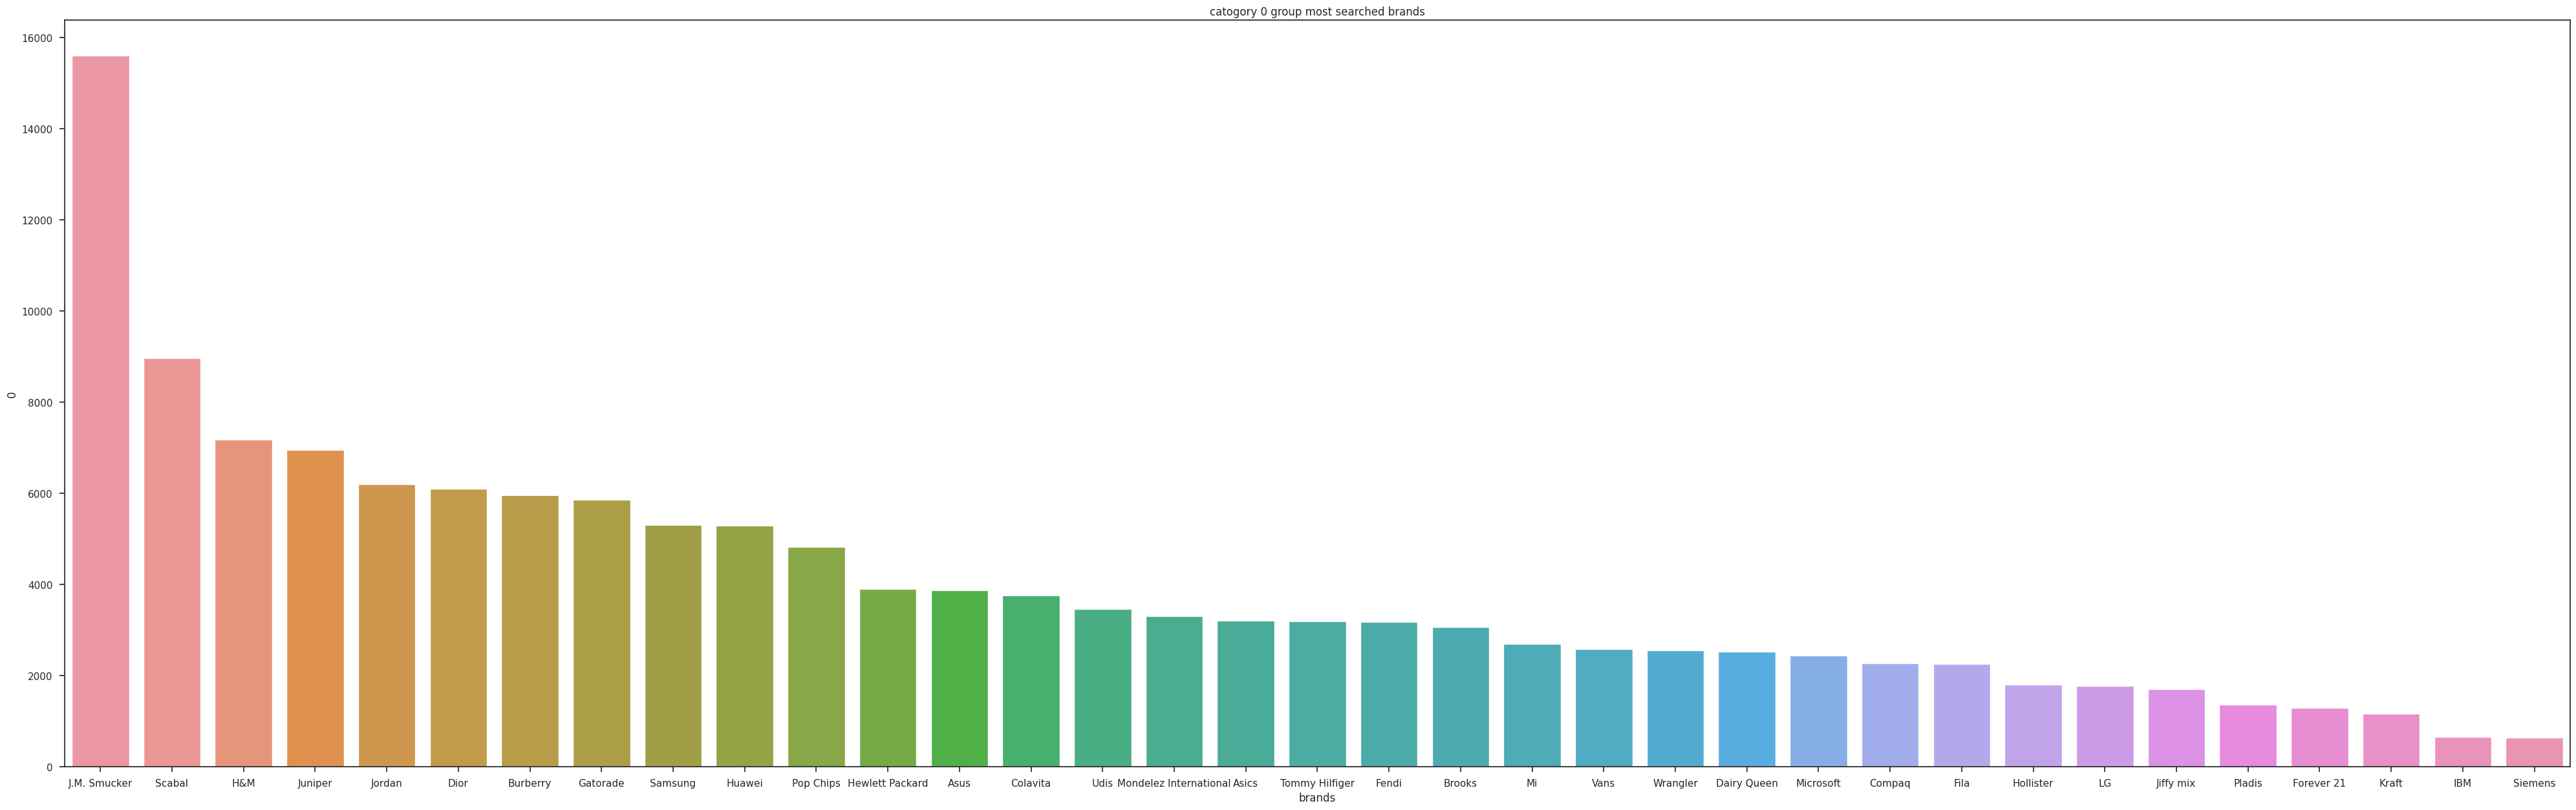

In [175]:
plt.figure(figsize=(50,15))
sns.barplot(data=clc,
            x='brands',
            y=0,
            order=clc.sort_values(0,ascending = False).brands)
plt.title("catogory 0 group most searched brands")
plt.show()

The code generates a bar plot using Seaborn to visualize the most searched brands in category 0. It sets the figure size, specifies the data, and assigns the 'brands' column to the x-axis and the column labeled 0 to the y-axis. The bars are ordered in descending order based on the values in column 0. The plot title is set as "Category 0 Group Most Searched Brands". This plot helps identify the most popular brands in category 0 based on search frequency.

In [188]:
clc.sort_values(0,ascending = False)


brands      0     1     2     3
18            J.M. Smucker  15597  4819   960  1268
28                  Scabal   8965  1392   434   311
11                     H&M   7179  1947   405   315
20                 Juniper   6956  1409  5350   410
1                   Jordan   6204  1281   312   226
27                    Dior   6109  1530   290   205
24                Burberry   5964  6085   459   333
2                 Gatorade   5866  1103   313   288
3                  Samsung   5305   951   240   192
21                  Huawei   5294   823  1300   323
19               Pop Chips   4821  1971   321   324
14         Hewlett Packard   3910   652   168   103
4                     Asus   3878   563   205   194
32                Colavita   3765  1357   444   200
5                     Udis   3469   555   182   100
6   Mondelez International   3314   566   177   136
16                   Asics   3217  1038   297  4455
29          Tommy Hilfiger   3194  1206   224   145
13                   Fendi   3178   777   165   124
10                  Brooks   3062   841   189   112
25                      Mi   2703   614   168   155
8                     Vans   2583   553   135    72
7                 Wrangler   2558   460   131    59
12             Dairy Queen   2525  3393   208   154
33               Microsoft   2439   613   292   147
22                  Compaq   2268   268   895   132
9                     Fila   2266   319   106   137
30               Hollister   1808   428    61    33
26                      LG   1776  1118   118    64
34               Jiffy mix   1713   742   125    61
15                  Pladis   1363  1632   103    85
31              Forever 21   1292   356    49    23
35                   Kraft   1162   837    81    47
23                     IBM    660    66   206    27
17                 Siemens    650    69    28   695

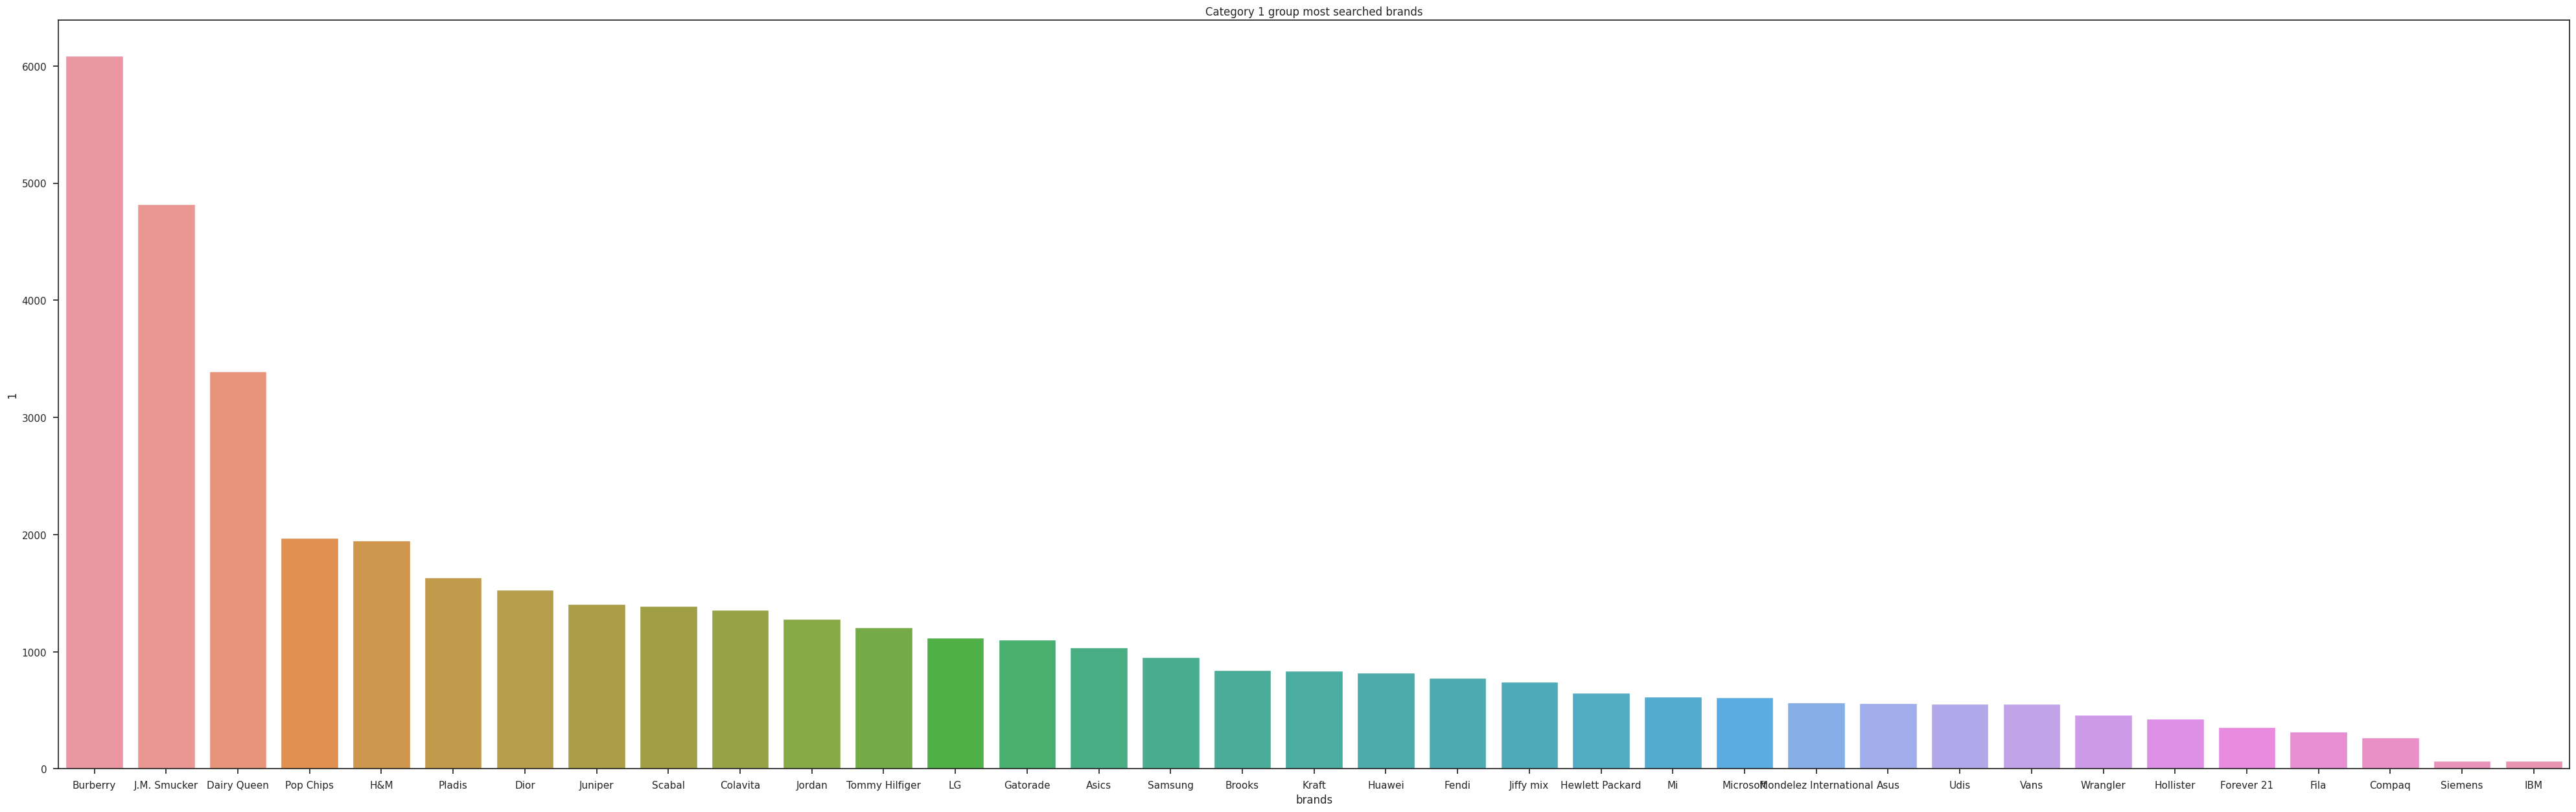

In [190]:
plt.figure(figsize=(50,15))
sns.barplot(data=clc,
            x='brands',
            y=1,
            order=clc.sort_values(1,ascending = False).brands)
plt.title("Category 1 group most searched brands")
plt.show()

In [191]:
clc.sort_values(1,ascending = False)


brands      0     1     2     3
24                Burberry   5964  6085   459   333
18            J.M. Smucker  15597  4819   960  1268
12             Dairy Queen   2525  3393   208   154
19               Pop Chips   4821  1971   321   324
11                     H&M   7179  1947   405   315
15                  Pladis   1363  1632   103    85
27                    Dior   6109  1530   290   205
20                 Juniper   6956  1409  5350   410
28                  Scabal   8965  1392   434   311
32                Colavita   3765  1357   444   200
1                   Jordan   6204  1281   312   226
29          Tommy Hilfiger   3194  1206   224   145
26                      LG   1776  1118   118    64
2                 Gatorade   5866  1103   313   288
16                   Asics   3217  1038   297  4455
3                  Samsung   5305   951   240   192
10                  Brooks   3062   841   189   112
35                   Kraft   1162   837    81    47
21                  Huawei   5294   823  1300   323
13                   Fendi   3178   777   165   124
34               Jiffy mix   1713   742   125    61
14         Hewlett Packard   3910   652   168   103
25                      Mi   2703   614   168   155
33               Microsoft   2439   613   292   147
6   Mondelez International   3314   566   177   136
4                     Asus   3878   563   205   194
5                     Udis   3469   555   182   100
8                     Vans   2583   553   135    72
7                 Wrangler   2558   460   131    59
30               Hollister   1808   428    61    33
31              Forever 21   1292   356    49    23
9                     Fila   2266   319   106   137
22                  Compaq   2268   268   895   132
17                 Siemens    650    69    28   695
23                     IBM    660    66   206    27

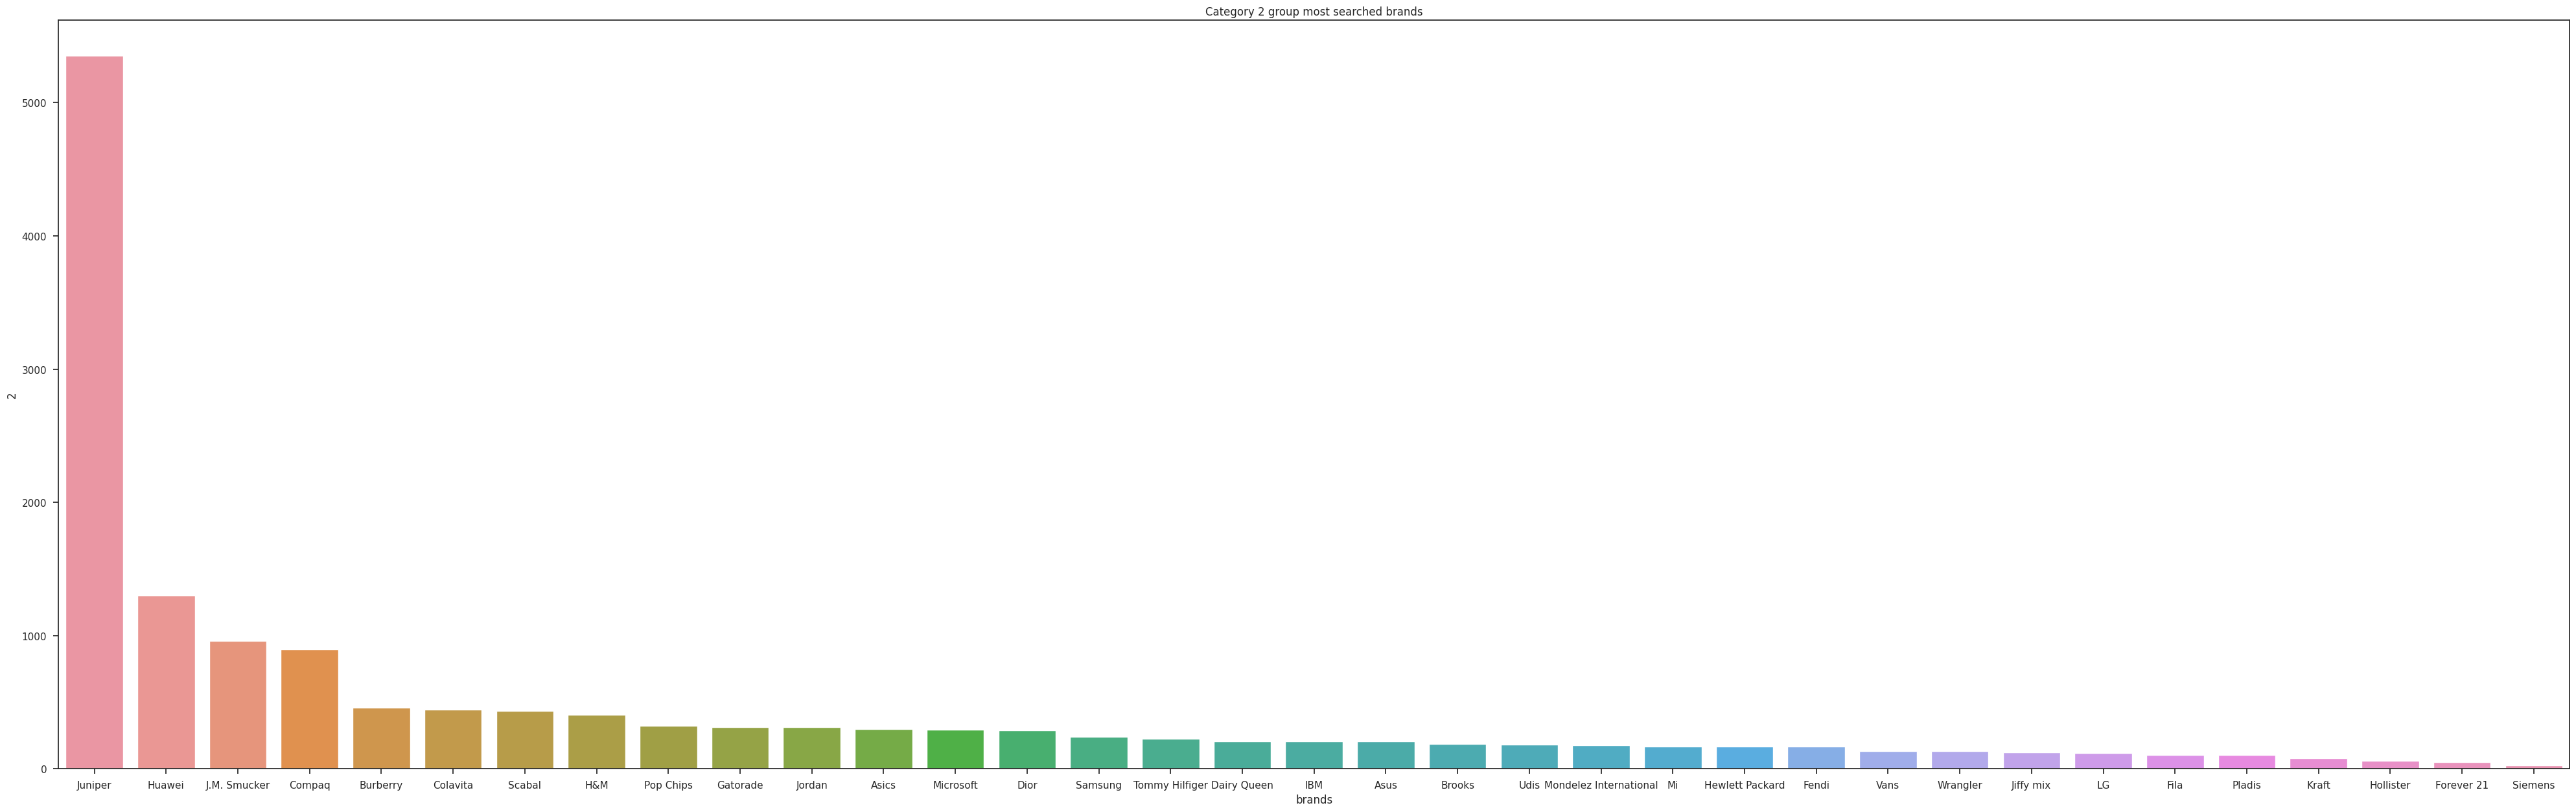

In [192]:
plt.figure(figsize=(50,15))
sns.barplot(data=clc,
            x='brands',
            y=2,
            order=clc.sort_values(2,ascending = False).brands)
plt.title("Category 2 group most searched brands")
plt.show()

In [193]:
clc.sort_values(2,ascending = False)


brands      0     1     2     3
20                 Juniper   6956  1409  5350   410
21                  Huawei   5294   823  1300   323
18            J.M. Smucker  15597  4819   960  1268
22                  Compaq   2268   268   895   132
24                Burberry   5964  6085   459   333
32                Colavita   3765  1357   444   200
28                  Scabal   8965  1392   434   311
11                     H&M   7179  1947   405   315
19               Pop Chips   4821  1971   321   324
2                 Gatorade   5866  1103   313   288
1                   Jordan   6204  1281   312   226
16                   Asics   3217  1038   297  4455
33               Microsoft   2439   613   292   147
27                    Dior   6109  1530   290   205
3                  Samsung   5305   951   240   192
29          Tommy Hilfiger   3194  1206   224   145
12             Dairy Queen   2525  3393   208   154
23                     IBM    660    66   206    27
4                     Asus   3878   563   205   194
10                  Brooks   3062   841   189   112
5                     Udis   3469   555   182   100
6   Mondelez International   3314   566   177   136
25                      Mi   2703   614   168   155
14         Hewlett Packard   3910   652   168   103
13                   Fendi   3178   777   165   124
8                     Vans   2583   553   135    72
7                 Wrangler   2558   460   131    59
34               Jiffy mix   1713   742   125    61
26                      LG   1776  1118   118    64
9                     Fila   2266   319   106   137
15                  Pladis   1363  1632   103    85
35                   Kraft   1162   837    81    47
30               Hollister   1808   428    61    33
31              Forever 21   1292   356    49    23
17                 Siemens    650    69    28   695

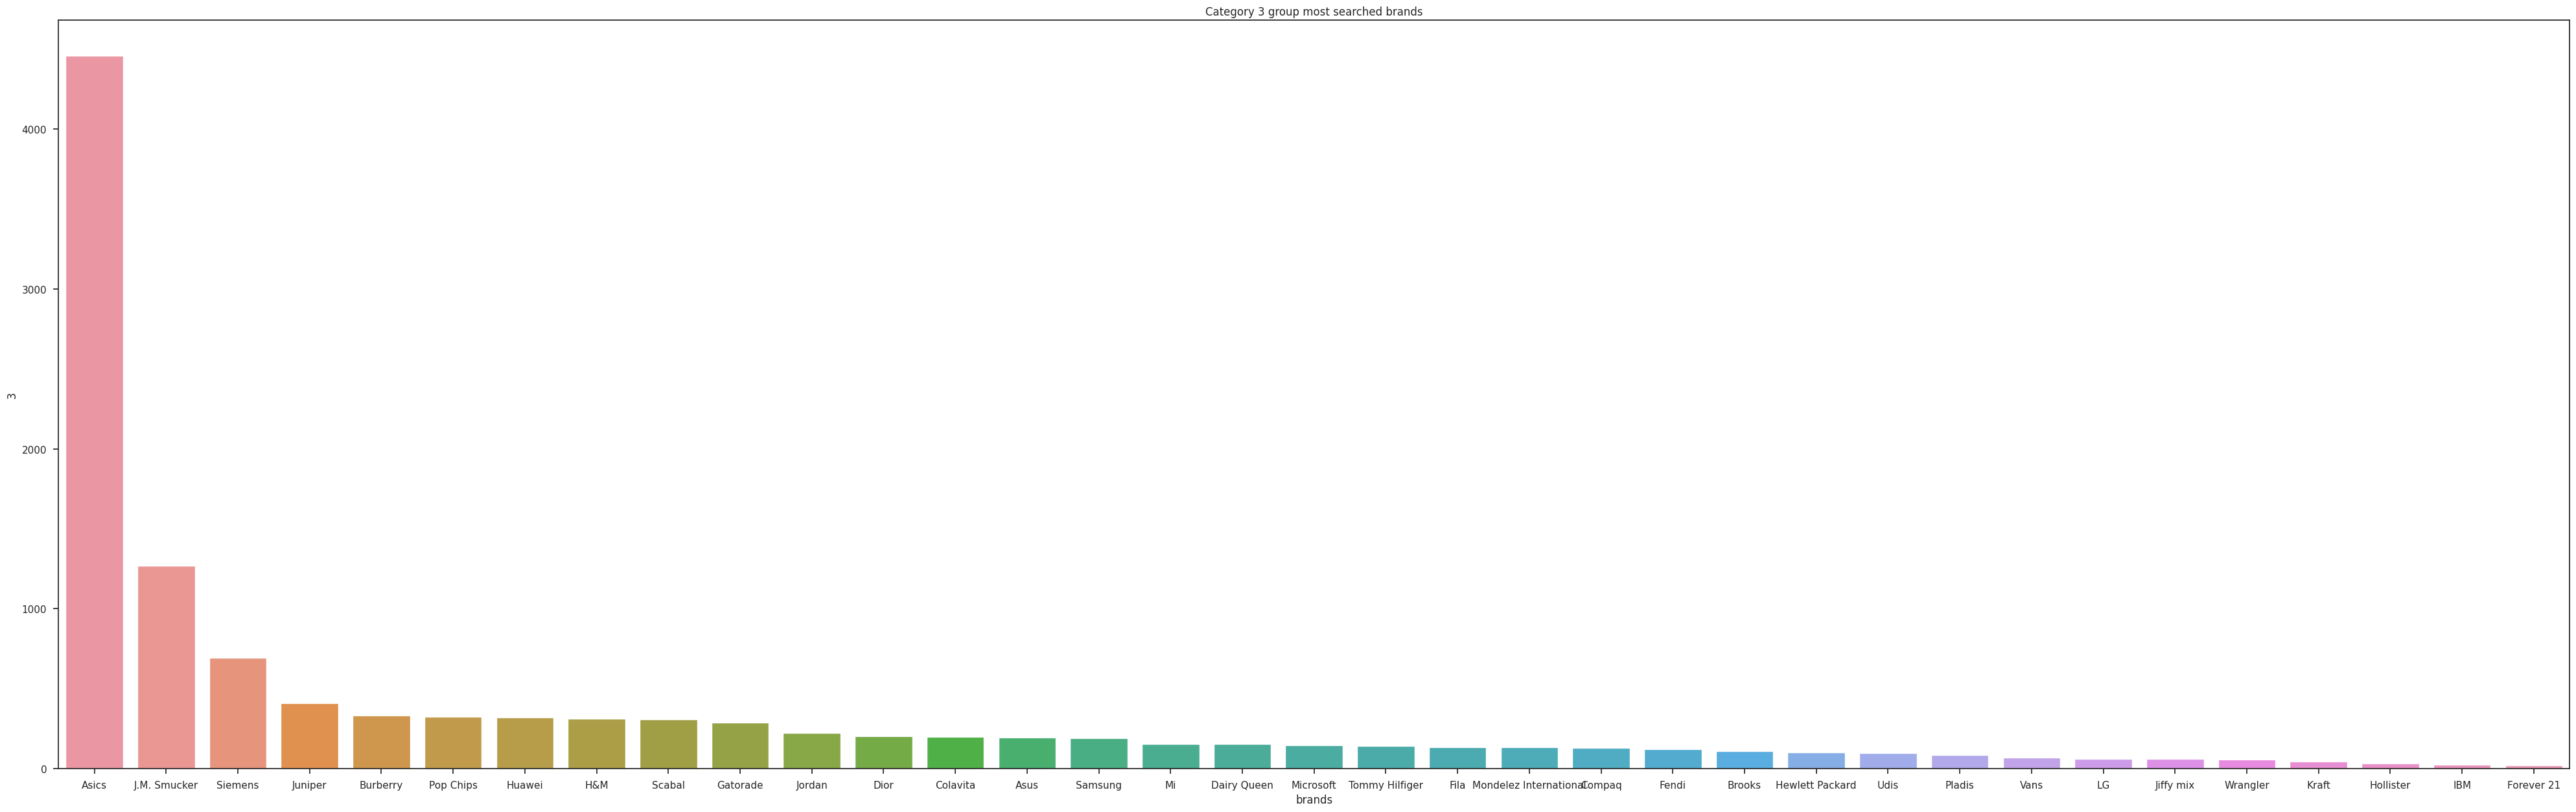

In [194]:
plt.figure(figsize=(50,15))
sns.barplot(data=clc,
            x='brands',
            y=3,
            order=clc.sort_values(3,ascending = False).brands)
plt.title("Category 3 group most searched brands")
plt.show()

In [195]:
clc.sort_values(3,ascending = False)


brands      0     1     2     3
16                   Asics   3217  1038   297  4455
18            J.M. Smucker  15597  4819   960  1268
17                 Siemens    650    69    28   695
20                 Juniper   6956  1409  5350   410
24                Burberry   5964  6085   459   333
19               Pop Chips   4821  1971   321   324
21                  Huawei   5294   823  1300   323
11                     H&M   7179  1947   405   315
28                  Scabal   8965  1392   434   311
2                 Gatorade   5866  1103   313   288
1                   Jordan   6204  1281   312   226
27                    Dior   6109  1530   290   205
32                Colavita   3765  1357   444   200
4                     Asus   3878   563   205   194
3                  Samsung   5305   951   240   192
25                      Mi   2703   614   168   155
12             Dairy Queen   2525  3393   208   154
33               Microsoft   2439   613   292   147
29          Tommy Hilfiger   3194  1206   224   145
9                     Fila   2266   319   106   137
6   Mondelez International   3314   566   177   136
22                  Compaq   2268   268   895   132
13                   Fendi   3178   777   165   124
10                  Brooks   3062   841   189   112
14         Hewlett Packard   3910   652   168   103
5                     Udis   3469   555   182   100
15                  Pladis   1363  1632   103    85
8                     Vans   2583   553   135    72
26                      LG   1776  1118   118    64
34               Jiffy mix   1713   742   125    61
7                 Wrangler   2558   460   131    59
35                   Kraft   1162   837    81    47
30               Hollister   1808   428    61    33
23                     IBM    660    66   206    27
31              Forever 21   1292   356    49    23

In [227]:

df2.groupby(['Cluster_C'])['Cluster_C'].count()

Cluster_C
0    26028
1     1958
2     1100
3      914
Name: Cluster_C, dtype: int64

# CONCLUSION

##  ANALYSIS BASED ON BRANDS

* CLUSTER 0 : 
      Customer Count: 26028

  TOP SEARCHED  BRANDS :   
      J.M. Smucker, Scabal	, H&M	, Juniper, Jordan		


* CLUSTER 1 : 
      Customer Count: 1958
  
  TOP SEARCHED  BRANDS :   
      Burberry, J.M. Smucker, Dairy Queen	, Pop Chips , H&M	


* CLUSTER 2 : 
      Customer Count: 1100

  TOP SEARCHED  BRANDS :   
      Juniper, Huawei, J.M. Smucker, Compaq, Burberry	



* CLUSTER 3 : 
      Customer Count: 914

  TOP SEARCHED  BRANDS :   
  
      Asics, J.M. Smucker,	Siemens,	Juniper,	Burberry